In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.experiment import AblateMultiLen, OVCircuit, AttentionPattern
from src.dataset import TlensDataset  # noqa: E402
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=False)
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model)

/home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 10000


## Attention pattern

In [2]:
pattern = AttentionPattern(dataset, model, 40)

In [18]:
pat = pattern.attention_pattern_all_len()

Attention pattern at len 57: 100%|██████████| 1/1 [00:00<00:00, 51.13it/s]


In [45]:
pat[8,6].mean(dim=0)

tensor(4.7910)

<Axes: >

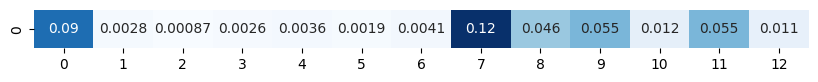

In [58]:
fig, ax = plt.subplots(figsize=(10, 0.5))
sns.heatmap(data=pat[7,6,11][-1,:].unsqueeze(0), annot=True, cmap="Blues", ax=ax, cbar=False)

## OV

In [11]:
torch.tensor(correlations).mean()

tensor(0.9049)

Interaction matrix at len 25:  56%|█████▌    | 14/25 [00:02<00:02,  5.38it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_118045/3190106223.py:13 in <module>                                        │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_118045/3190106223.py'                │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/attentio │
│ n.py:251 in compute_output_difference                                                     │
│                                                                                           │
│   248 │   │   output_diff_source_cp = {}                                                  │
│   249 │   │   for le in lengths:                                                          │
│   250 │   │   │   if le != 11:                                                            │
│ ❱ 251 │   │   │   │   output_diff_source_mem[le], output_diff_source_cp[le] = self.comput │
│   252 │   │                                                                               │
│   253 │   │   result_output_diff_source_mem = torch.cat(list(output_diff_source_mem.value │
│   254 │   │   result_output_diff_source_cp = torch.cat(list(output_diff_source_cp.values( │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/attentio │
│ n.py:221 in compute_interaction_per_len                                                   │
│                                                                                           │
│   218 │   │   │   else:                                                                   │
│   219 │   │   │   │   tmp_interaction = self.get_ov_interaction(layer, head, batch,return │
│   220 │   │   │   interaction_matrixes.append(tmp_interaction)                            │
│ ❱ 221 │   │   │   torch.cuda.empty_cache()                                                │
│   222 │   │   if return_difference:                                                       │
│   223 │   │   │   # print(interaction_matrixes)                                           │
│   224 │   │   │   tmp_interaction_mem, tmp_interaction_cp = zip(*interaction_matrixes)    │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/torch/cuda/memory.py:12 │
│ 5 in empty_cache                                                                          │
│                                                                                           │
│   122 │   │   more details about GPU memory management.                                   │
│   123 │   """                                                                             │
│   124 │   if is_initialized():                                                            │
│ ❱ 125 │   │   torch._C._cuda_emptyCache()                                                 │
│   126                                                                                     │
│   127                                                                                     │
│   128 def memory_stats(device: Union[Device, int] = None) -> Dict[str, Any]:              │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

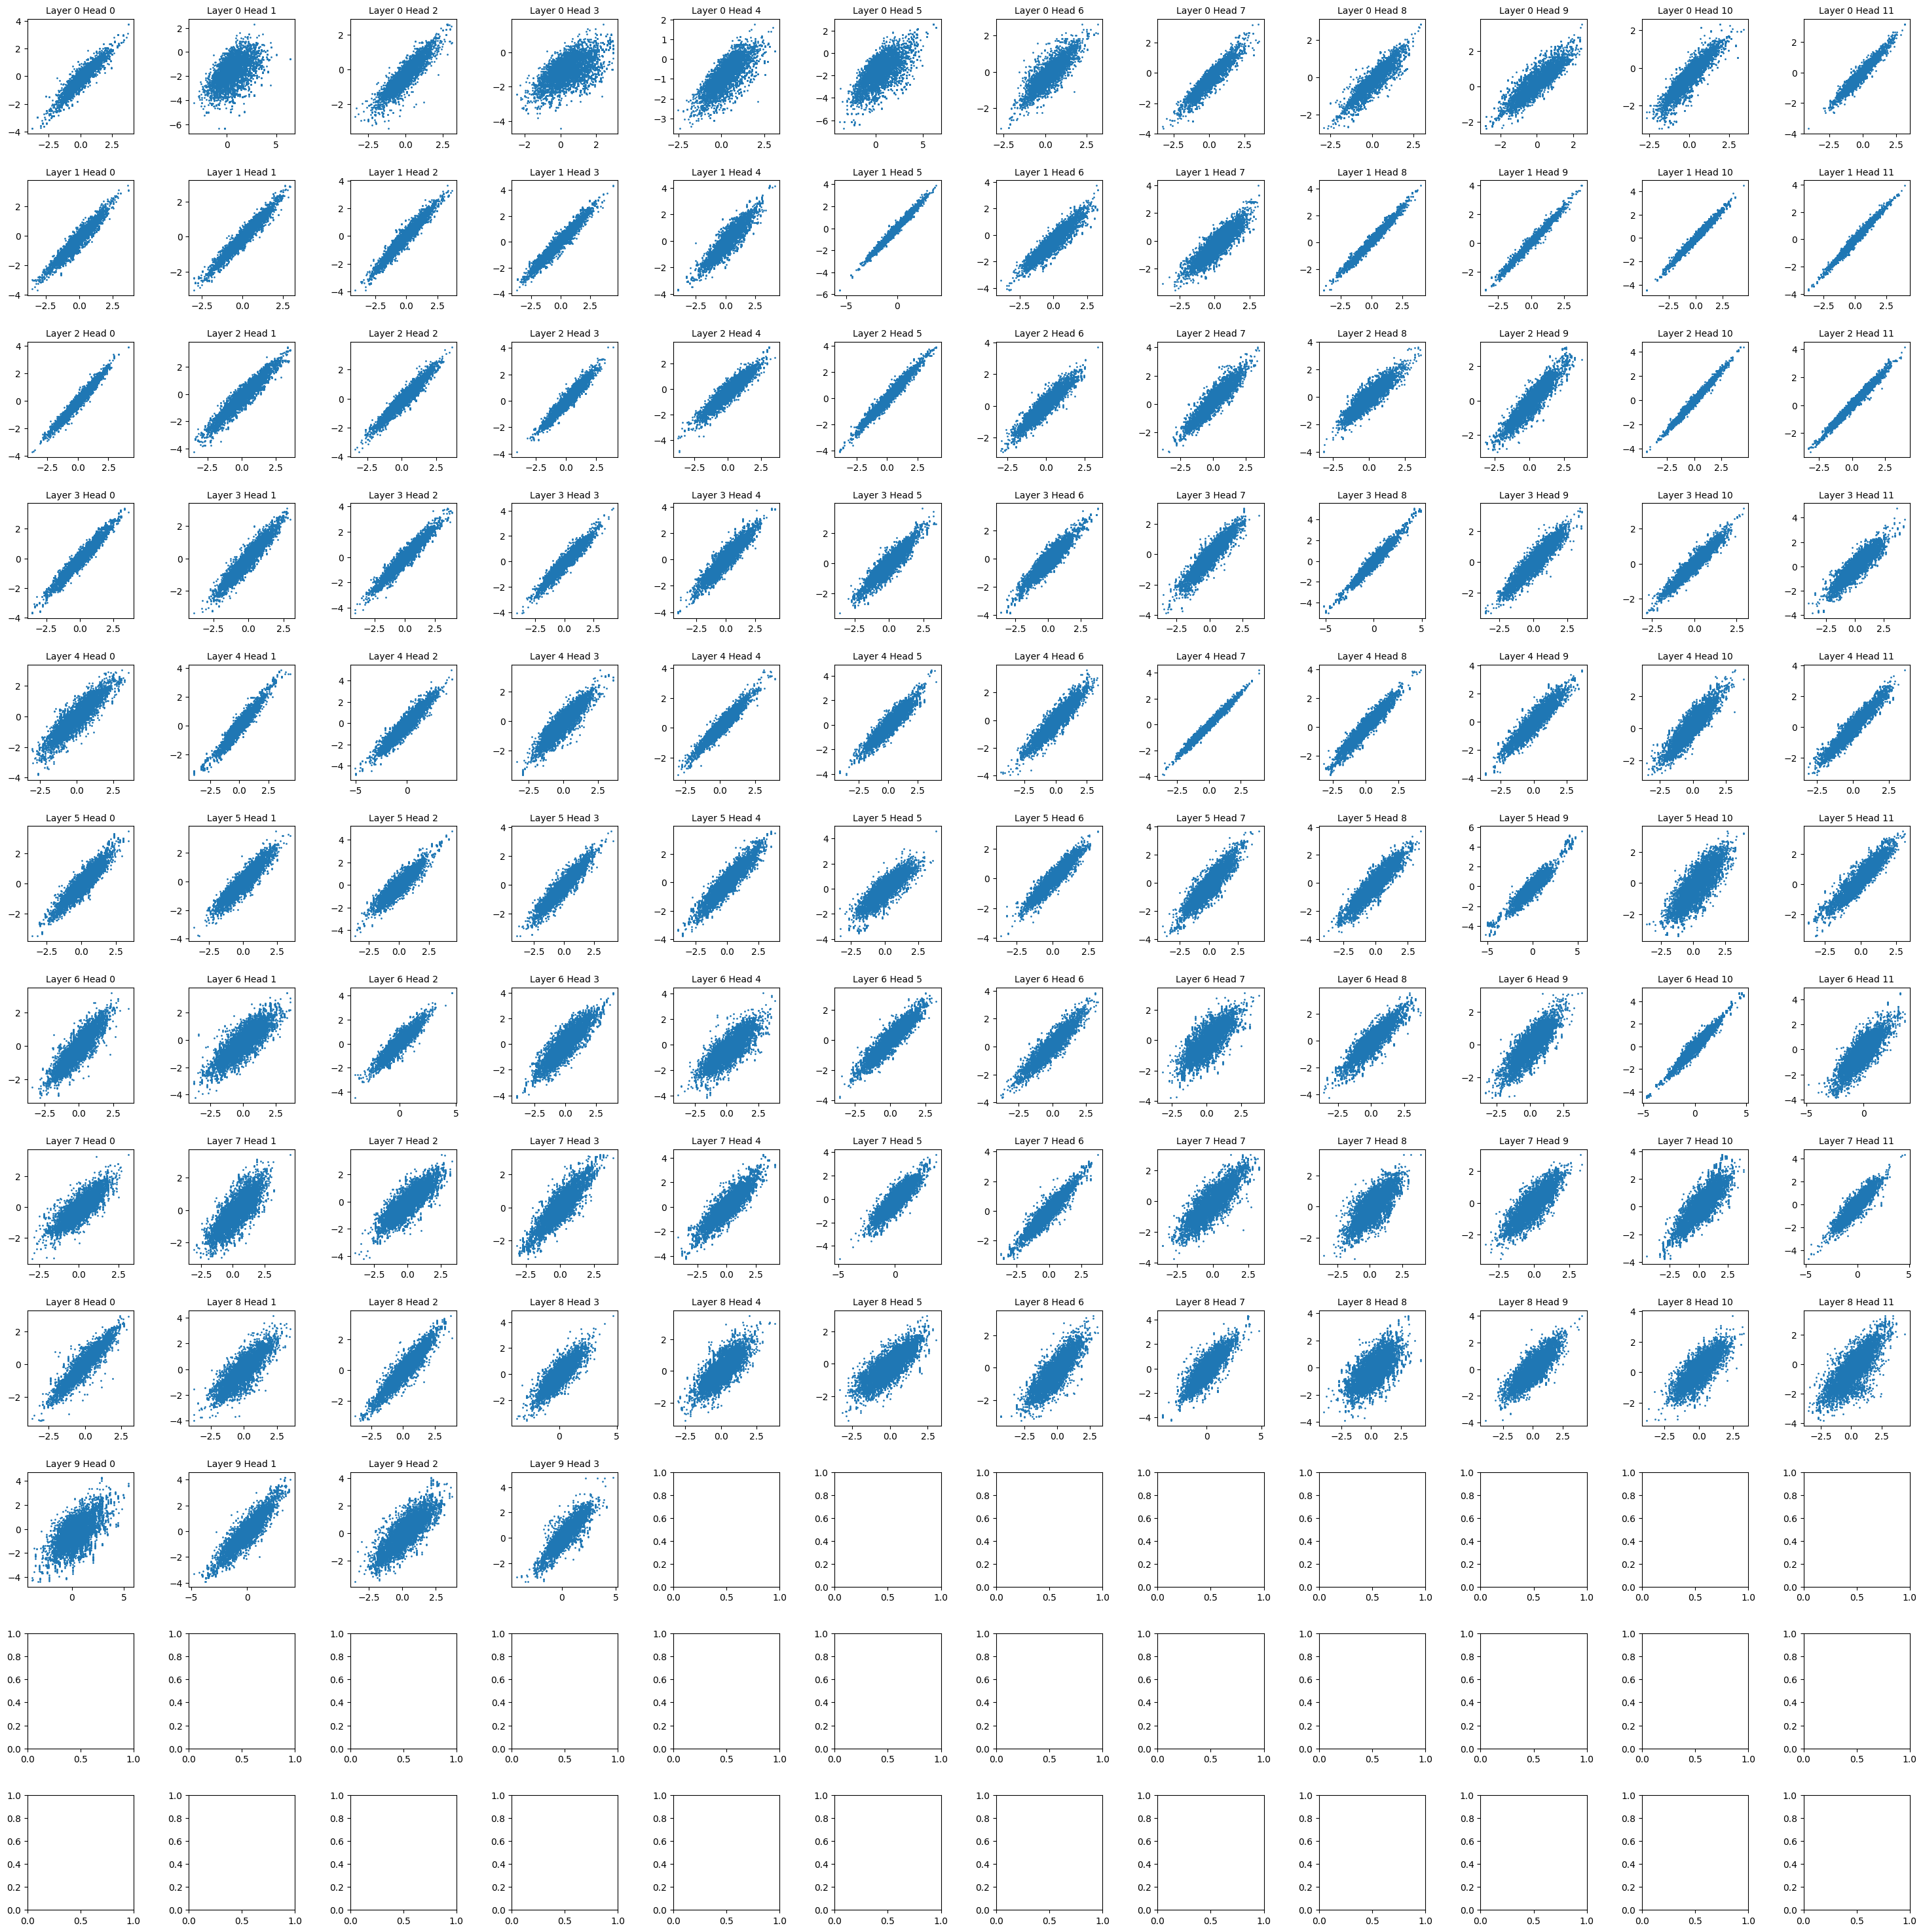

In [3]:
from statistics import correlation


fig, axes = plt.subplots(12, 12, figsize=(30, 30))  # Adjust figsize as needed
fig.tight_layout(pad=3.0)  # Adjust spacing between plots


source_mem_all = []
source_cp_all = []
correlations = []
for layer in range(12):
    for head in range(12):
        source_mem, source_cp = pattern.compute_output_difference(layer, head, from_resid=True)
        source_mem_all.append(source_mem.cpu())
        source_cp_all.append(source_cp.cpu())
        correlations.append(correlation(source_mem.cpu(), source_cp.cpu()))
        ax = axes[layer, head]
        ax.scatter(source_mem.cpu(), source_cp.cpu(), s=1)
        ax.set_title(f"Layer {layer} Head {head}", fontsize=10)

plt.show()


In [16]:
torch.tensor(correlations).mean()

tensor(0.8744)

In [13]:
source_mem.mean()

tensor(0.7279)

In [5]:
pattern = AttentionPattern(dataset, model, 500)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_53251/1004606512.py:2 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_53251/1004606512.py'                 │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/matplotlib/figure.py:35 │
│ 40 in tight_layout                                                                        │
│                                                                                           │
│   3537 │   │   try:                                                                       │
│   3538 │   │   │   previous_engine = self.get_layout_engine()                             │
│   3539 │   │   │   self.set_layout_engine(engine)                                         │
│ ❱ 3540 │   │   │   engine.execute(self)                                                   │
│   3541 │   │   │   if previous_engine is not None and not isinstance(                     │
│   3542 │   │   │   │   previous_engine, (TightLayoutEngine, PlaceHolderLayoutEngine)      │
│   3543 │   │   │   ):                                                                     │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/matplotlib/layout_engin │
│ e.py:183 in execute                                                                       │
│                                                                                           │
│   180 │   │   info = self._params                                                         │
│   181 │   │   renderer = fig._get_renderer()                                              │
│   182 │   │   with getattr(renderer, "_draw_disabled", nullcontext)():                    │
│ ❱ 183 │   │   │   kwargs = get_tight_layout_figure(                                       │
│   184 │   │   │   │   fig, fig.axes, get_subplotspec_list(fig.axes), renderer,            │
│   185 │   │   │   │   pad=info['pad'], h_pad=info['h_pad'], w_pad=info['w_pad'],          │
│   186 │   │   │   │   rect=info['rect'])                                                  │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/matplotlib/_tight_layou │
│ t.py:266 in get_tight_layout_figure                                                       │
│                                                                                           │
│   263 │   │   │   slice(ss.rowspan.start * div_row, ss.rowspan.stop * div_row),           │
│   264 │   │   │   slice(ss.colspan.start * div_col, ss.colspan.stop * div_col)))          │
│   265 │                                                                                   │
│ ❱ 266 │   kwargs = _auto_adjust_subplotpars(fig, renderer,                                │
│   267 │   │   │   │   │   │   │   │   │     shape=(max_nrows, max_ncols),                 │
│   268 │   │   │   │   │   │   │   │   │     span_pairs=span_pairs,                        │
│   269 │   │   │   │   │   │   │   │   │     subplot_list=subplot_list,                    │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/matplotlib/_tight_layou │
│ t.py:82 in _auto_adjust_subplotpars                                                       │
│                                                                                           │
│    79 │   │   bb = []                                                                     │
│    80 │   │   for ax in subplots:                 

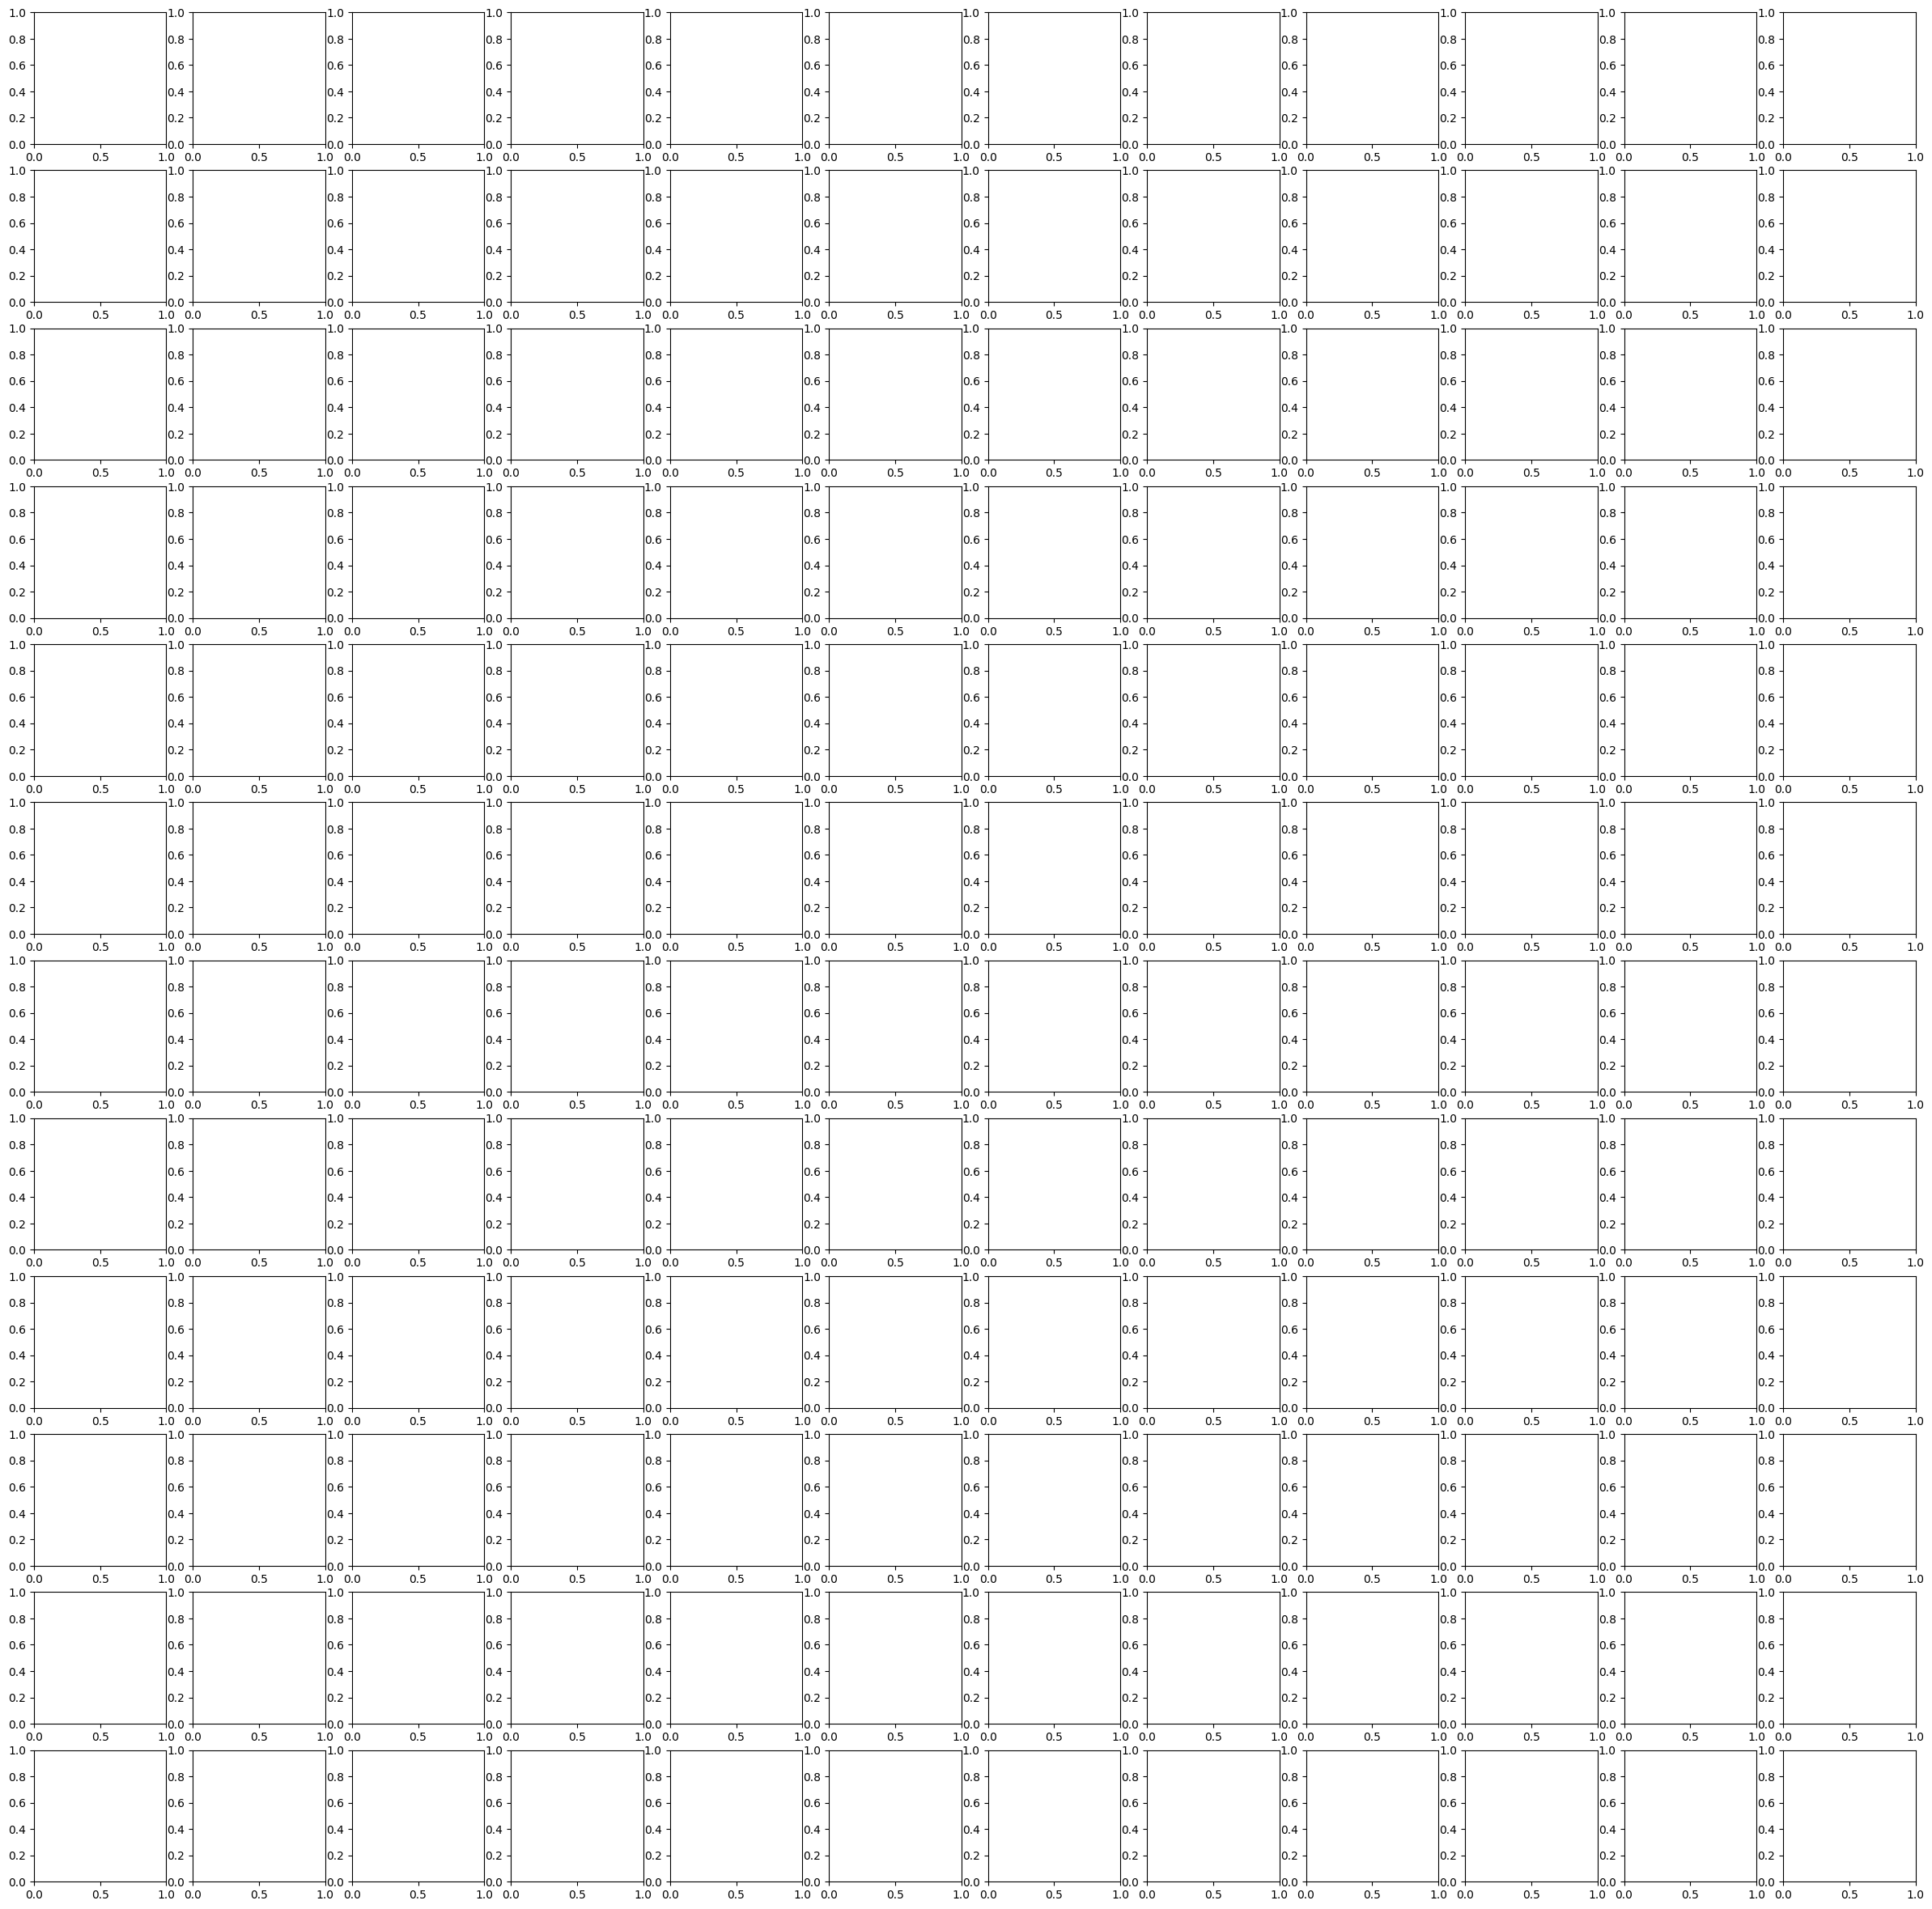

In [40]:
fig, axes = plt.subplots(12, 12, figsize=(30, 30))  # Adjust figsize as needed
fig.tight_layout(pad=3.0)  # Adjust spacing between plots

for layer in range(12):
    for head in range(12):
        source_mem, source_cp = pattern.compute_output_difference(layer, head, input_source_pos="1_2_subject",)
        ax = axes[layer, head]
        ax.scatter(source_mem.cpu(), source_cp.cpu(), s=1)
        ax.set_title(f"Layer {layer} Head {head}", fontsize=10)

plt.show()


In [6]:
pattern = AttentionPattern(dataset, model, 500)

Interaction matrix at len 57: 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]


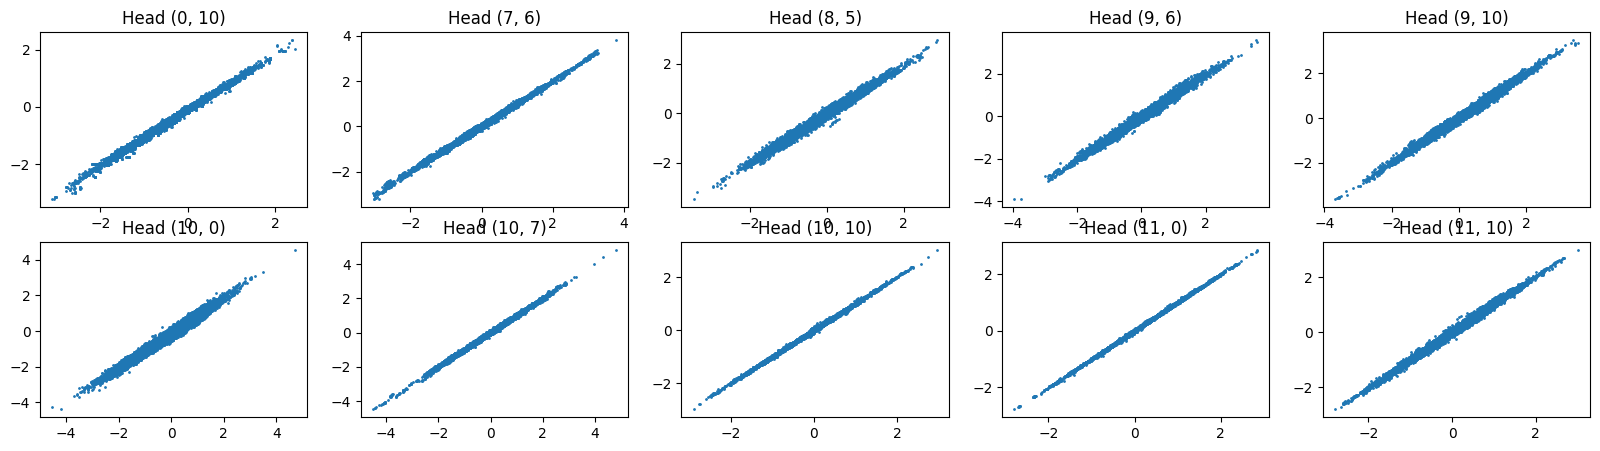

In [3]:
from scipy.stats import pearsonr
heads = [(0,10), (7,6), (8,5), (9,6), (9,10), (10,0), (10,7), (10,10), (11,0), (11,10)]
fig, ax = plt.subplots(2, 5, figsize=(20, 5))
correlation = []
for idx, head in enumerate(heads):
    source_mem, source_cp = pattern.compute_output_difference(*head, from_resid=True)
    ax[idx//5, idx%5].scatter(source_mem.cpu(), source_cp.cpu(), s=1)
    ax[idx//5, idx%5].set_title(f"Head {head}")
    correlation.append(pearsonr(source_mem.cpu(), source_cp.cpu())[0])
plt.show()


In [24]:
batch = pattern.get_batch(27)

tensor(-0.5999)
tensor(-0.7705)


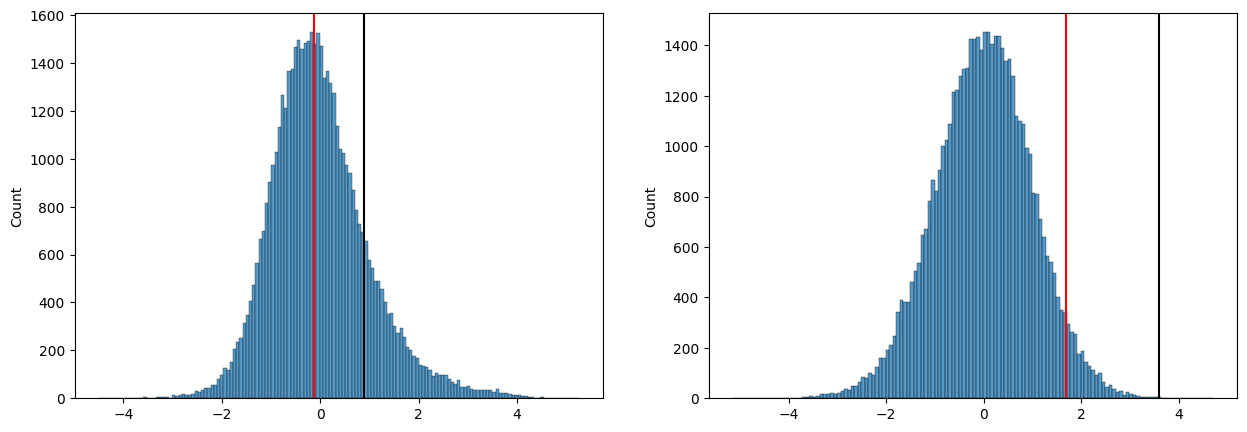

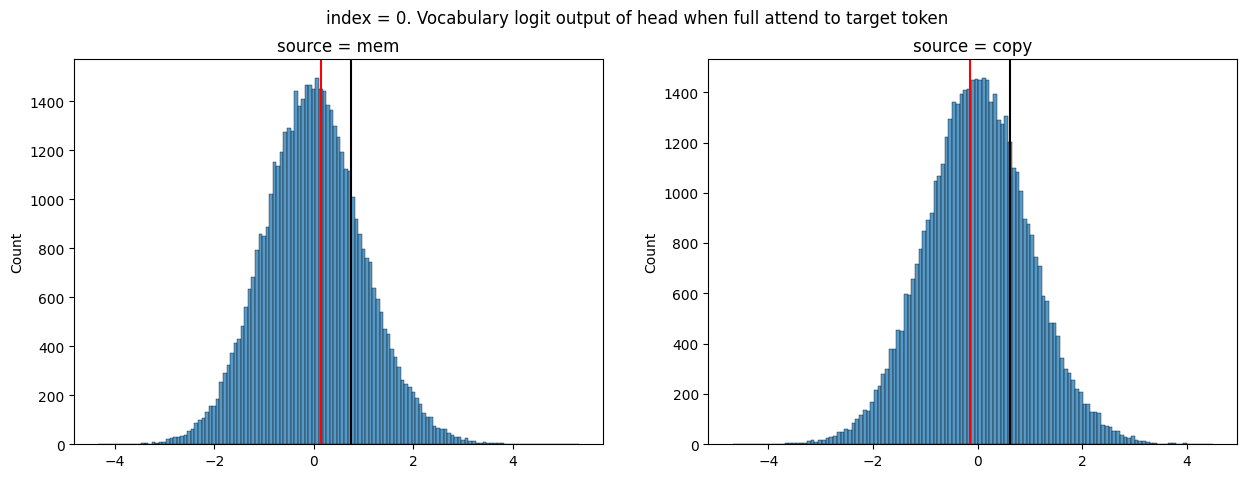

tensor(0.8439)
tensor(0.2393)


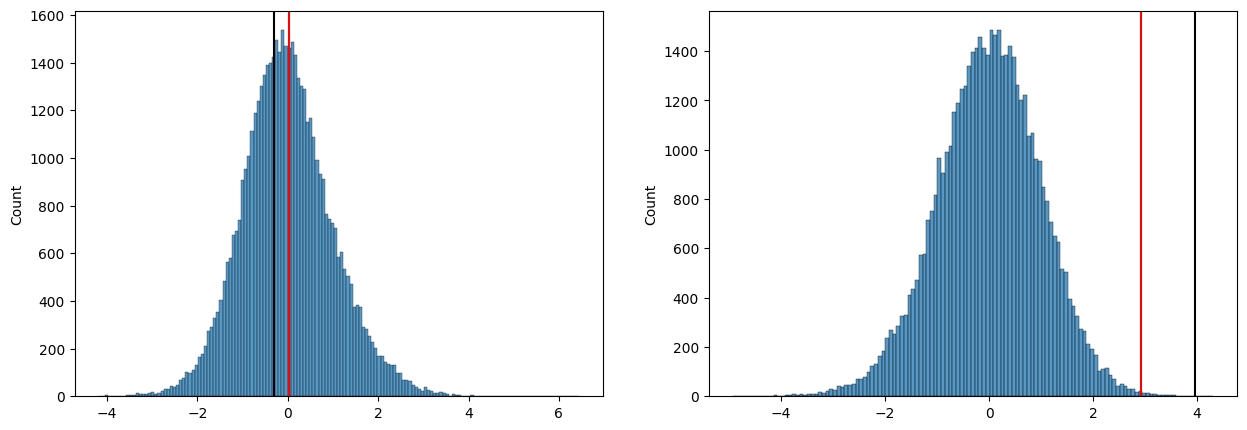

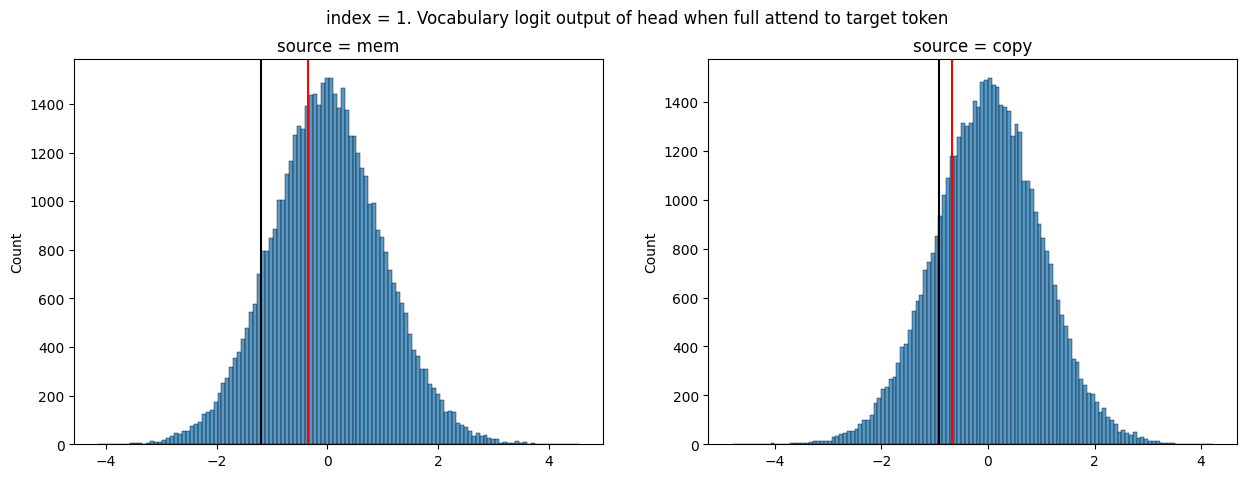

tensor(-0.9588)
tensor(-0.2100)


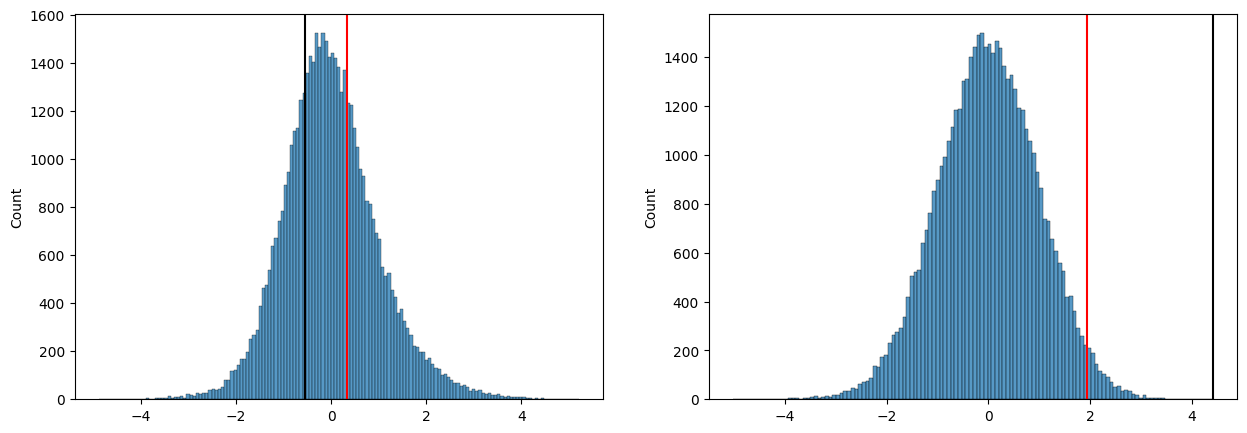

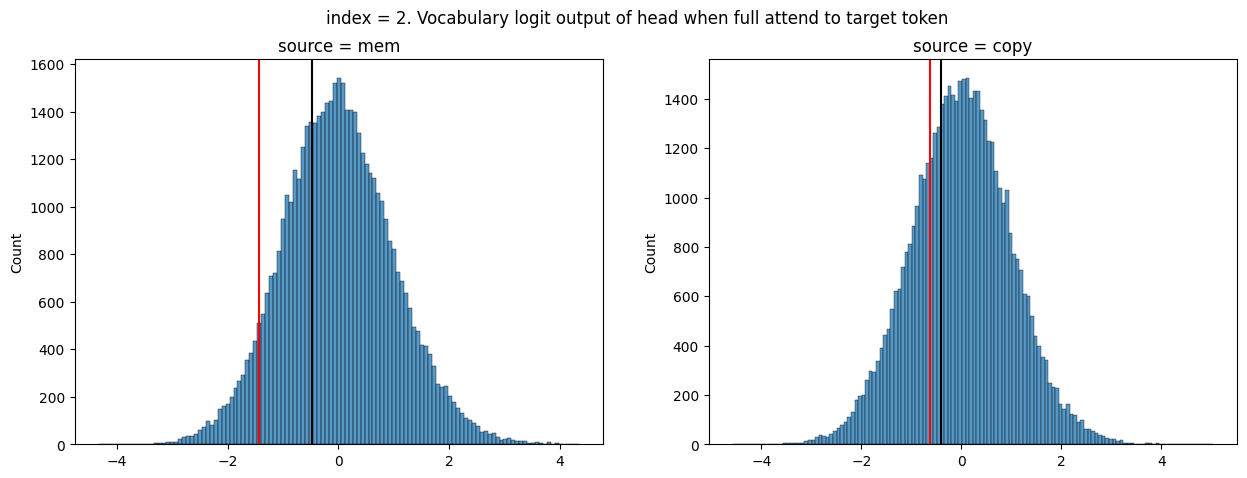

tensor(-1.2376)
tensor(-1.6236)


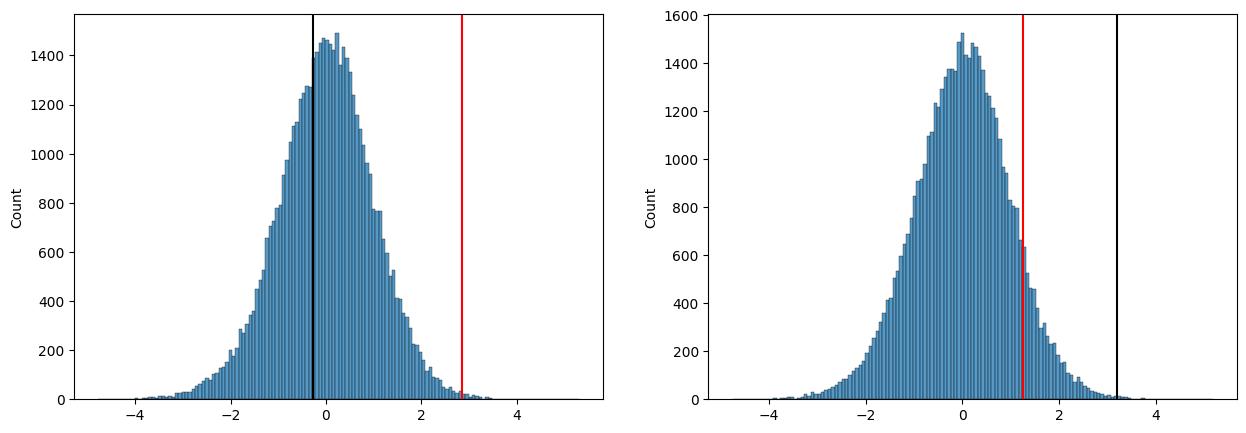

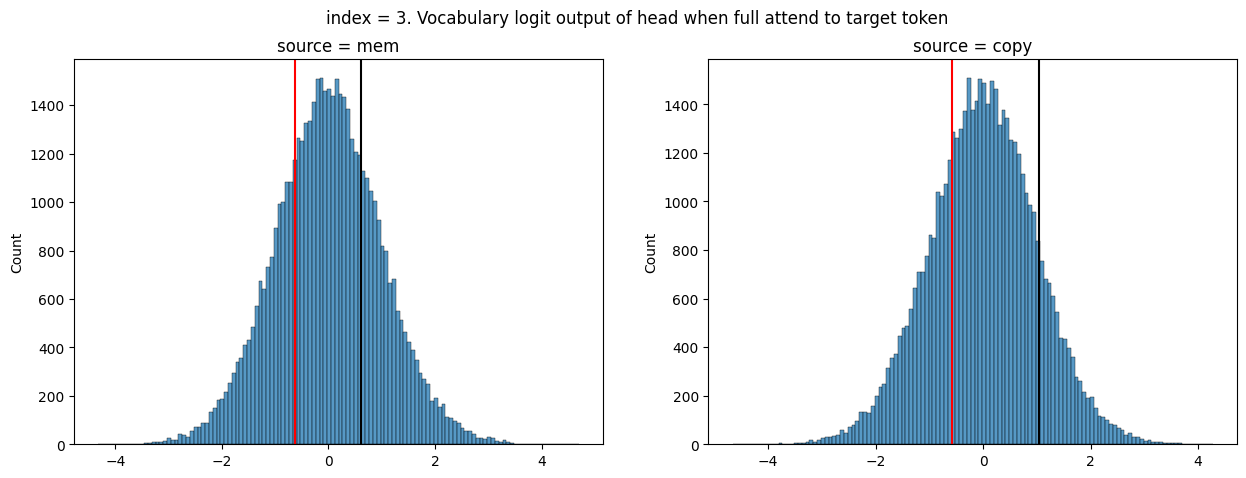

tensor(0.9330)
tensor(0.8413)


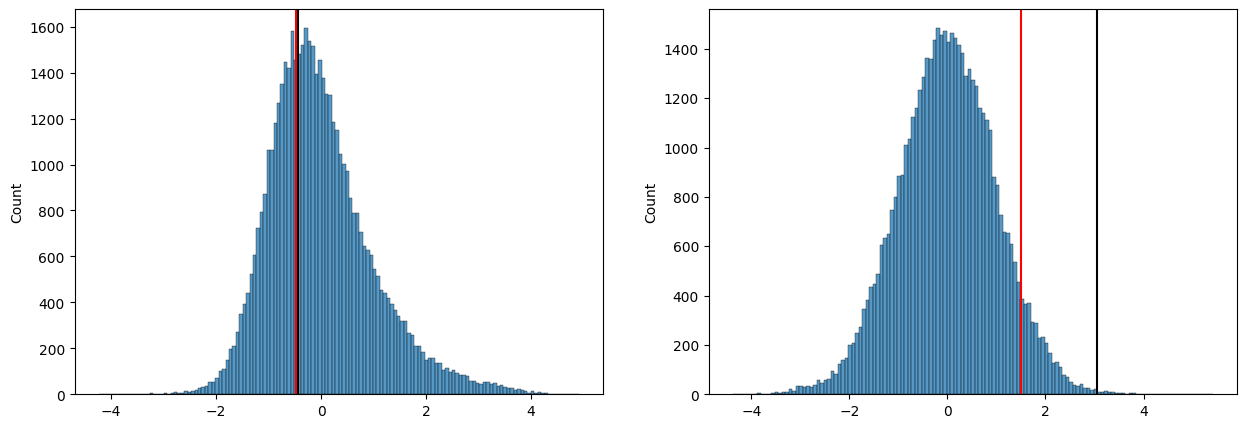

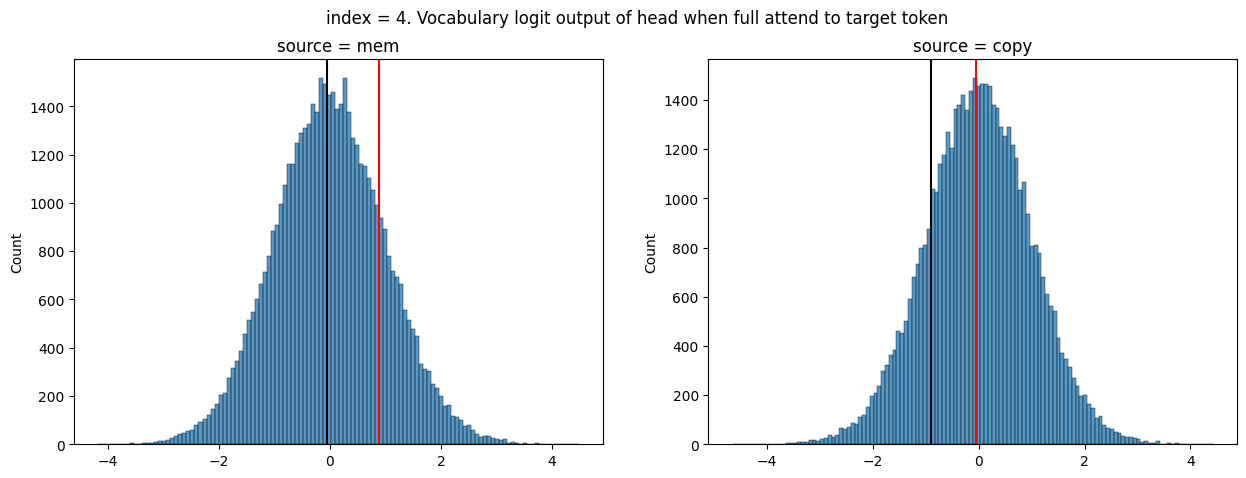

tensor(0.1954)
tensor(-0.0847)


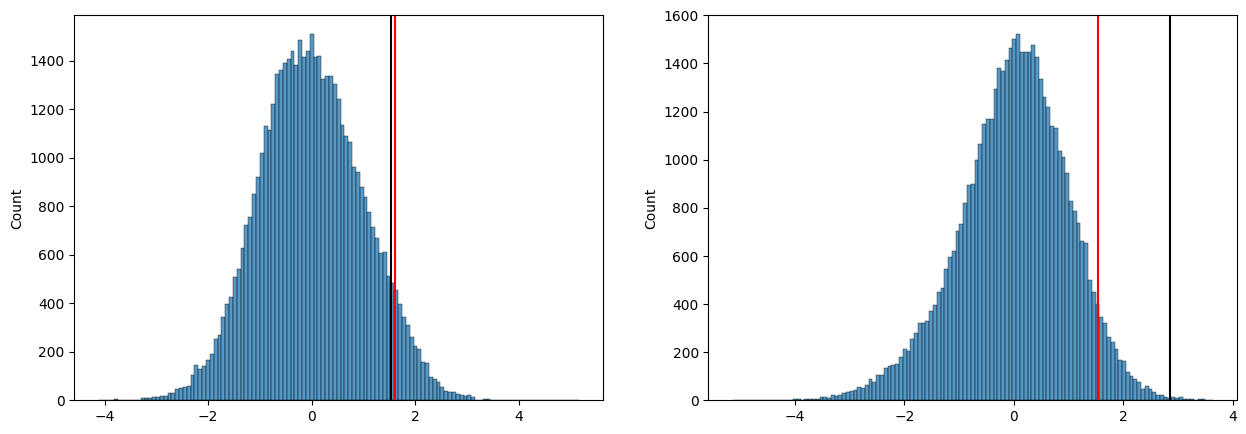

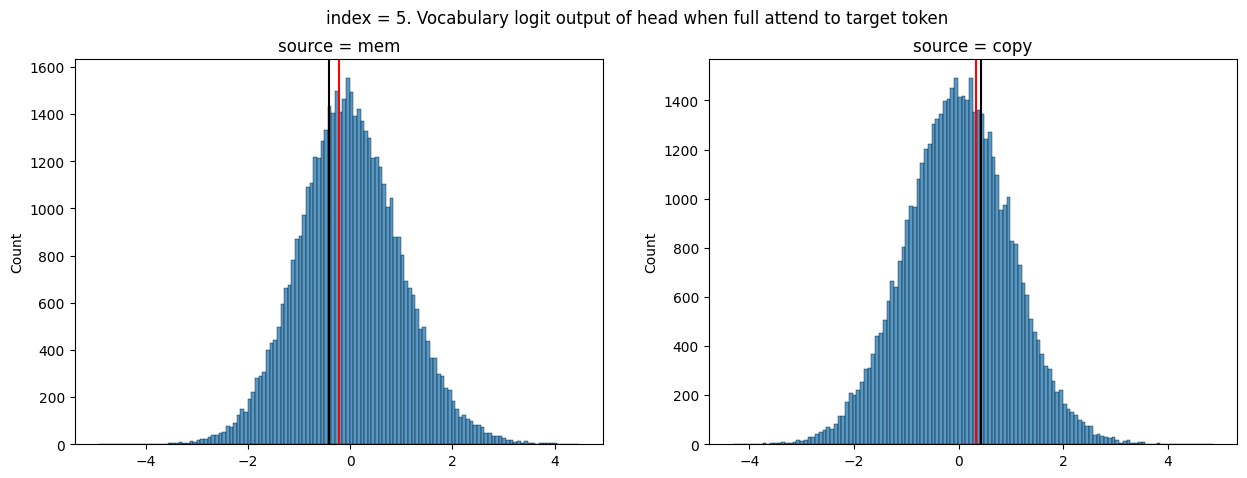

tensor(-1.7973)
tensor(-1.1870)


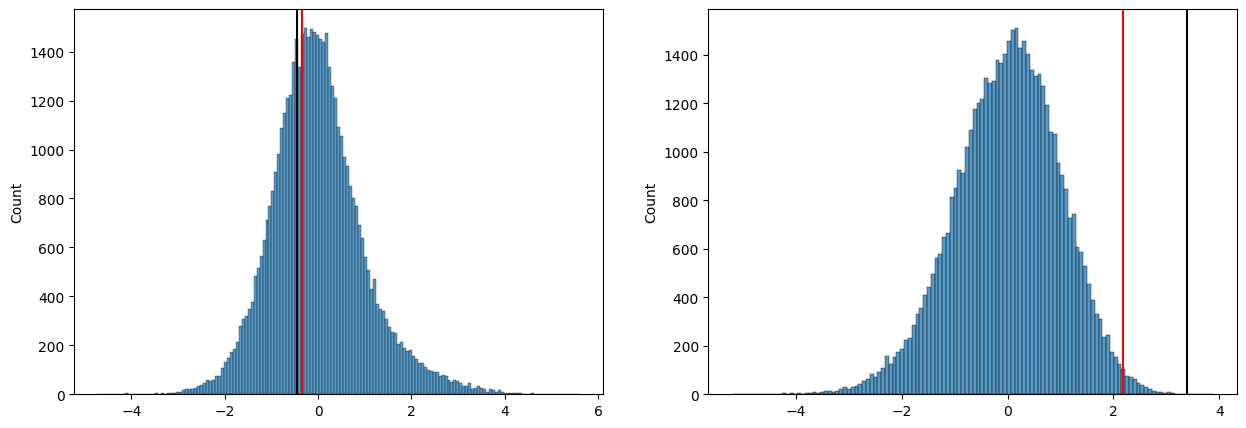

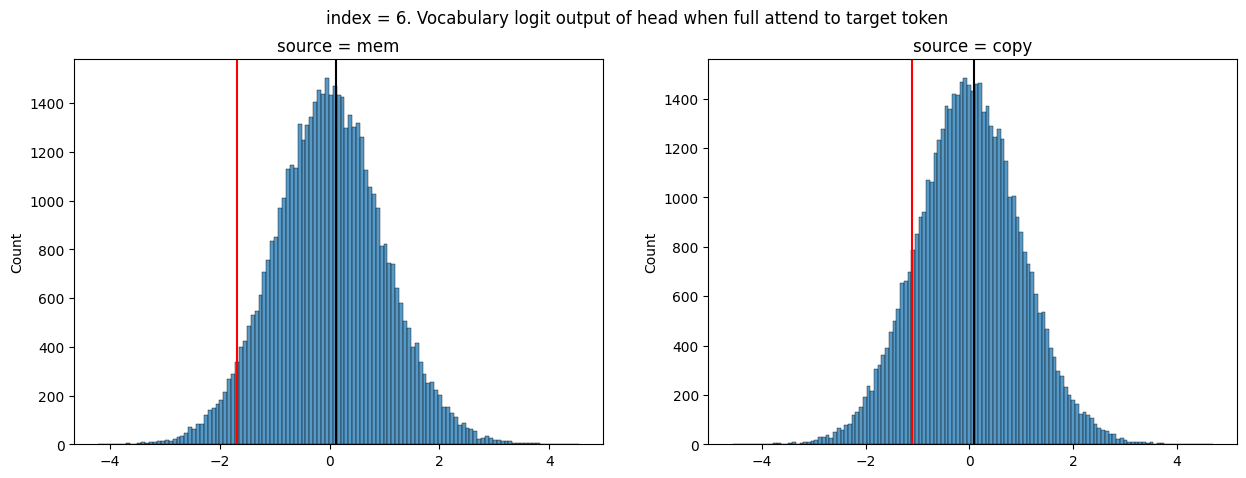

tensor(1.3245)
tensor(0.9832)


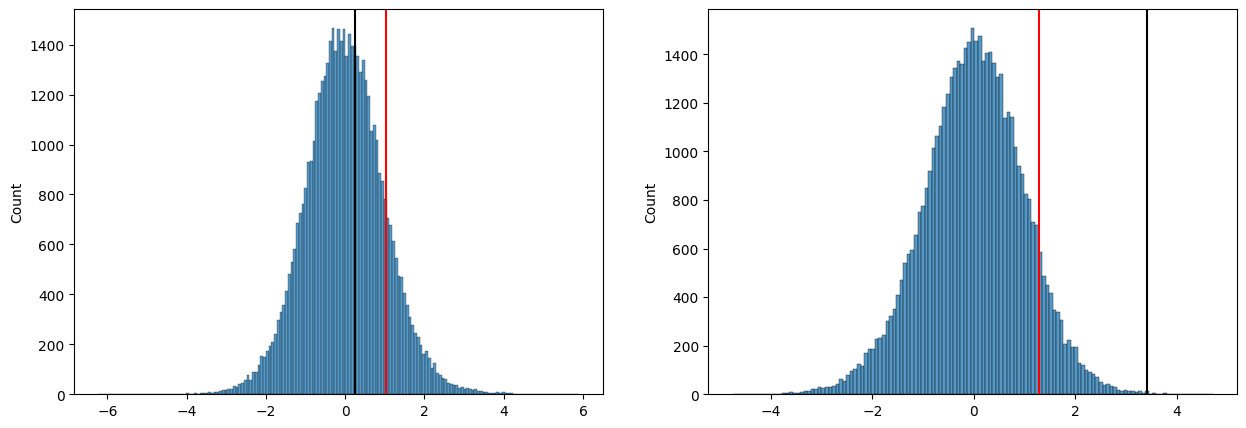

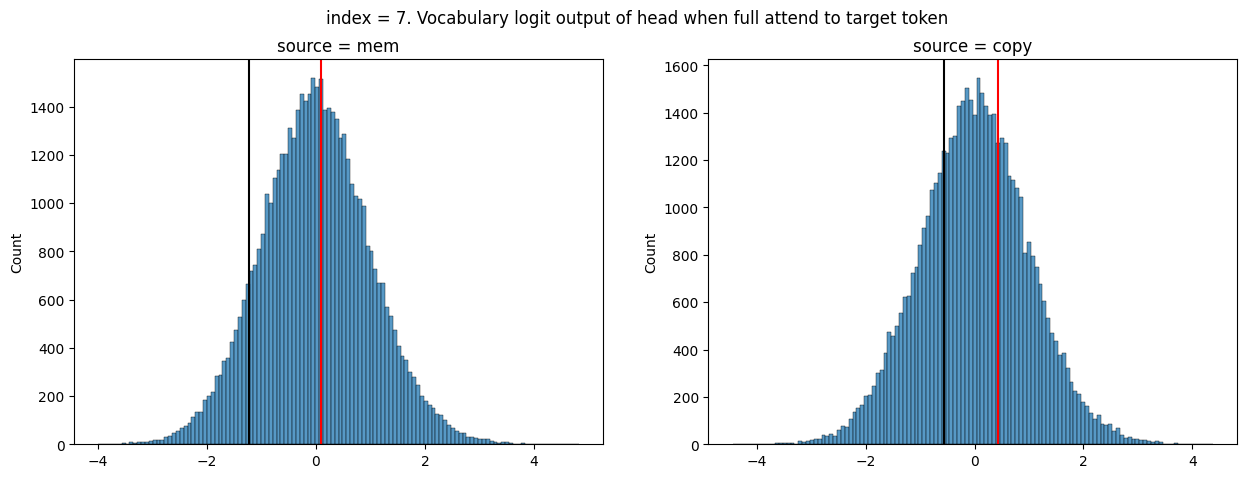

tensor(-1.2046)
tensor(-0.8078)


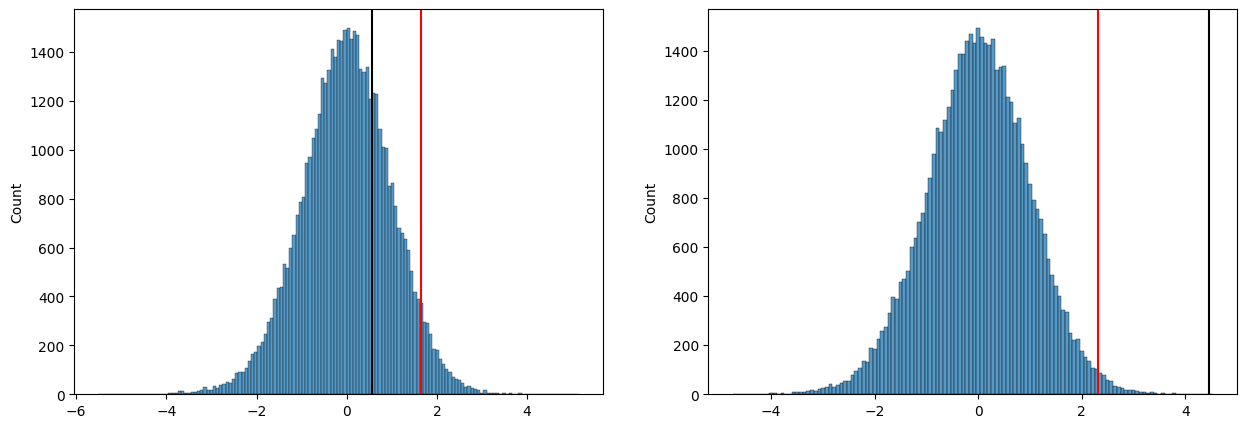

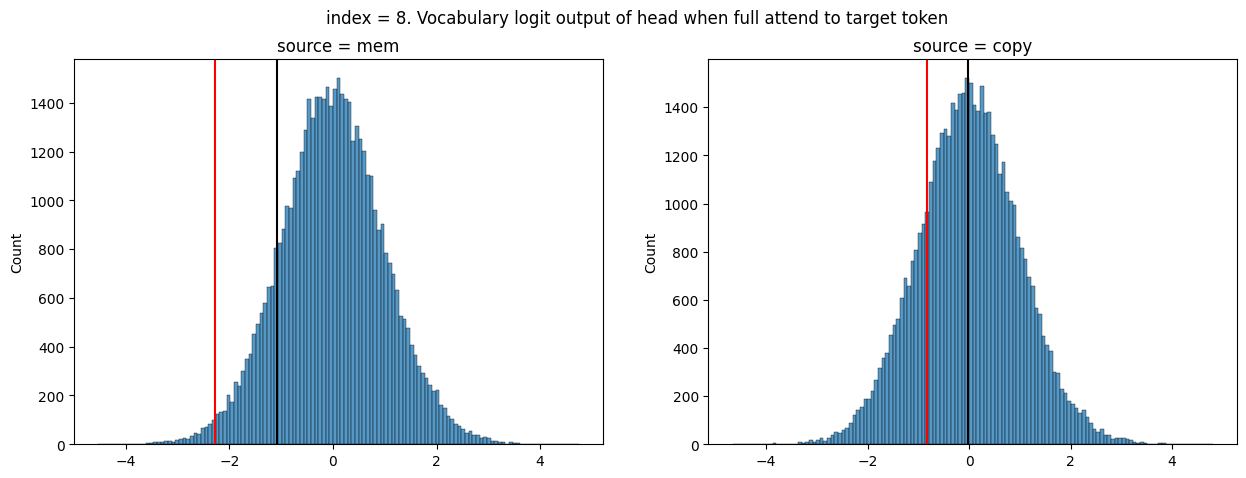

tensor(-0.8687)
tensor(-0.9965)


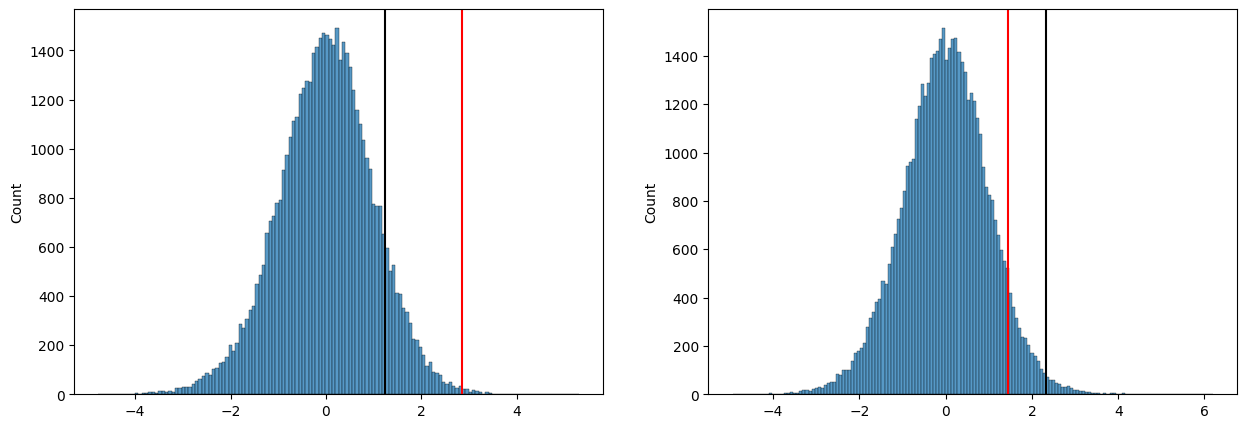

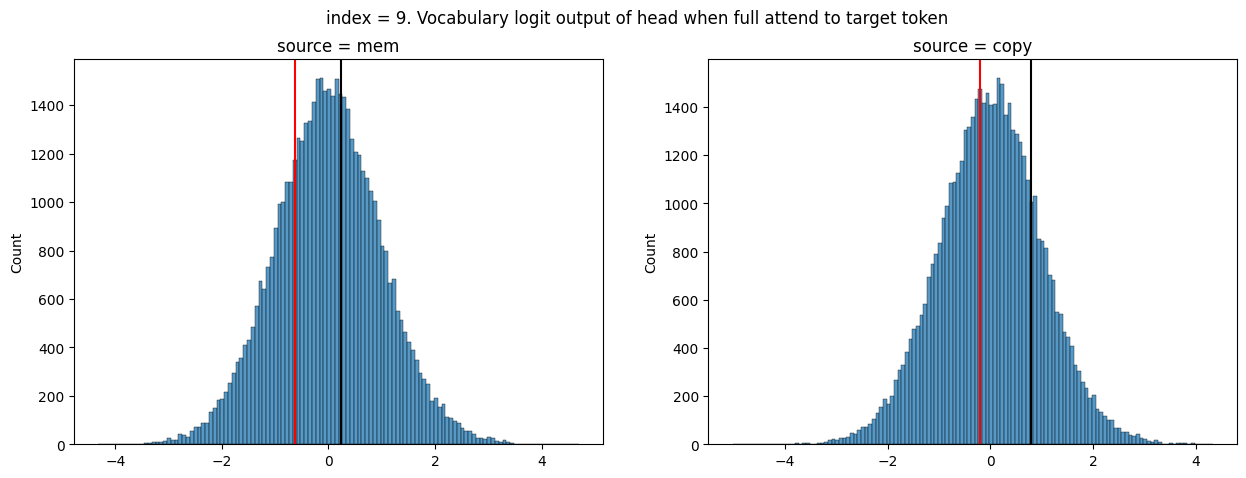

tensor(-0.0196)
tensor(0.4618)


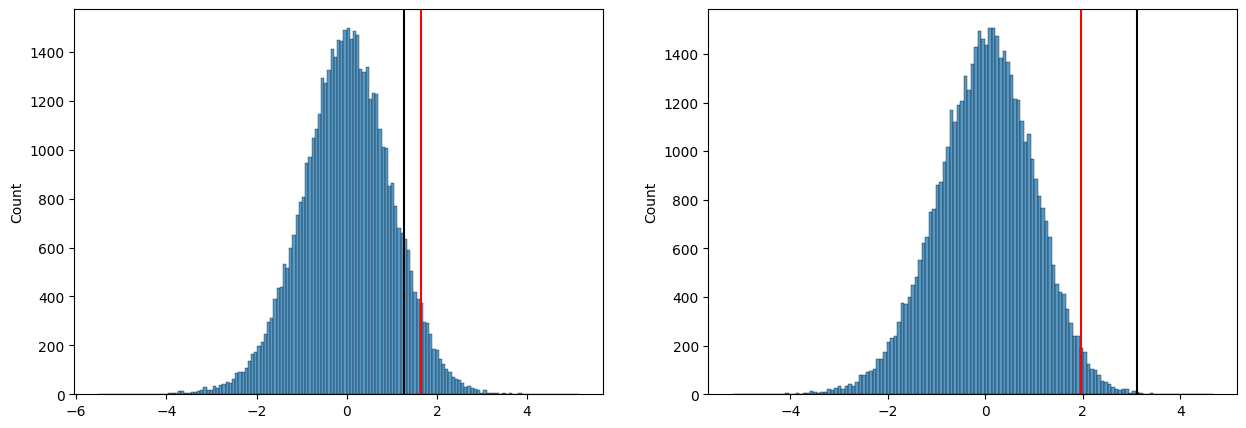

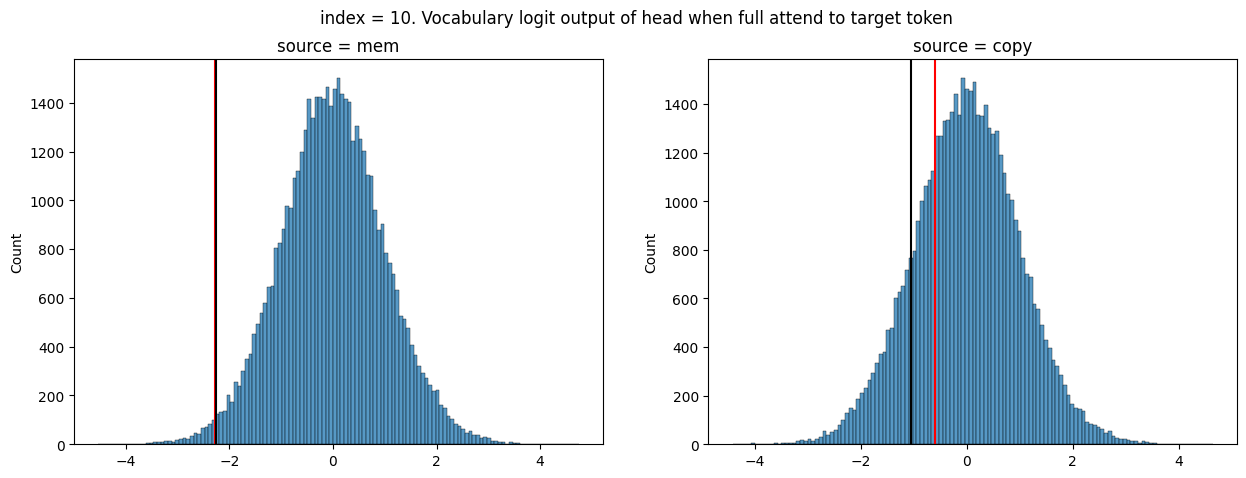

tensor(-0.0713)
tensor(-0.5624)


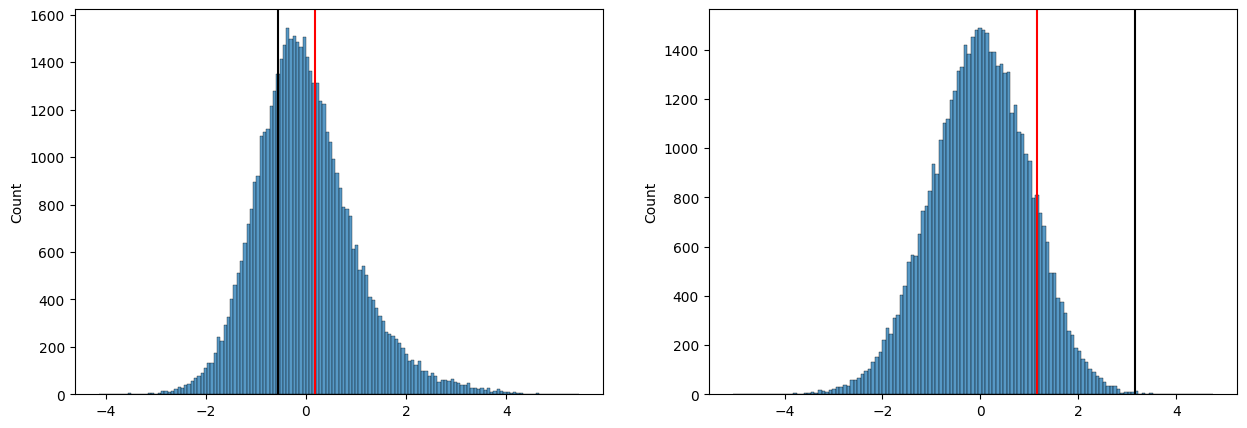

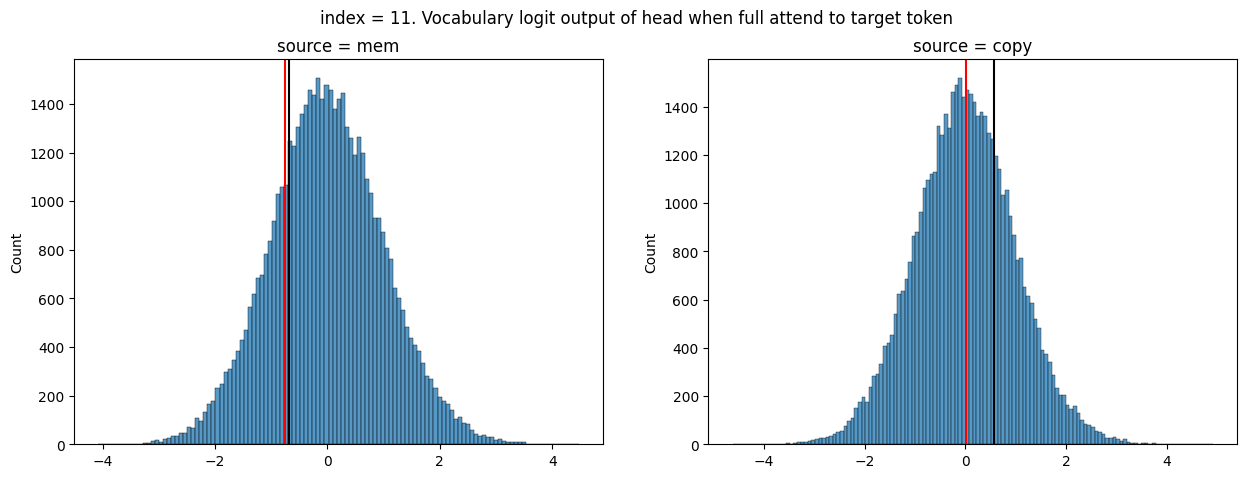

tensor(-0.0011)
tensor(-0.3322)


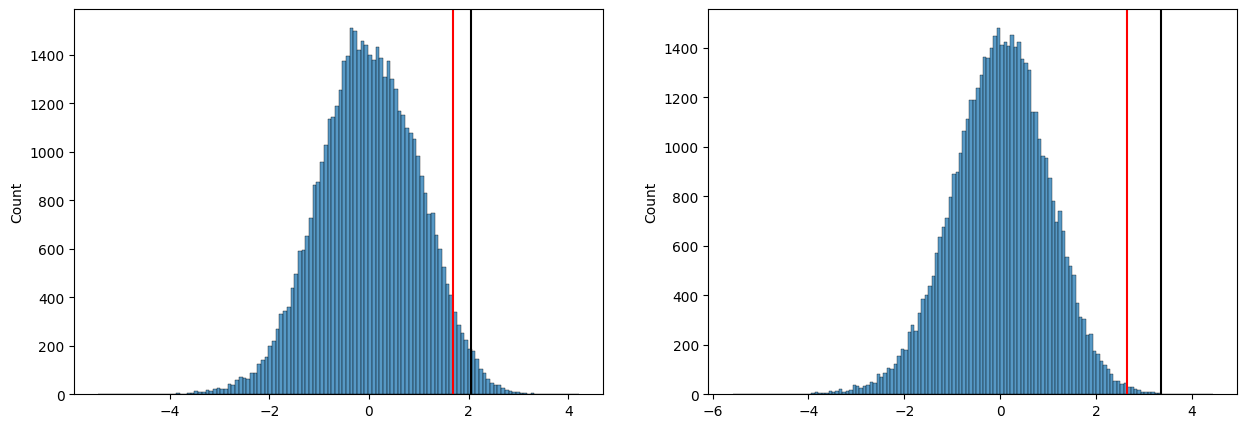

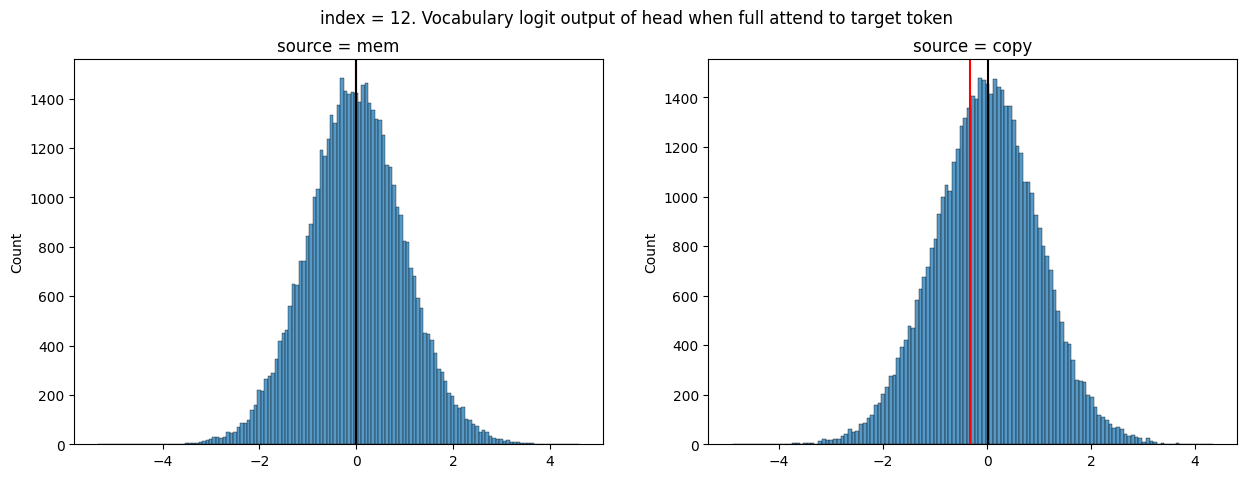

tensor(-2.1170)
tensor(-1.7198)


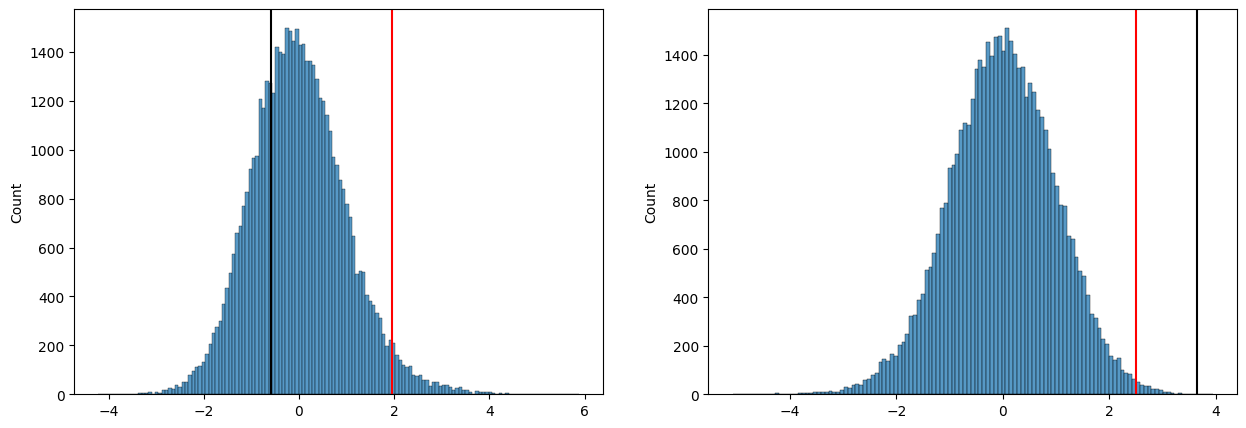

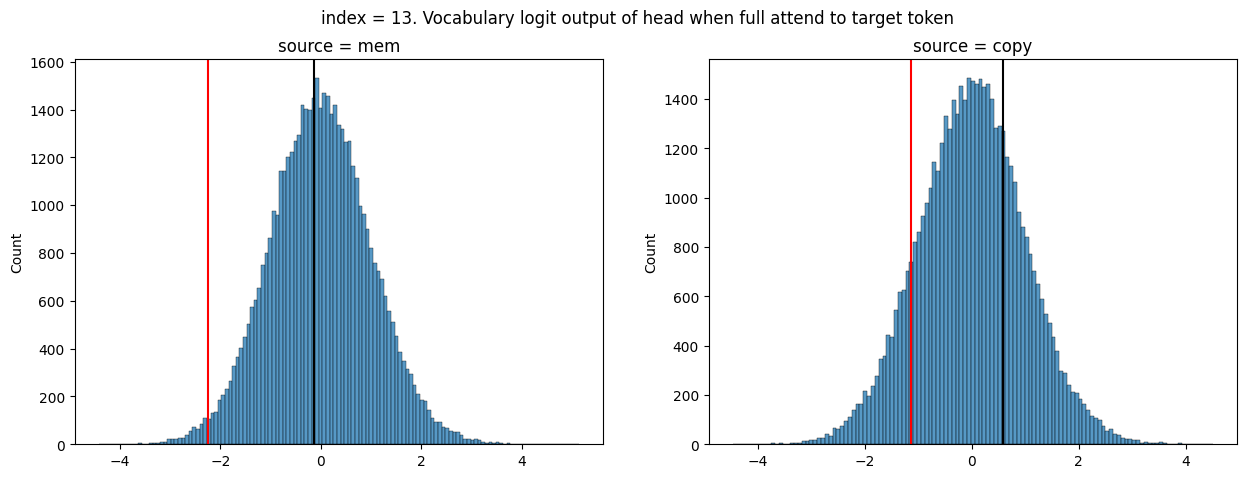

tensor(0.5005)
tensor(-0.7069)


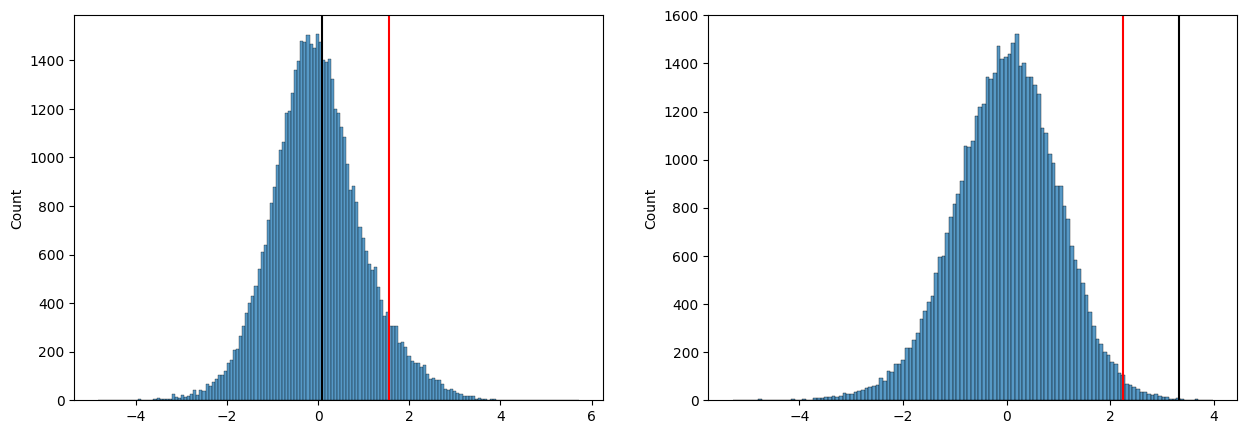

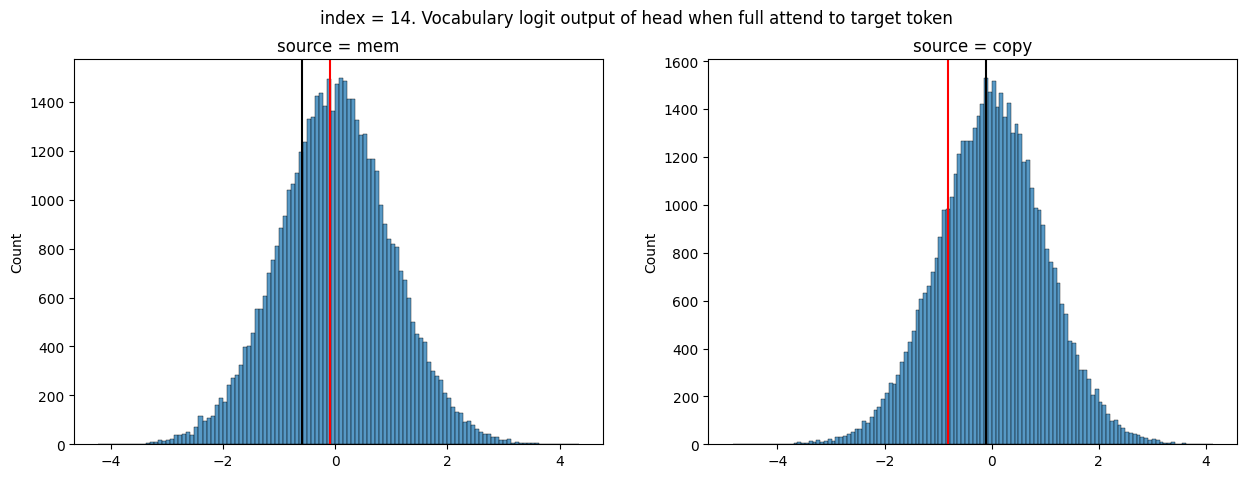

tensor(-1.1338)
tensor(-0.8403)


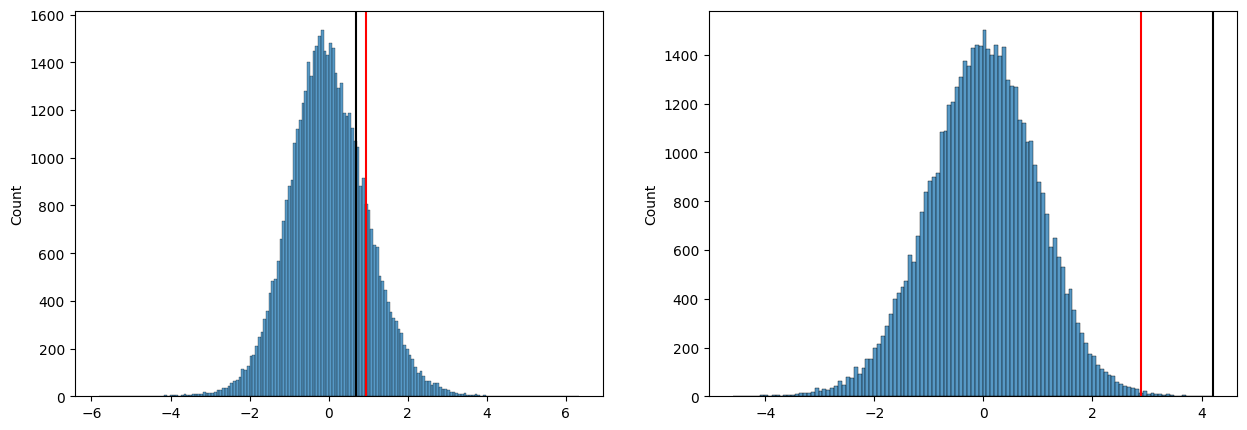

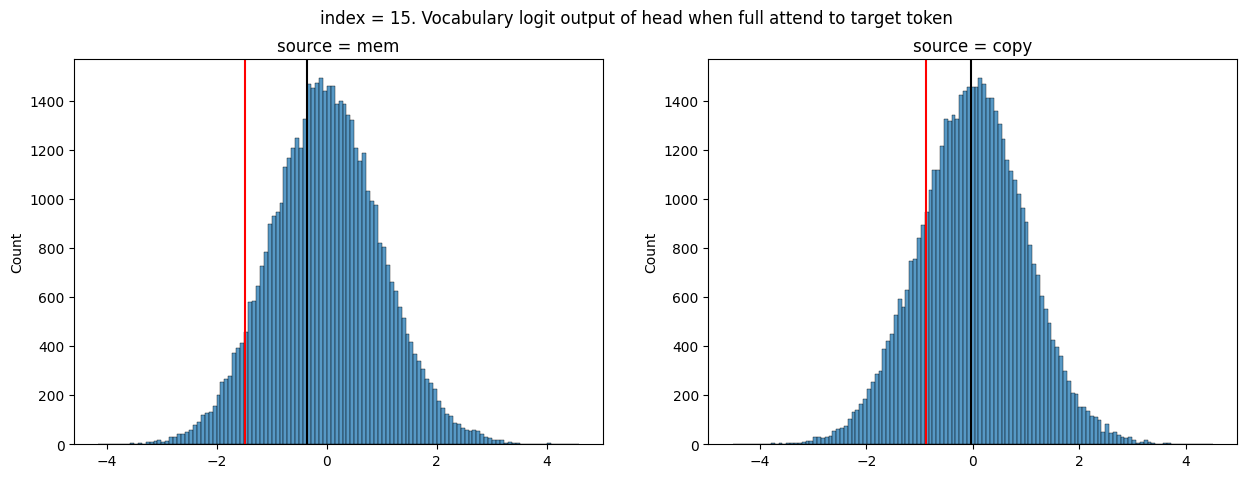

tensor(-0.0677)
tensor(0.0410)


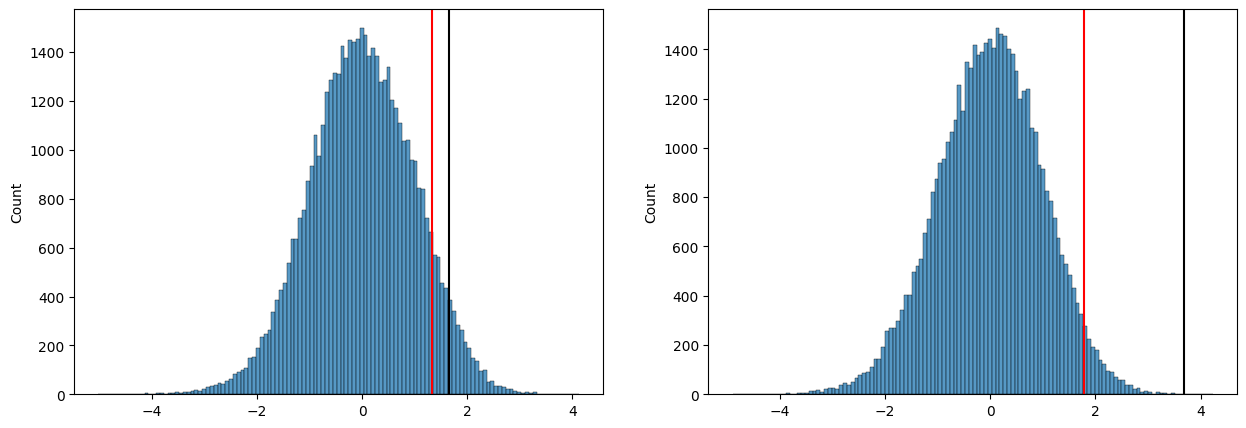

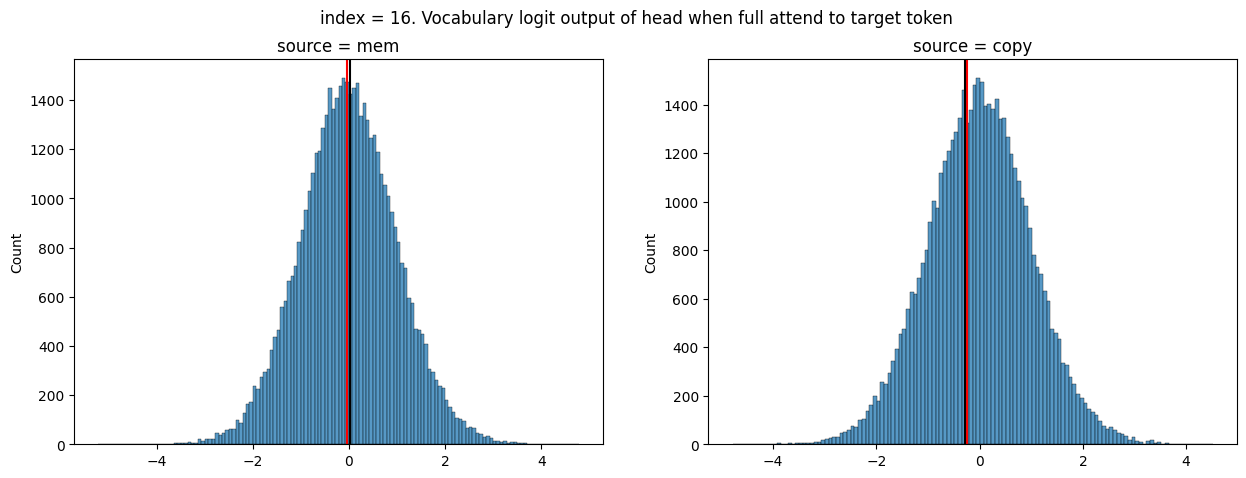

tensor(0.6333)
tensor(0.3548)


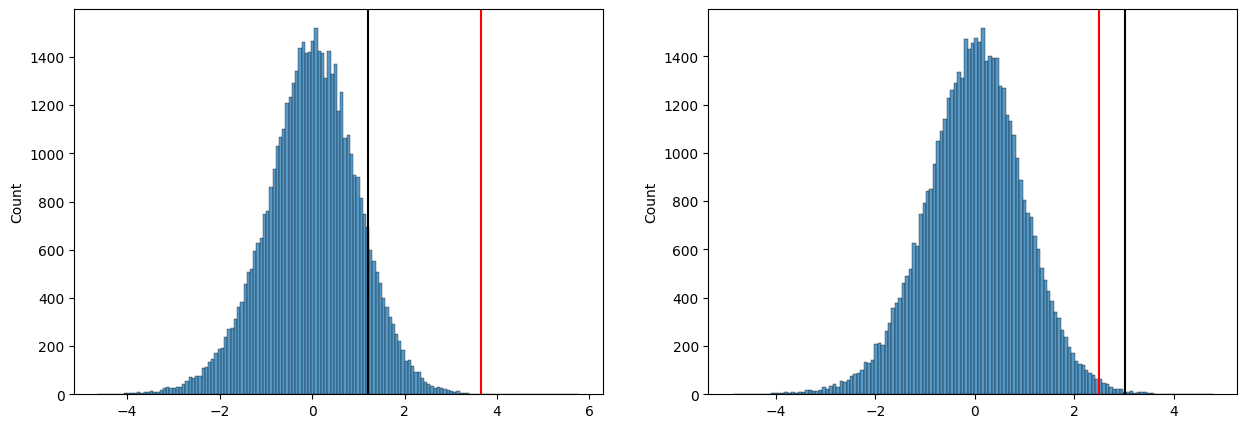

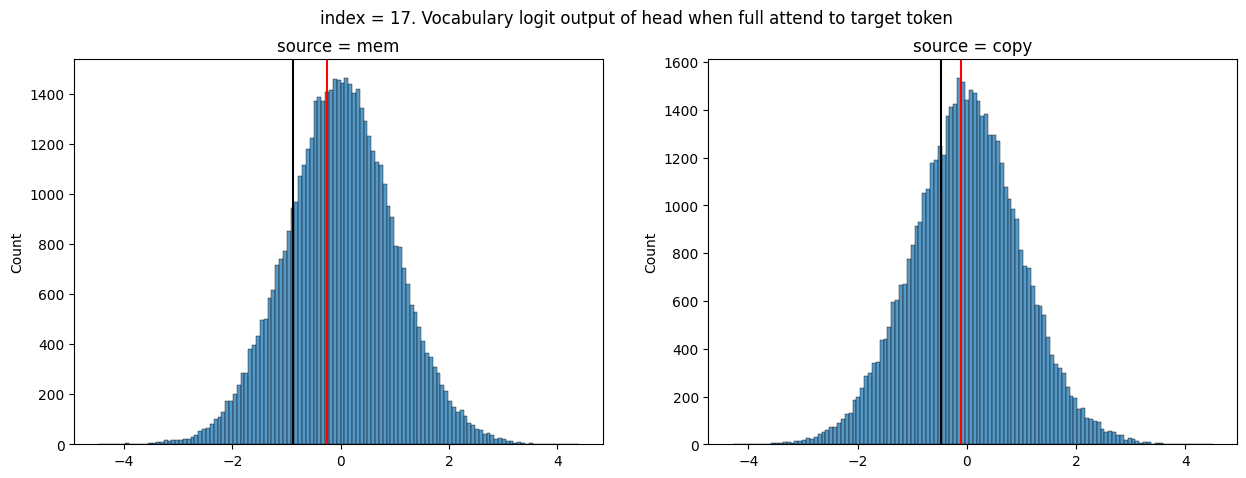

tensor(-0.4483)
tensor(-0.2080)


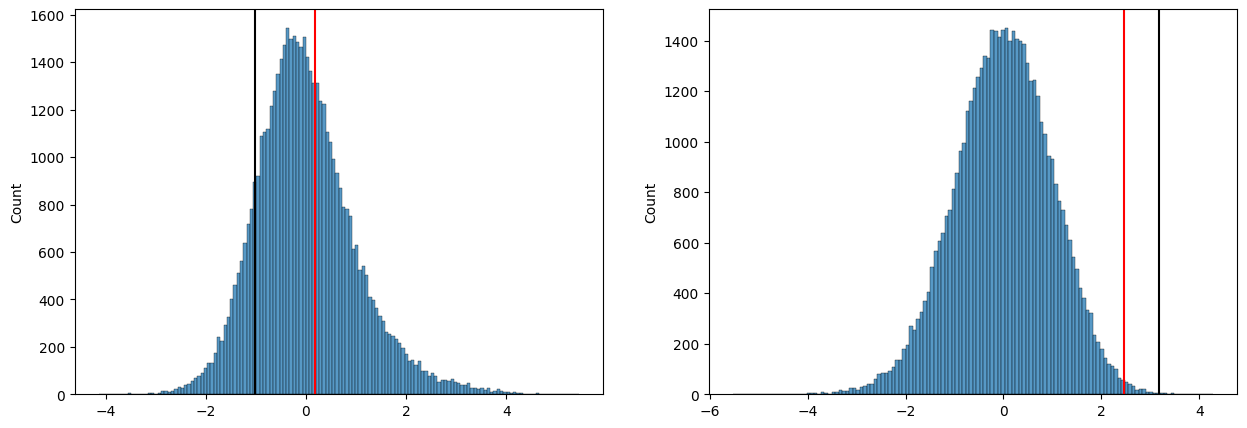

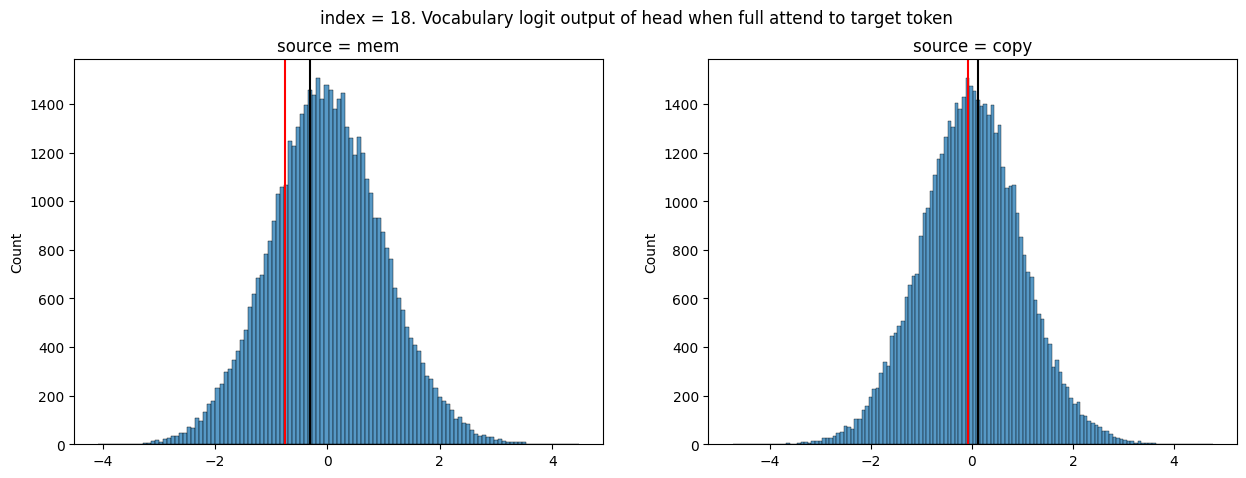

tensor(-2.2406)
tensor(-1.5981)


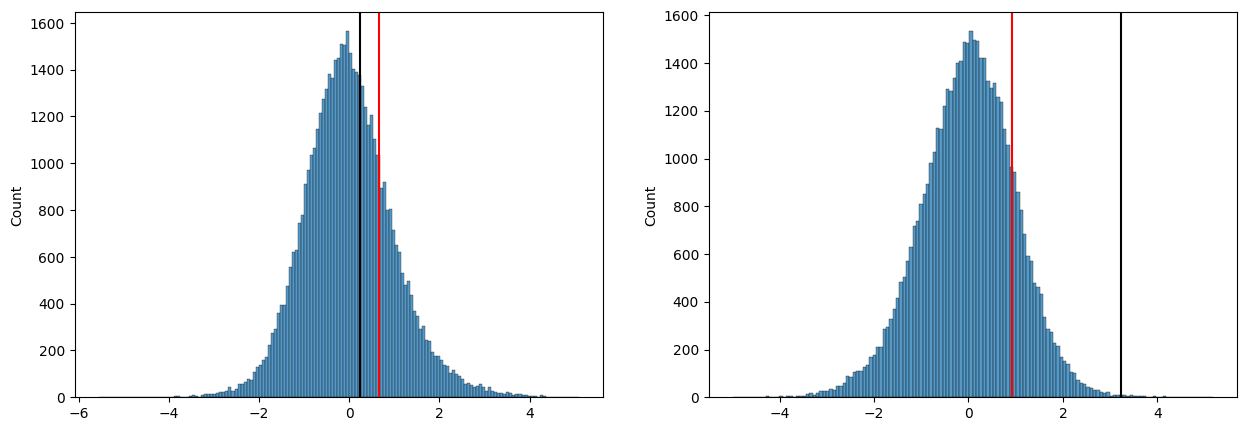

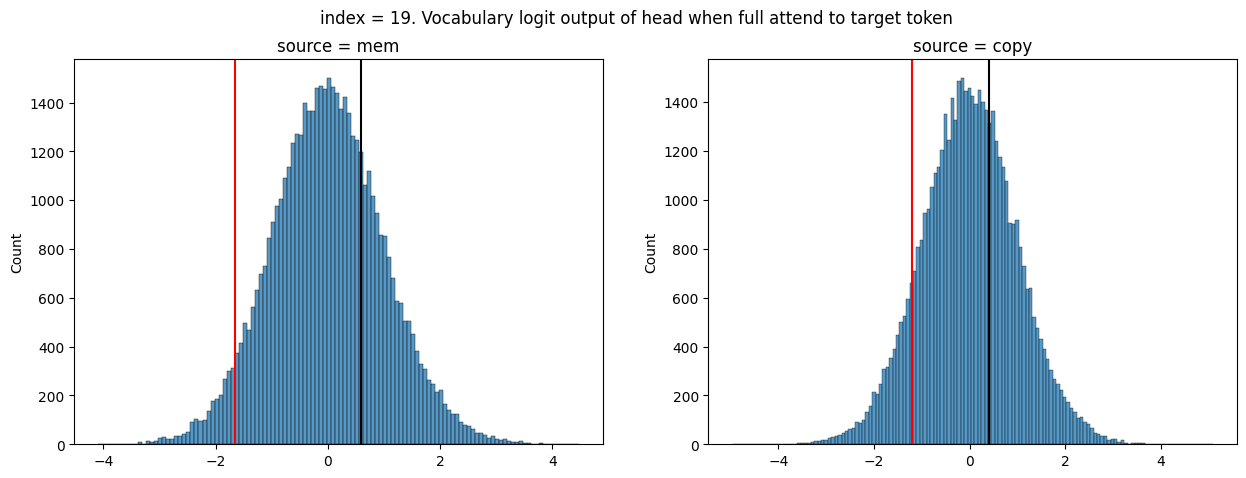

tensor(-0.8457)
tensor(-0.5958)


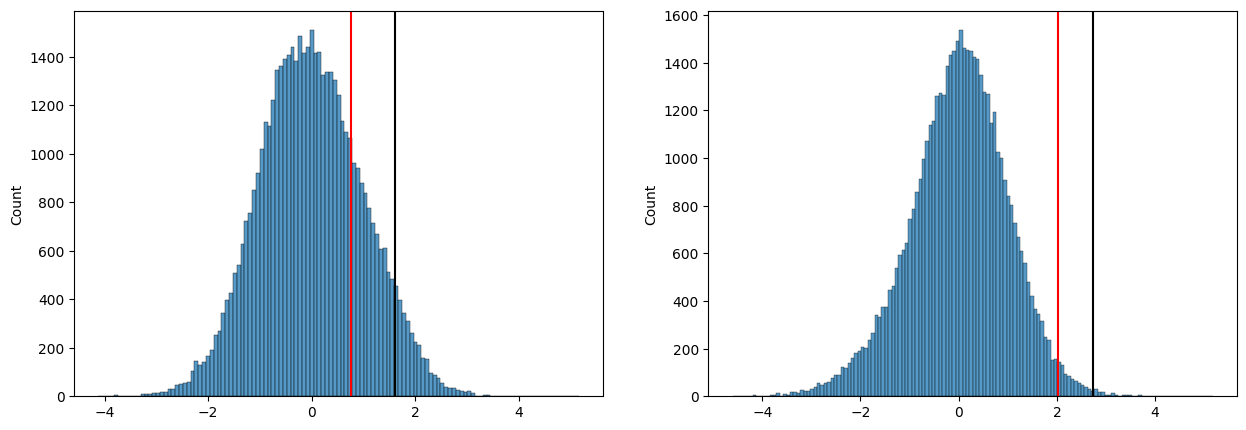

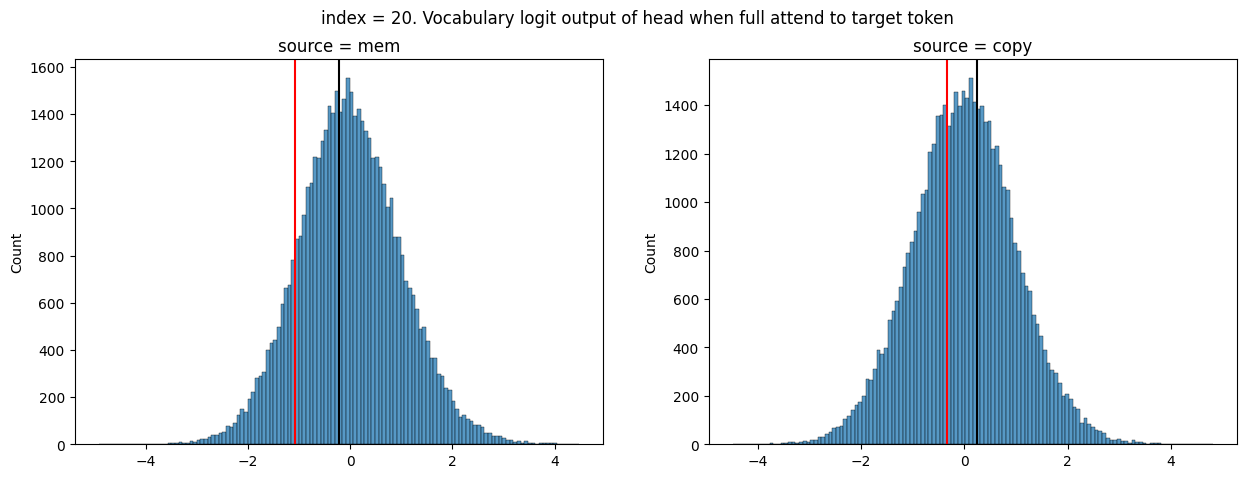

tensor(-0.8741)
tensor(-0.5407)


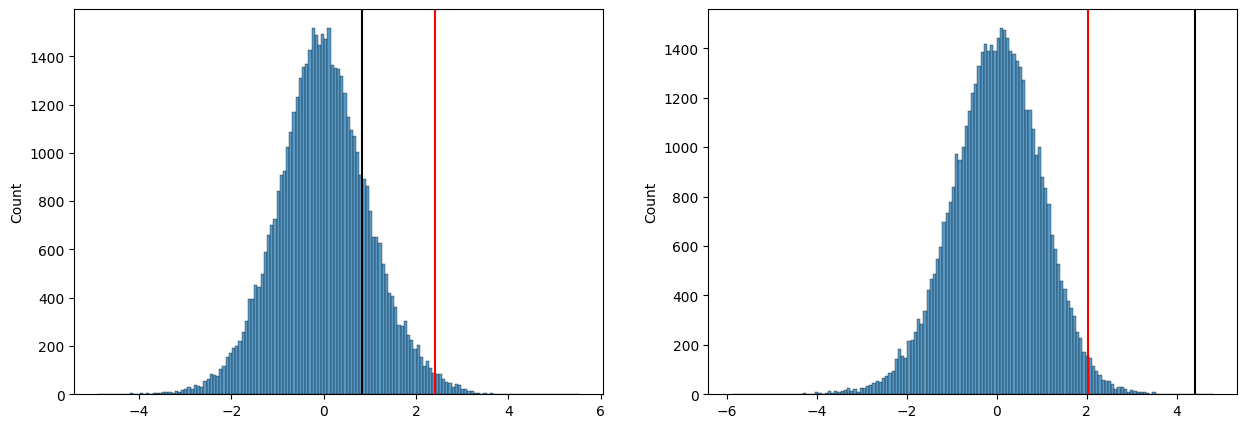

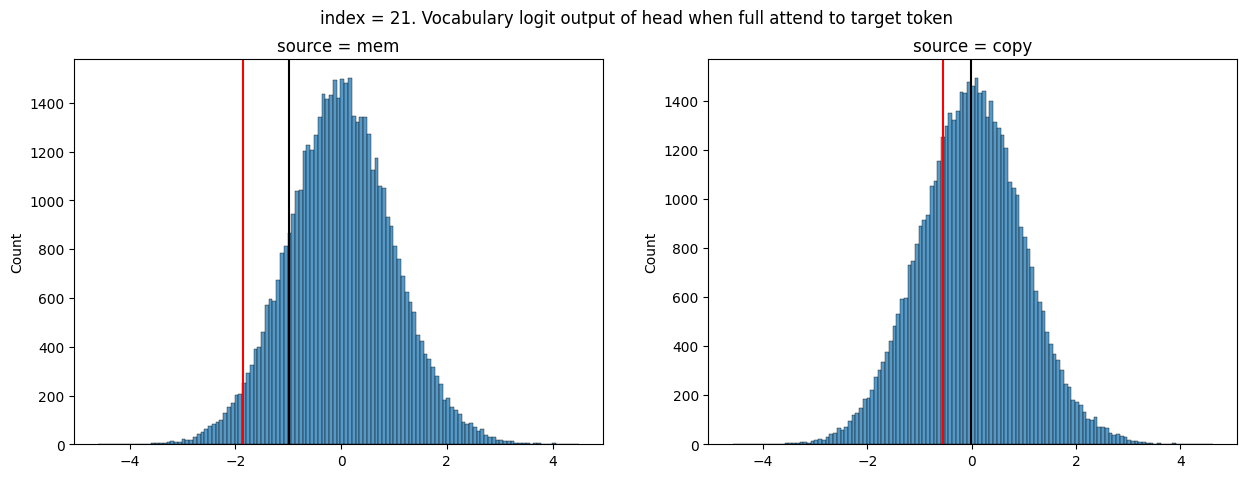

tensor(0.5575)
tensor(-0.0142)


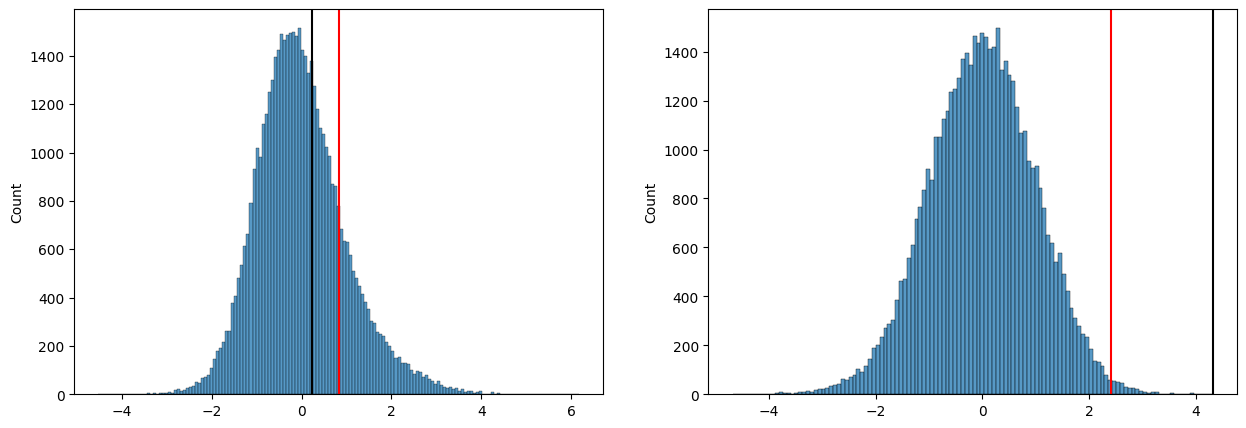

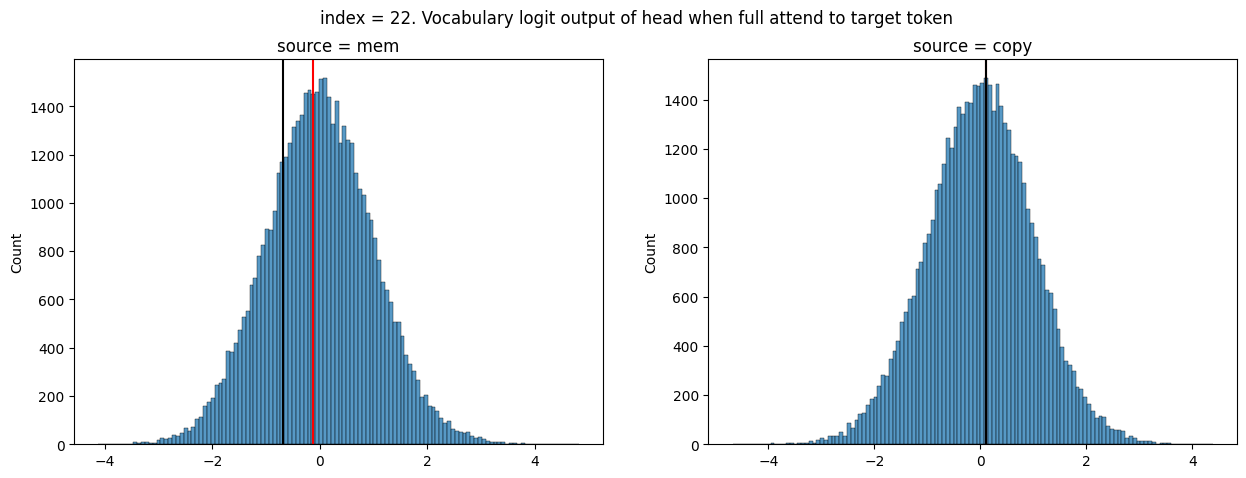

tensor(-0.7927)
tensor(-0.8683)


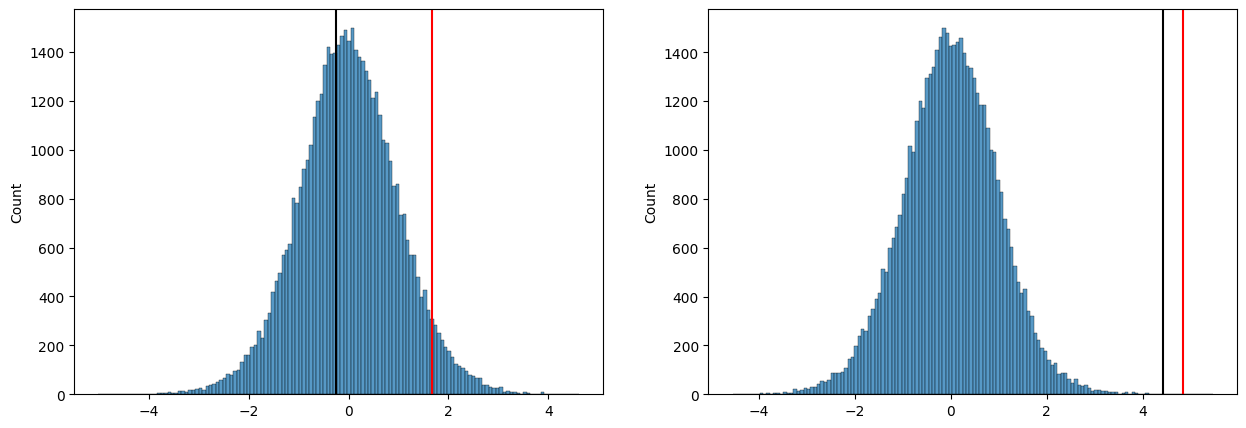

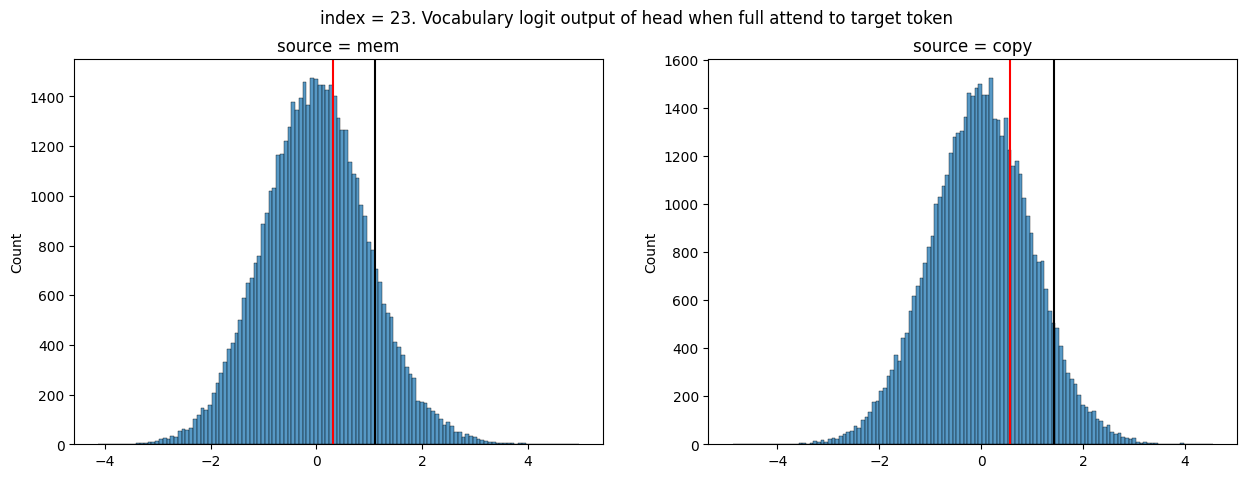

tensor(-2.7318)
tensor(-0.8782)


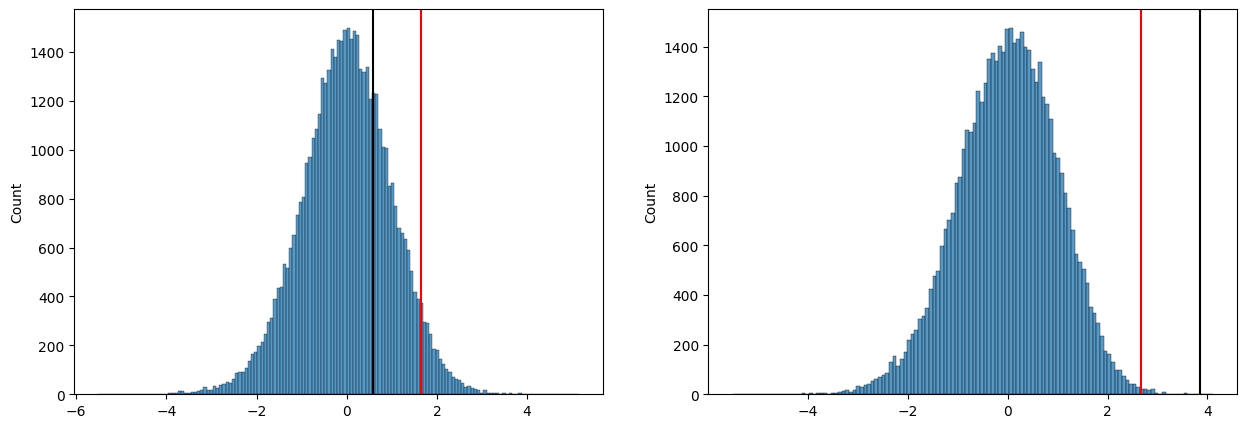

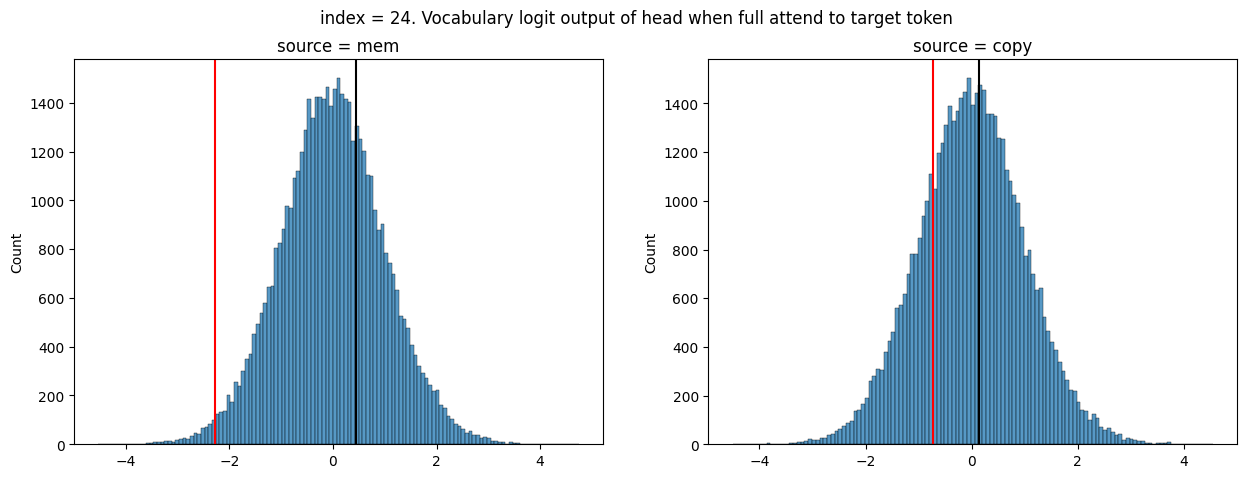

In [37]:
_, cache = model.run_with_cache(batch["corrupted_prompts"])
layer, head = 8, 5
for index in range(25):

    residual_stream = cache["resid_pre", layer] # (batch, len, d_model)
    residual_target = torch.stack([residual_stream[:,5,:], residual_stream[:,batch["obj_pos"][0],:]], dim=1)
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    distribution_mem = model.W_U.T @ residual_stream[index,5,:]
    distribution_cp = model.W_U.T @ residual_stream[index,batch["obj_pos"][0],:]
    distribution_mem = model.ln_final(distribution_mem)
    distribution_cp = model.ln_final(distribution_cp)
    sns.histplot(distribution_mem.cpu(), ax=axes[0])
    axes[0].axvline(distribution_mem[batch["target"][index][0]].cpu(), color="red")
    axes[0].axvline(distribution_mem[batch["target"][index][1]].cpu(), color="black")
    
    sns.histplot(distribution_cp.cpu(), ax=axes[1])
    axes[1].axvline(distribution_cp[batch["target"][index][0]].cpu(), color="red")
    axes[1].axvline(distribution_cp[batch["target"][index][1]].cpu(), color="black")
    
    
    out = pattern.get_ov_interaction(layer,head, batch, mlp=True, residual_stream=residual_target, return_full_output=True).cpu()
    # diff = pattern.get_ov_interaction(4,5, batch, mlp=True, residual_stream=residual_target, return_full_output=False, return_difference=True).squeeze()
    
    
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    sns.histplot(out[index,source,:], ax=axes[0])
    axes[0].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[0].axvline(out[index,source,batch["target"][index][1]], color="black")
    # axes[0].axvline(base_distribution[model.to_tokens(batch["corrupted_prompts"])[index,5]].cpu(), color="green") 
    axes[0].set_title("source = mem")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    

    source = 1
    sns.histplot(out[index,source,:], ax=axes[1])
    axes[1].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[1].axvline(out[index,source,batch["target"][index][1]], color="black")
    axes[1].set_title("source = copy")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    fig.suptitle(f"index = {index}. Vocabulary logit output of head when full attend to target token")
    plt.show()

tensor(0.9274)
tensor(0.9828)


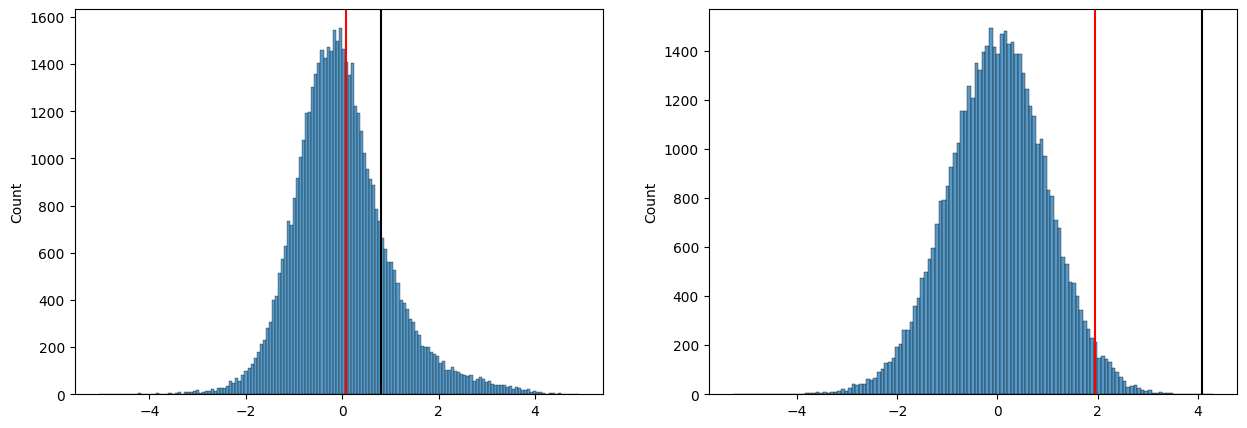

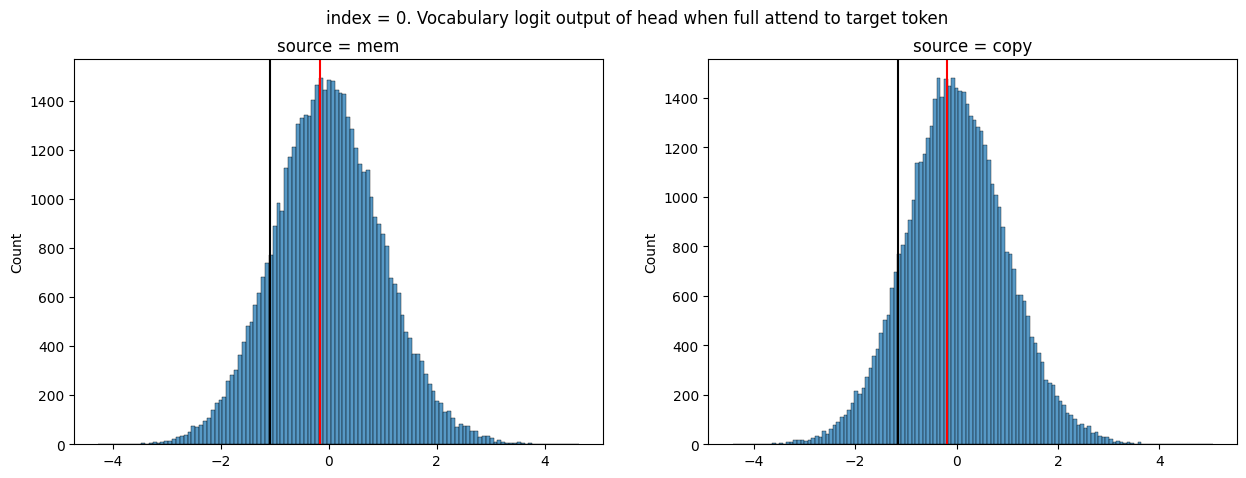

tensor(0.2022)
tensor(-0.4290)


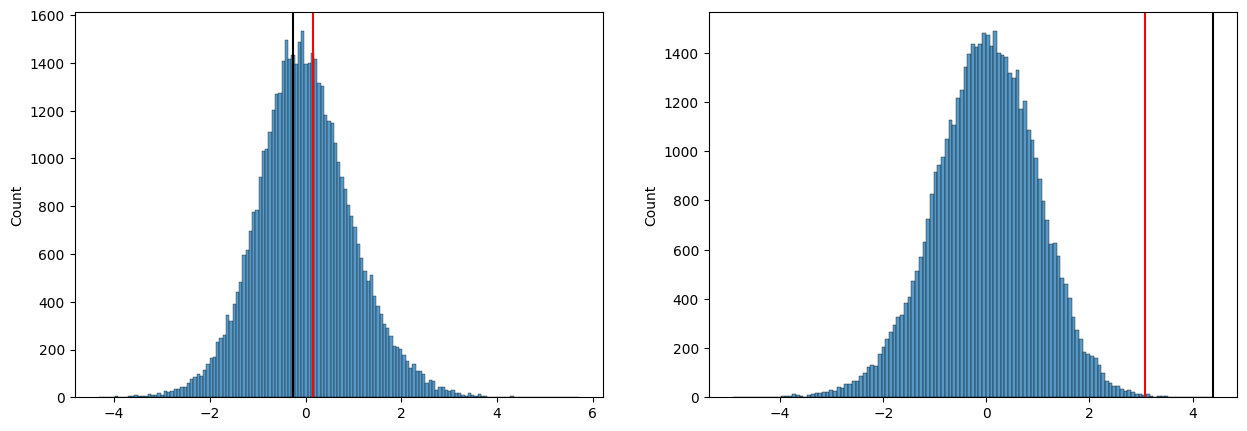

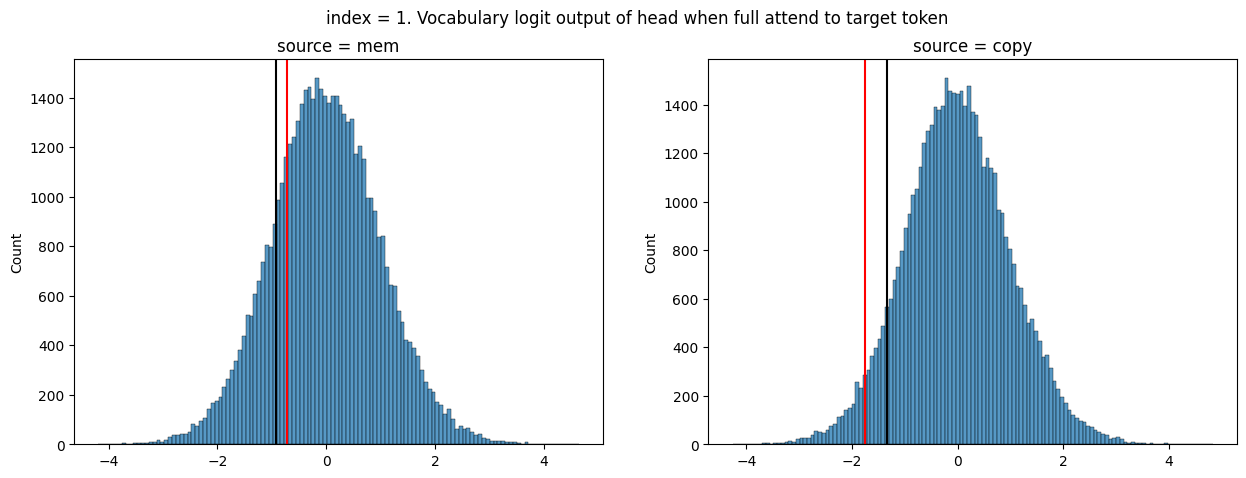

tensor(0.4504)
tensor(0.9324)


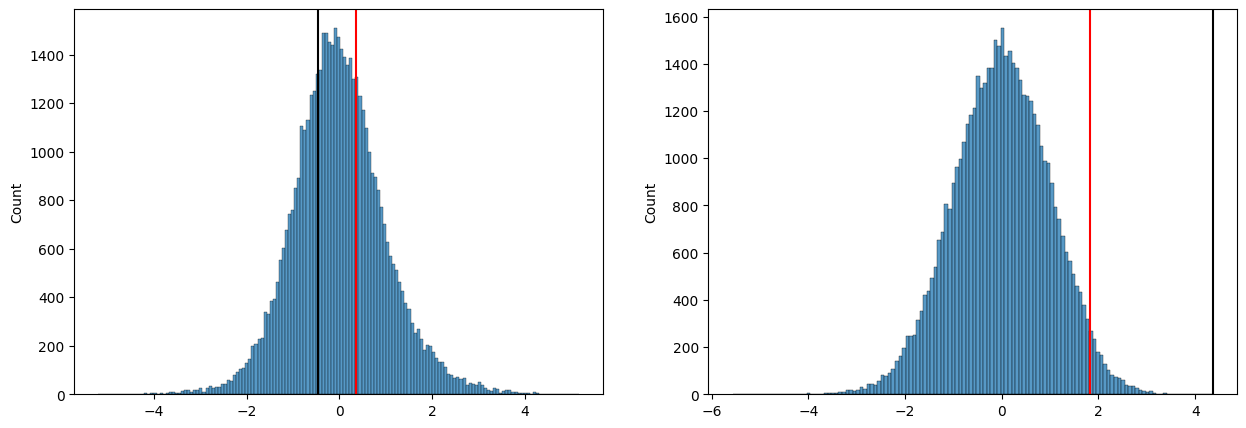

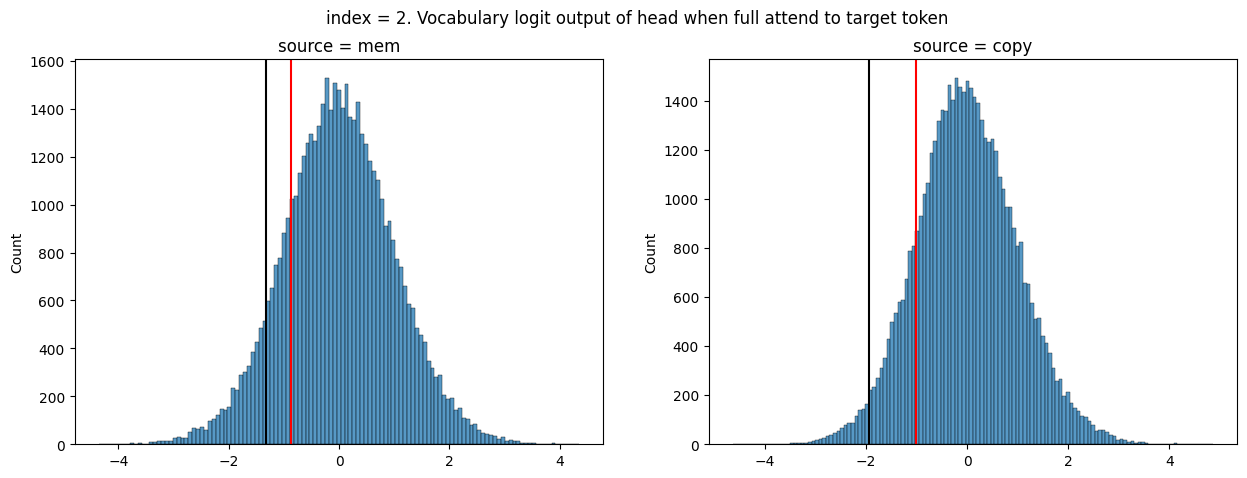

tensor(-0.0645)
tensor(-0.7304)


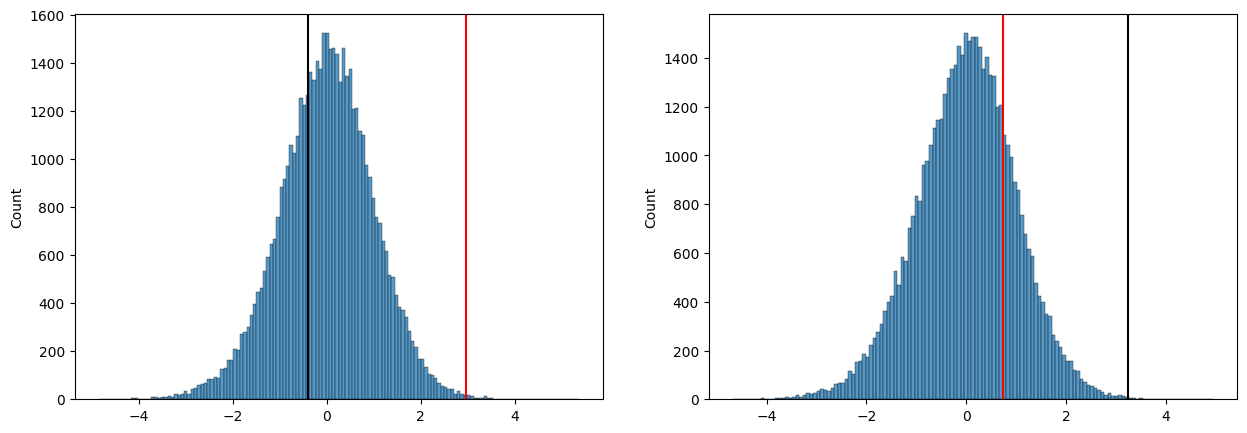

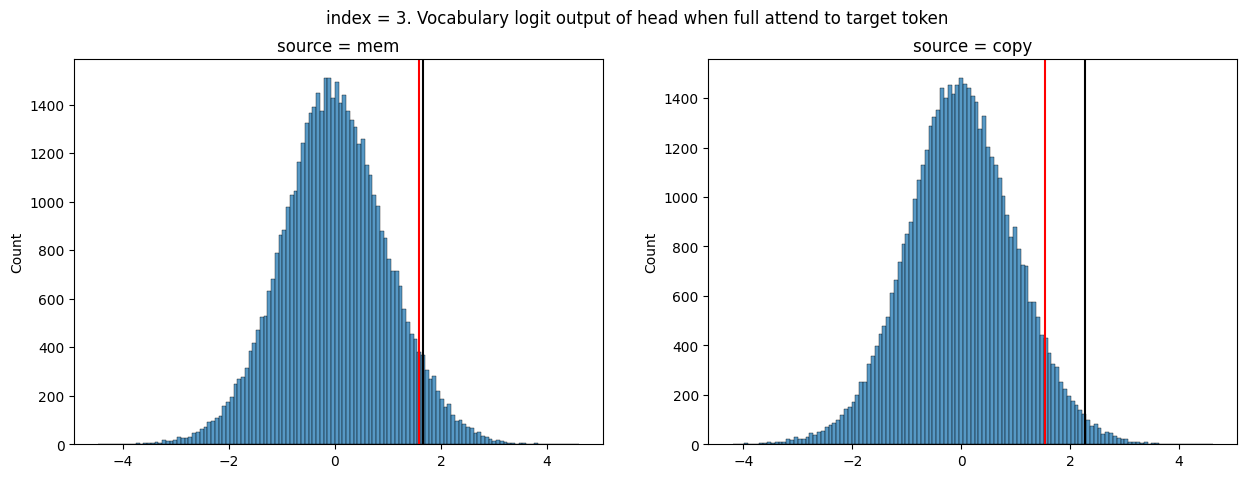

tensor(-0.9453)
tensor(-1.5800)


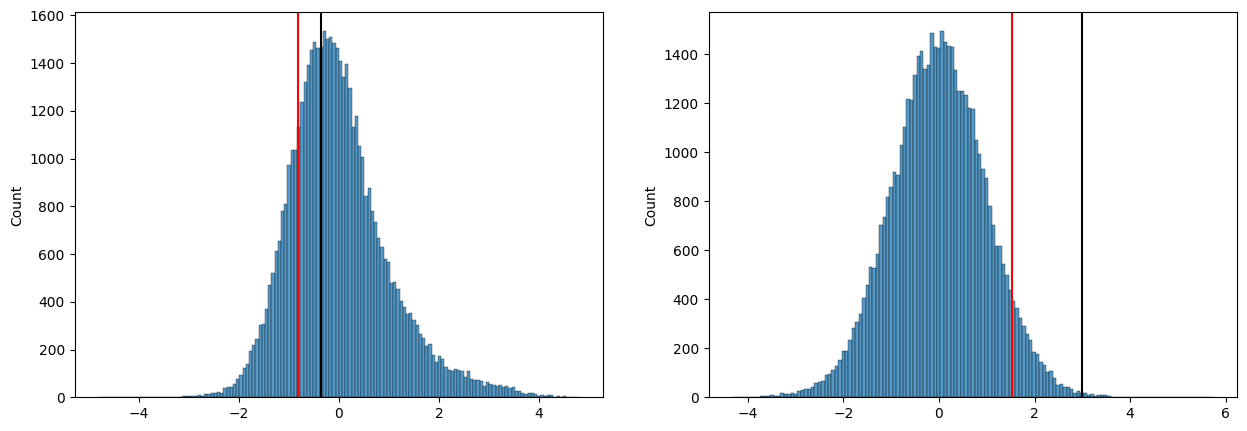

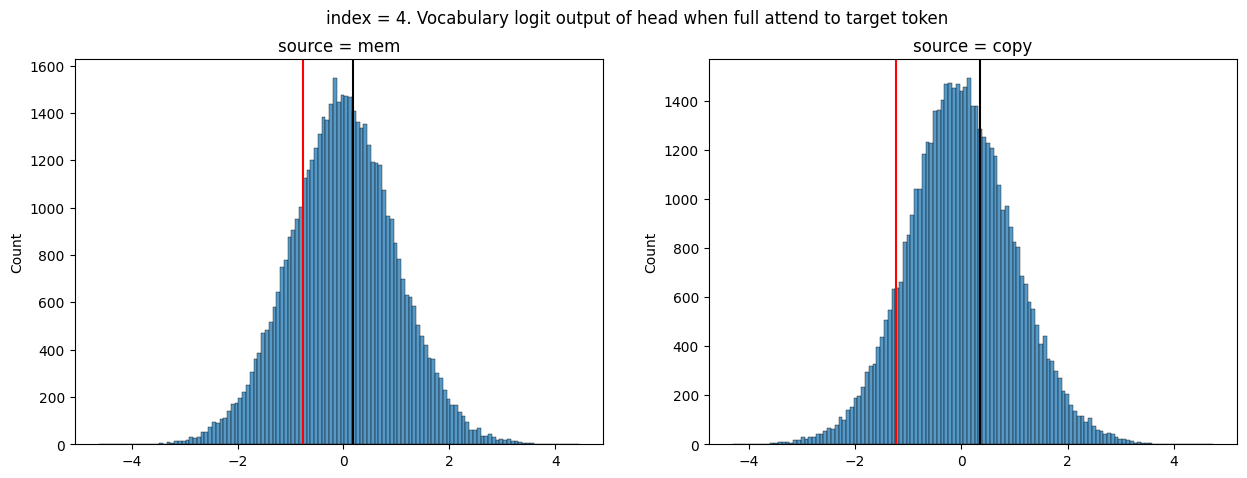

tensor(0.3275)
tensor(1.2563)


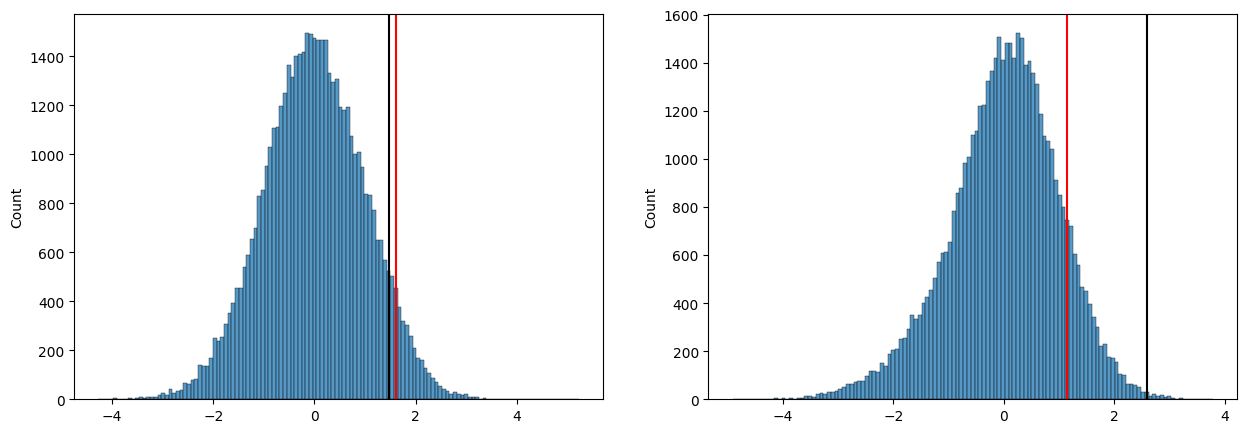

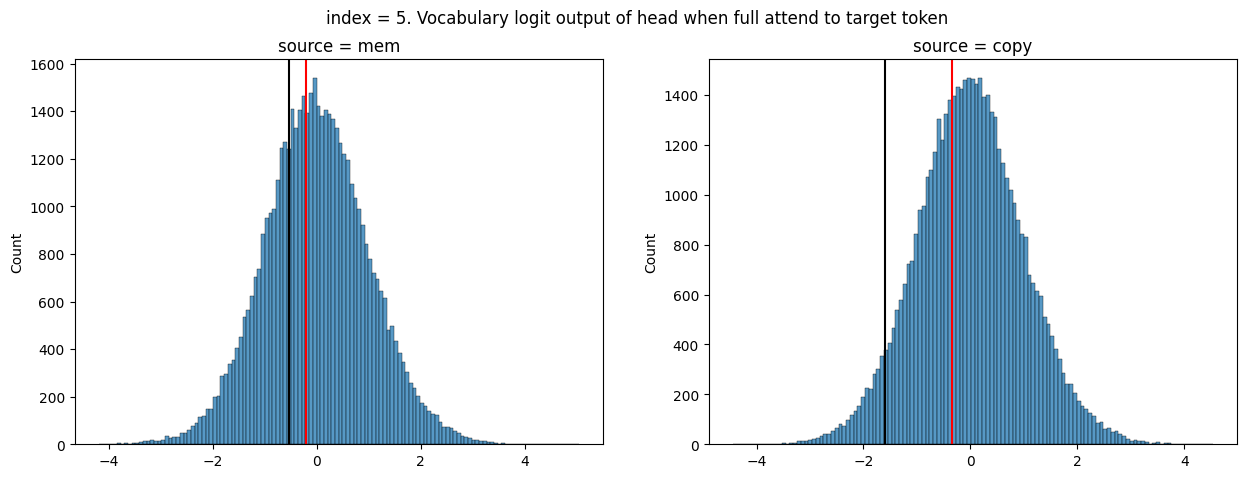

tensor(0.6281)
tensor(0.1885)


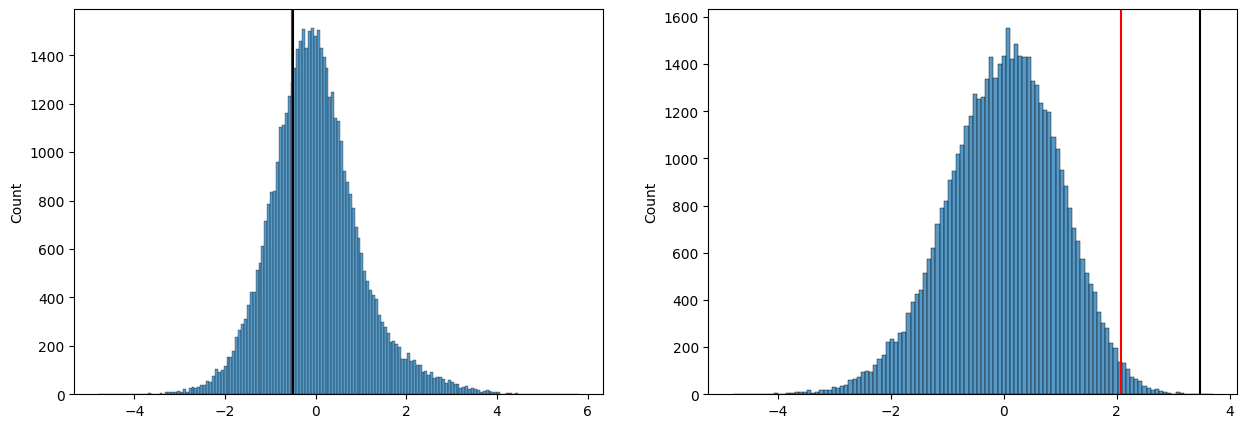

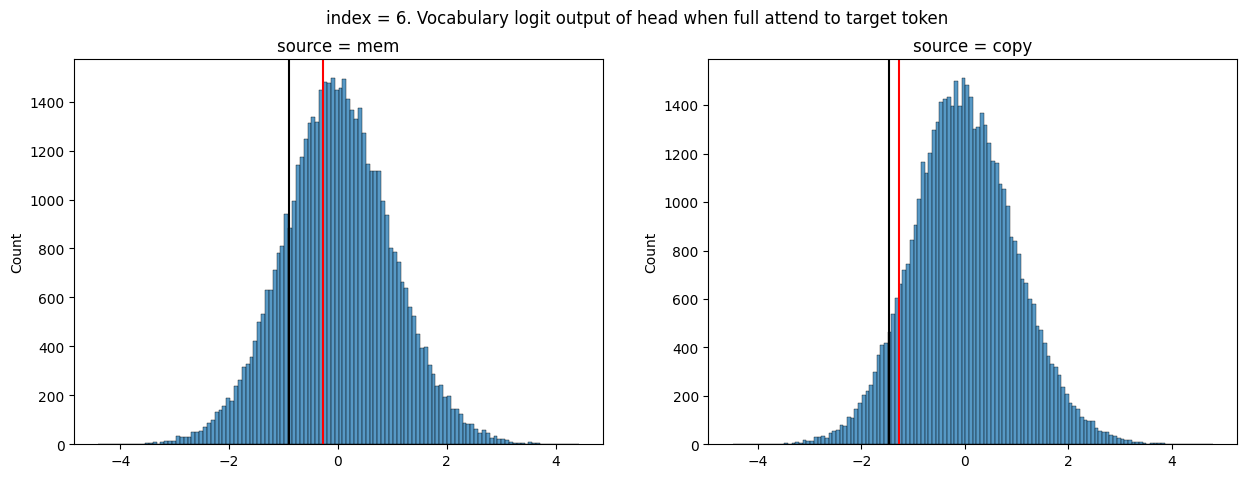

tensor(1.2025)
tensor(0.6432)


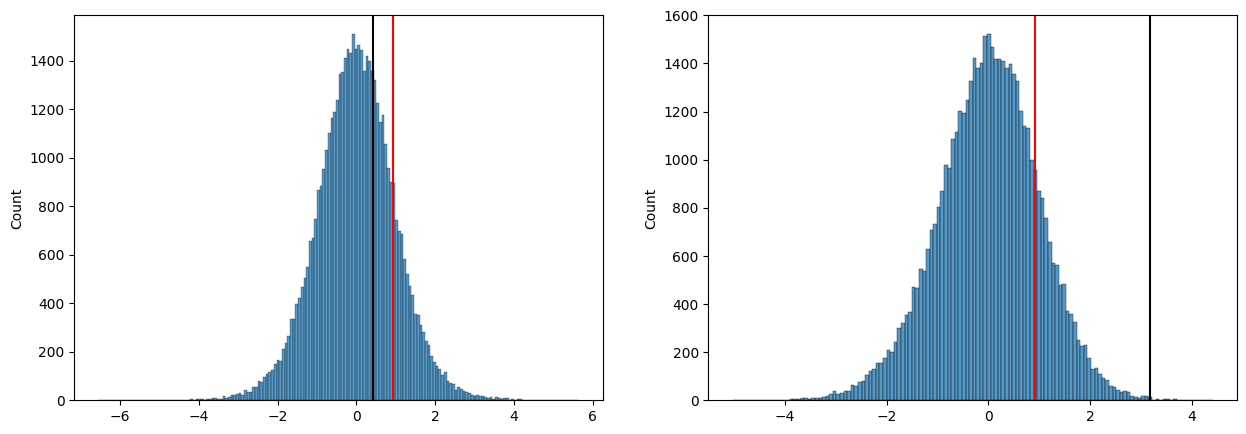

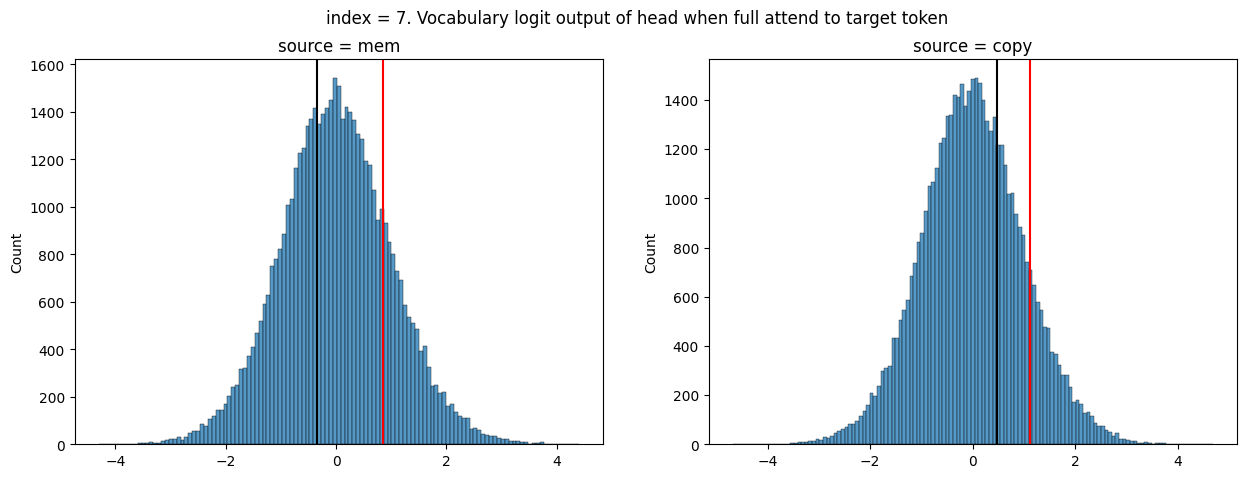

tensor(0.3809)
tensor(-0.1742)


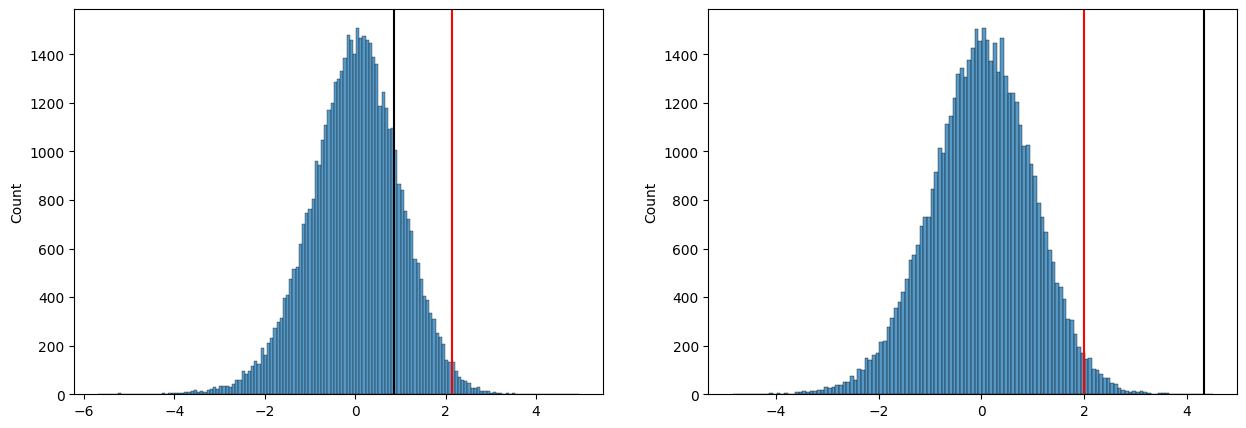

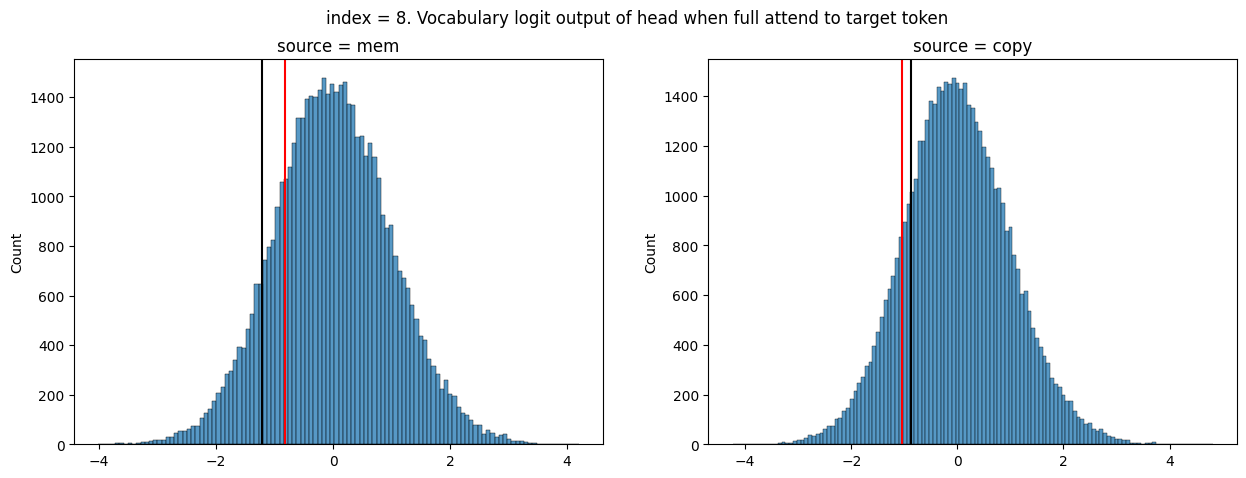

tensor(0.7330)
tensor(0.8261)


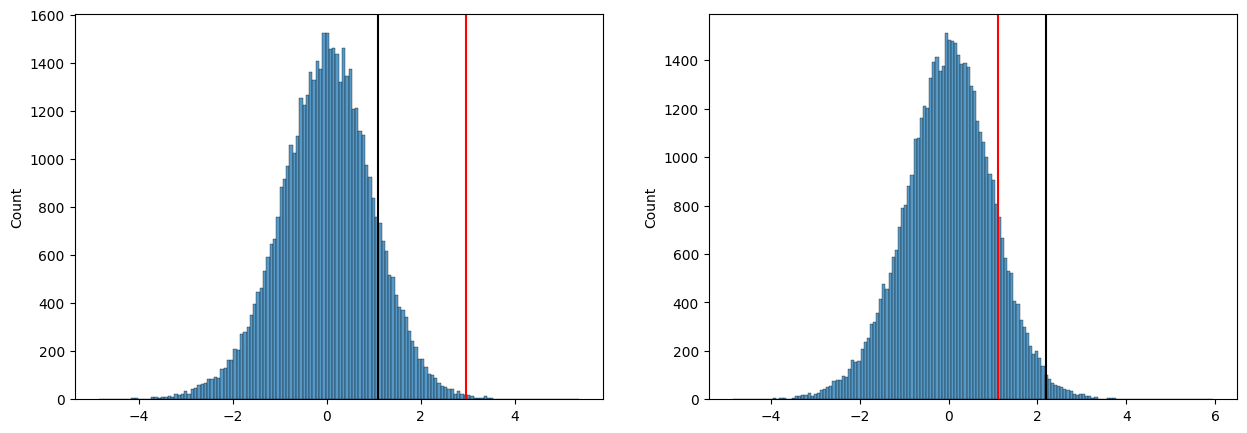

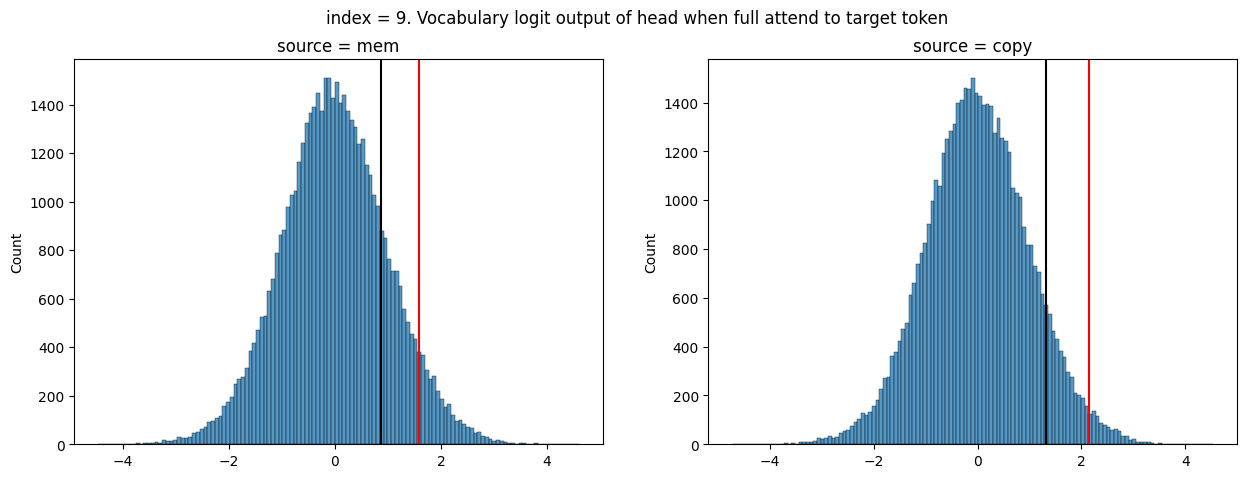

tensor(-0.1144)
tensor(-0.7552)


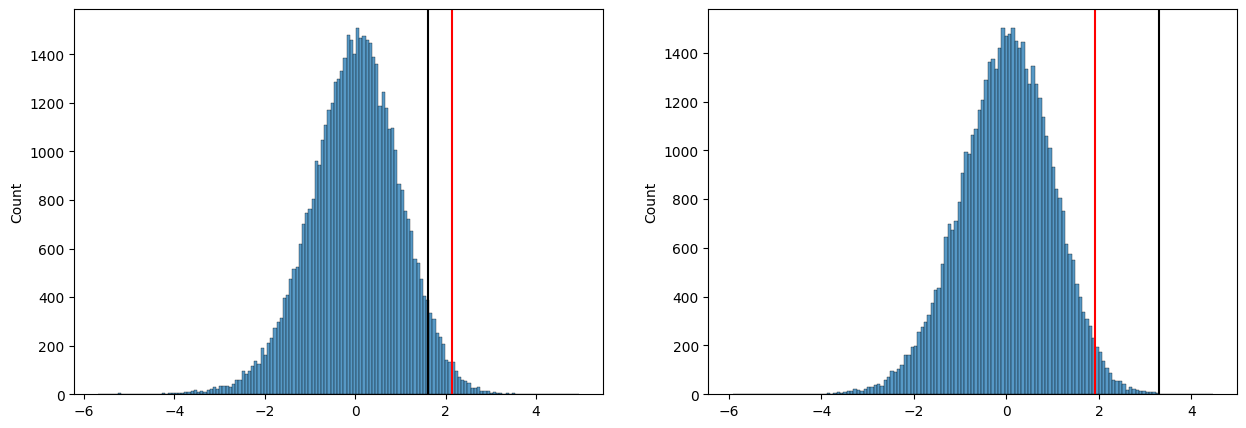

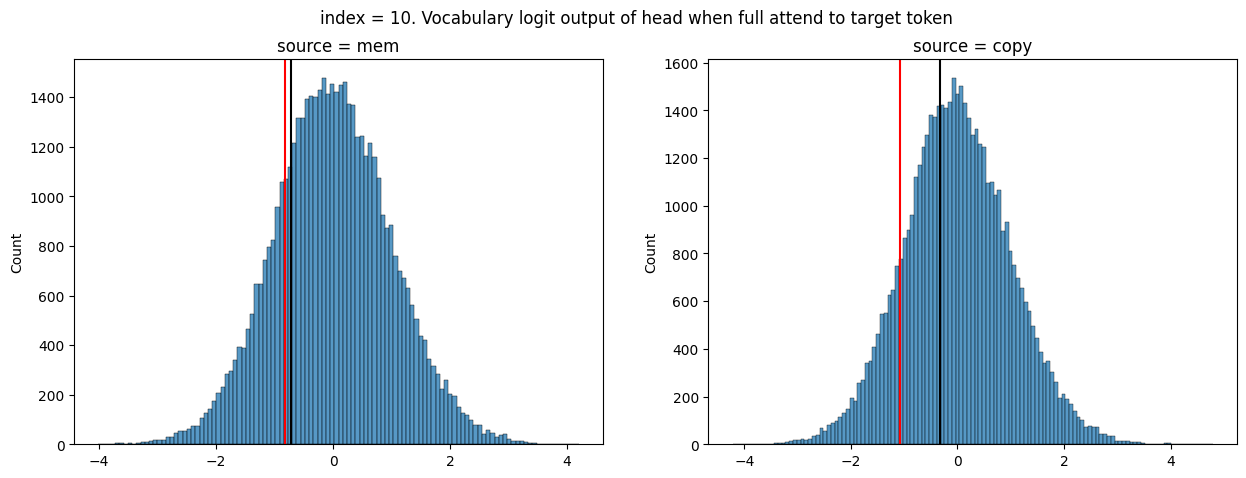

tensor(1.1833)
tensor(1.0994)


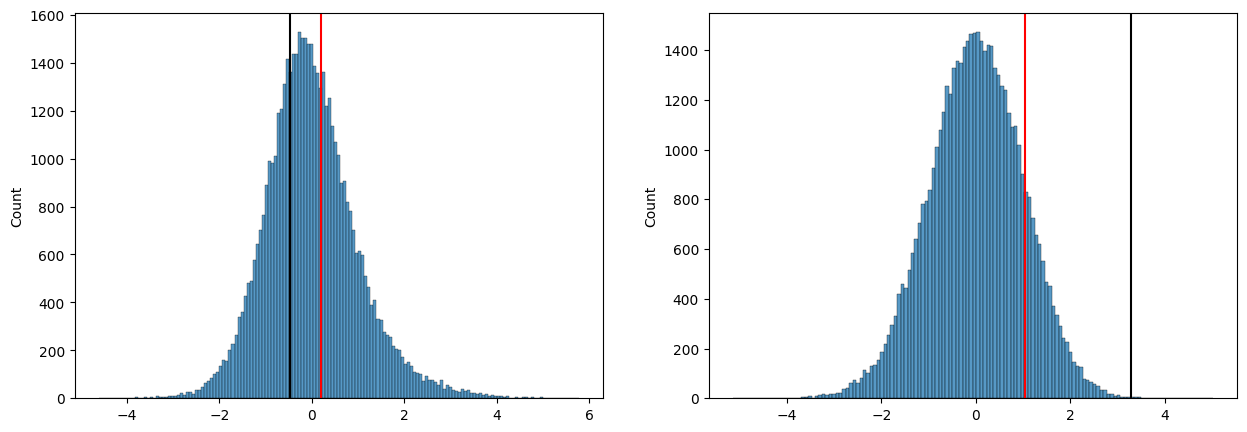

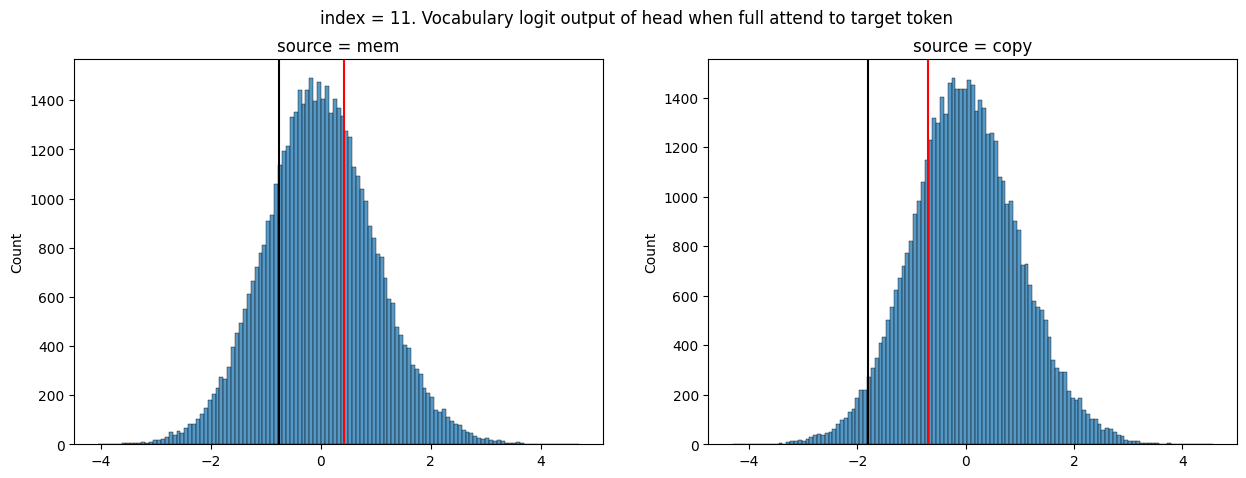

tensor(0.5910)
tensor(0.8875)


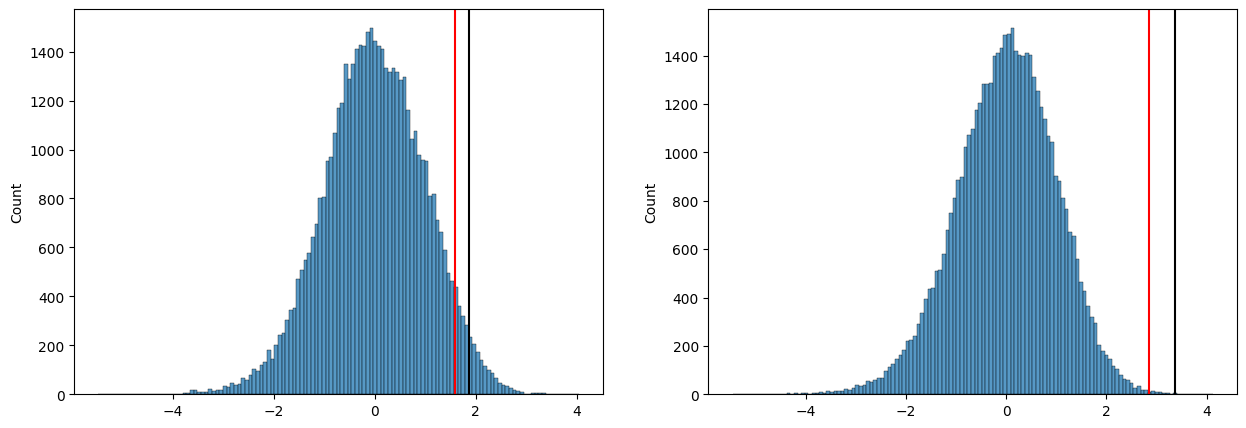

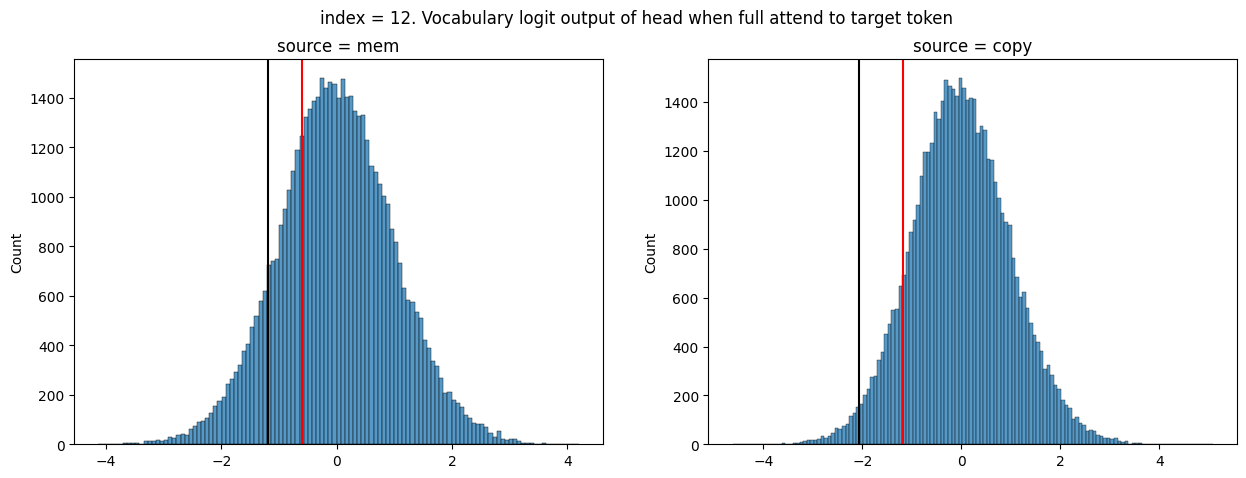

tensor(0.0759)
tensor(0.0025)


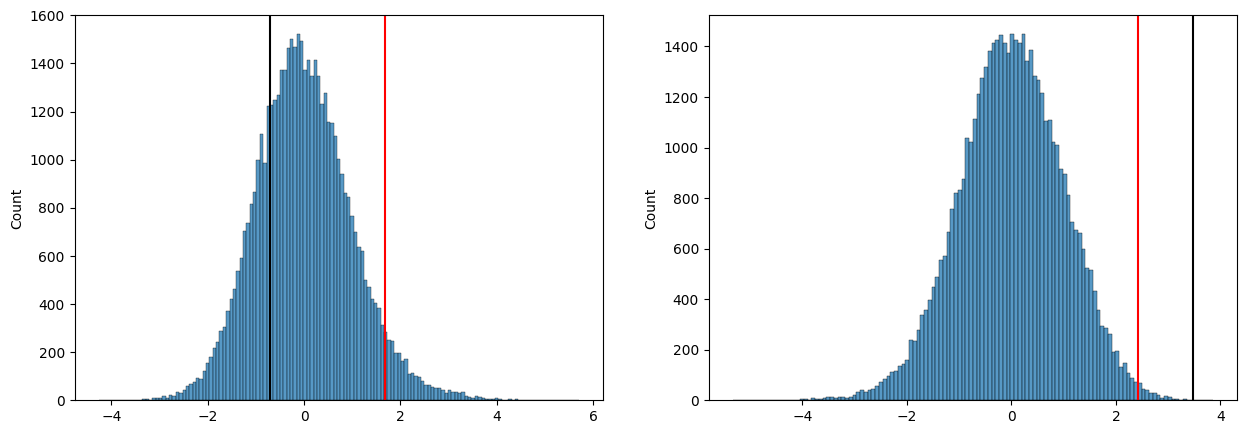

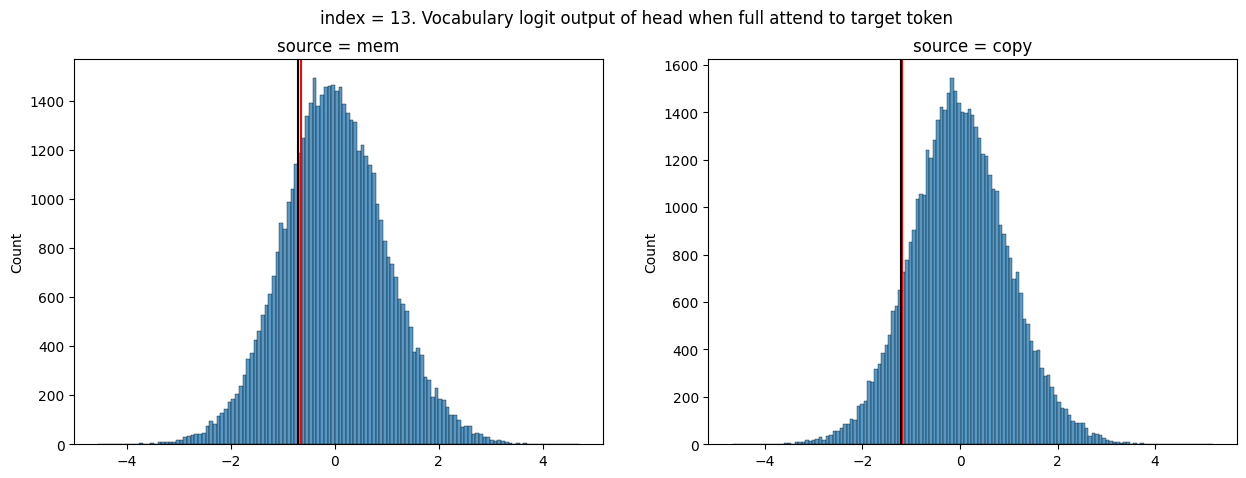

tensor(-1.7985)
tensor(-1.4972)


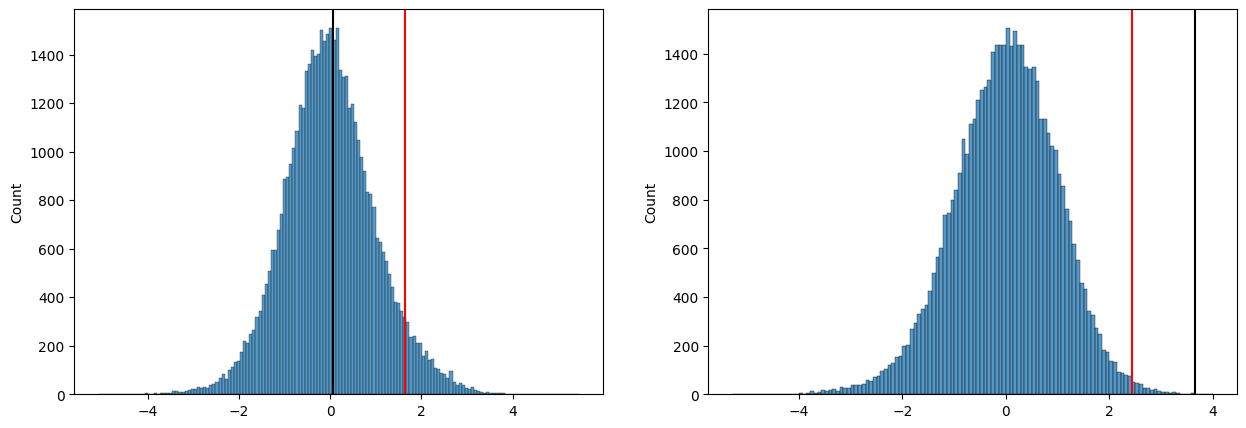

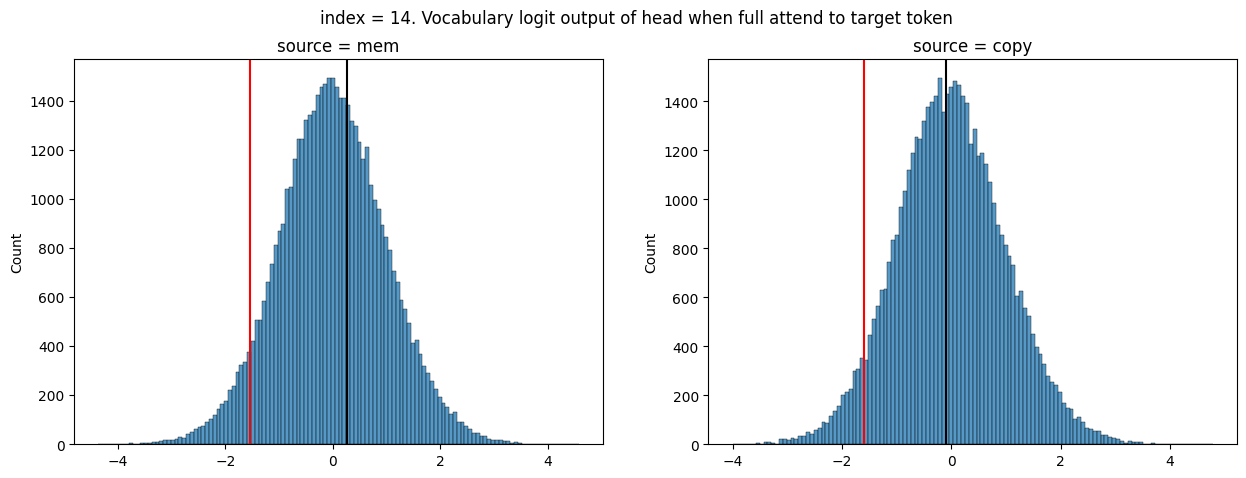

tensor(0.5867)
tensor(0.1096)


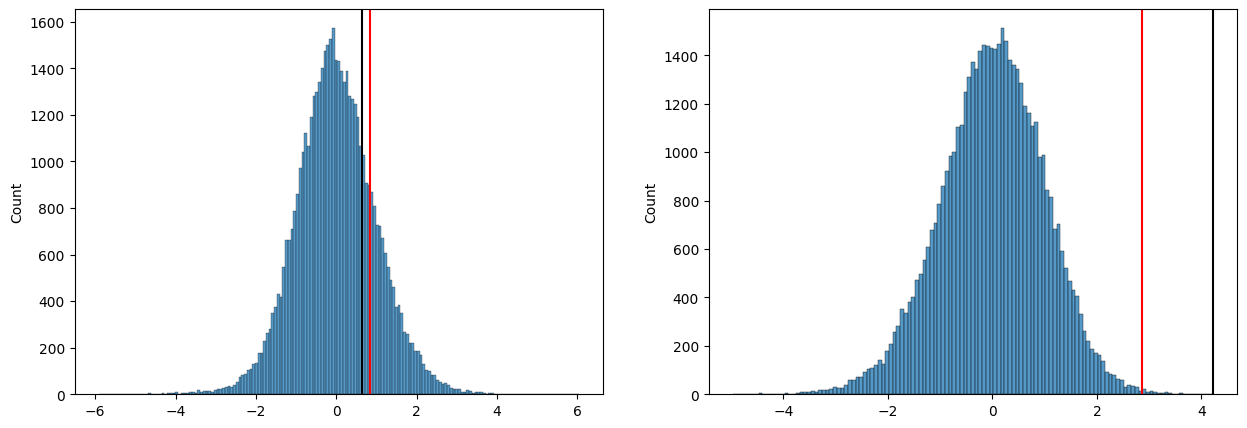

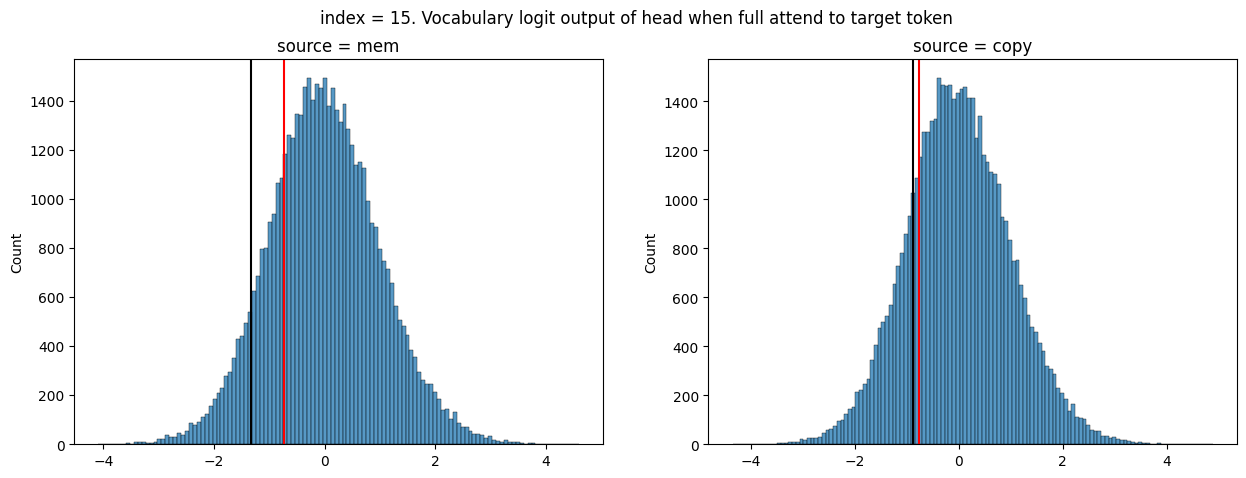

tensor(0.8745)
tensor(0.4536)


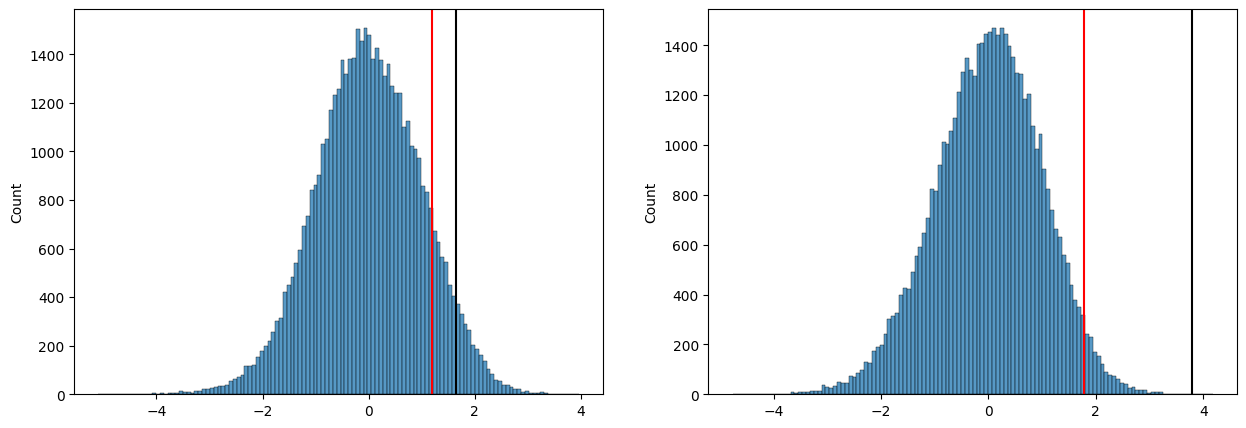

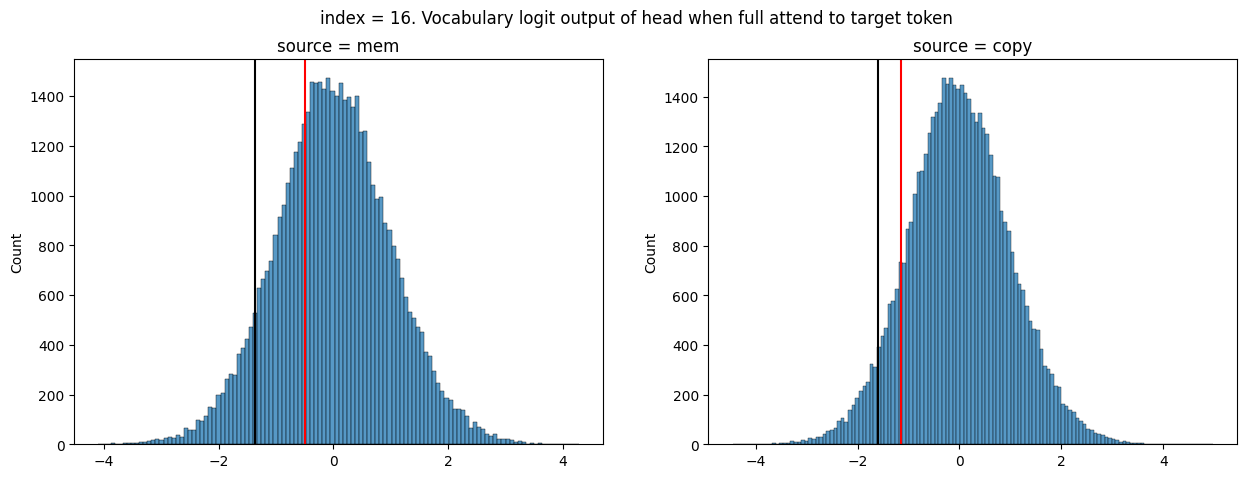

tensor(-0.2369)
tensor(-0.4383)


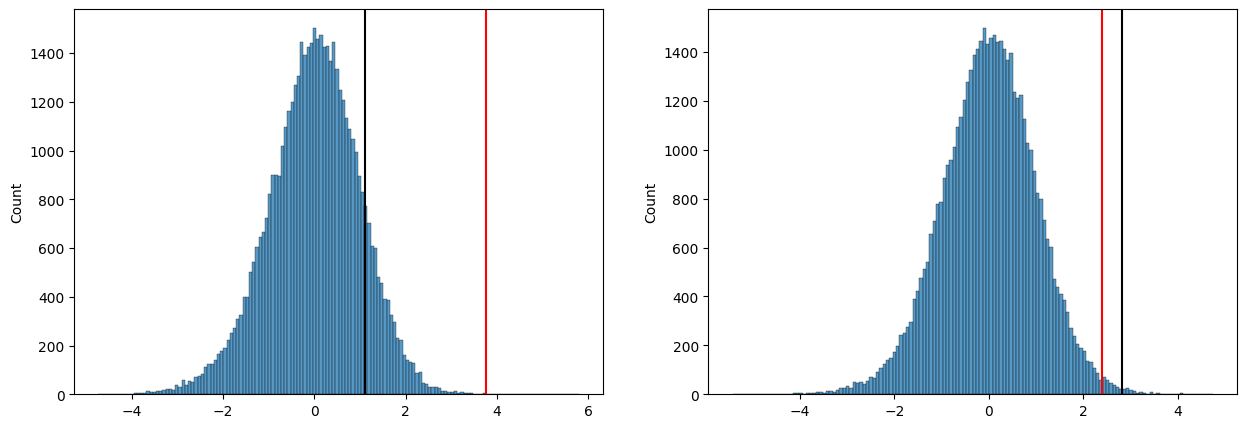

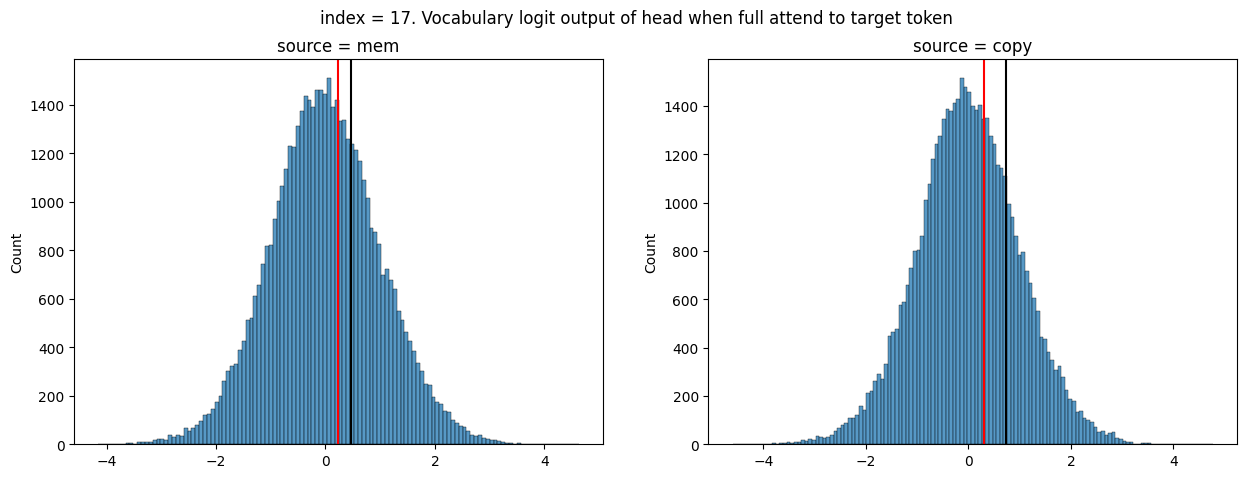

tensor(0.8087)
tensor(0.3714)


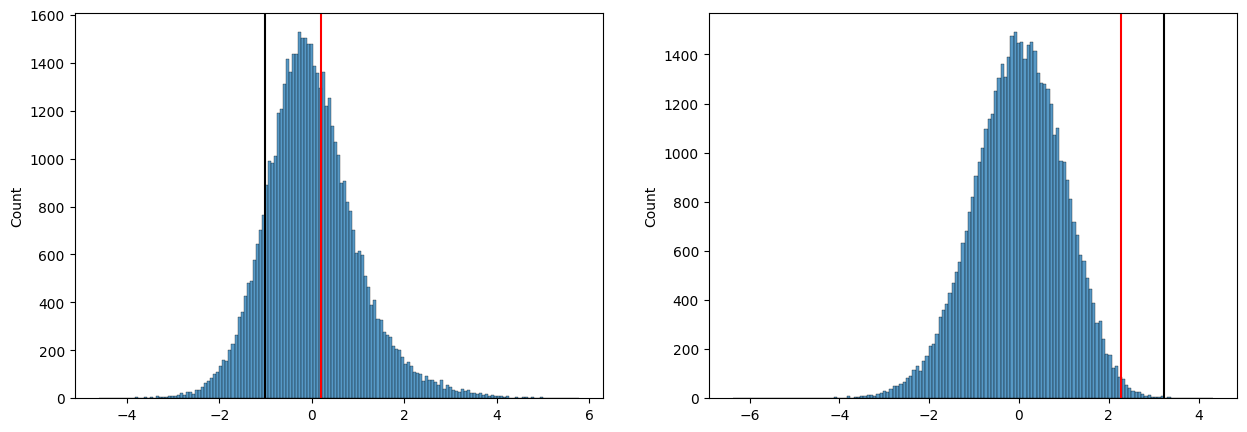

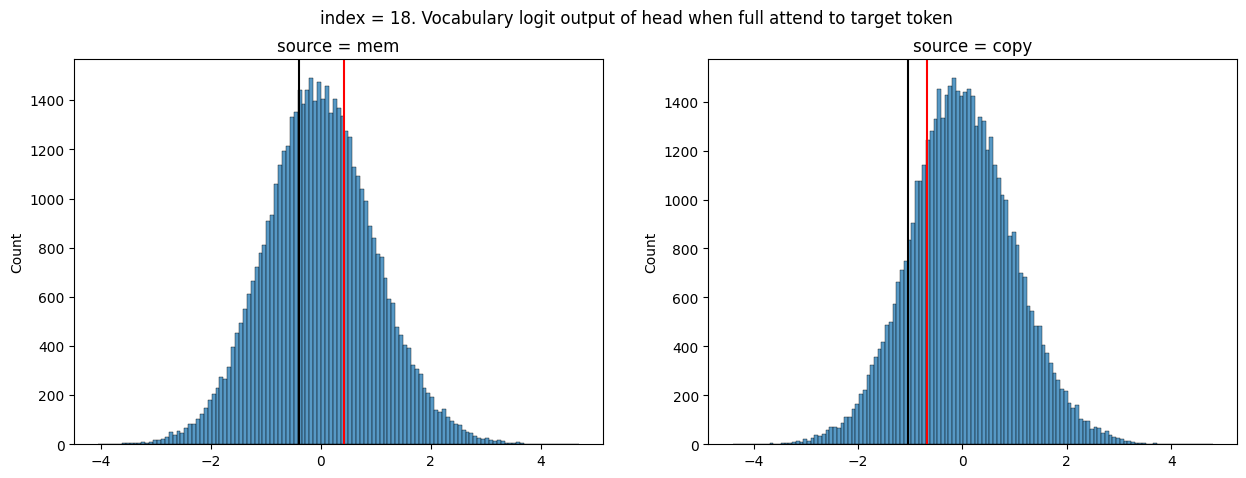

tensor(0.2014)
tensor(0.4604)


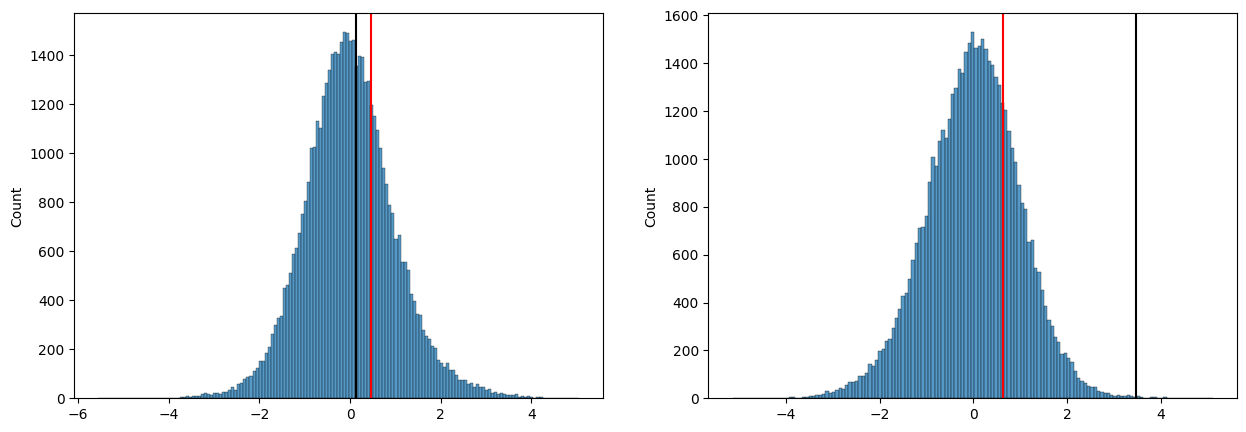

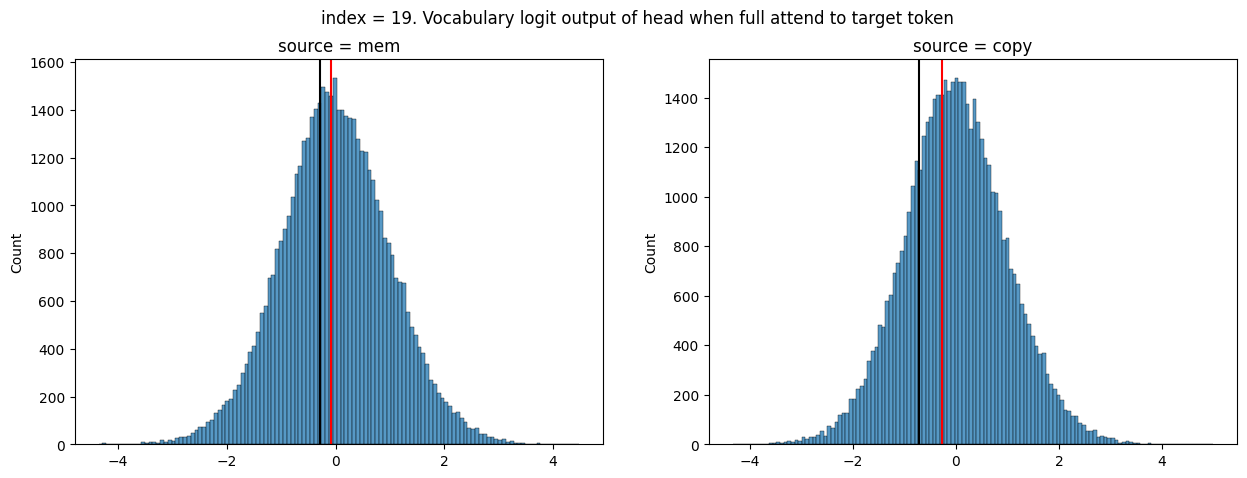

tensor(1.0588)
tensor(1.2680)


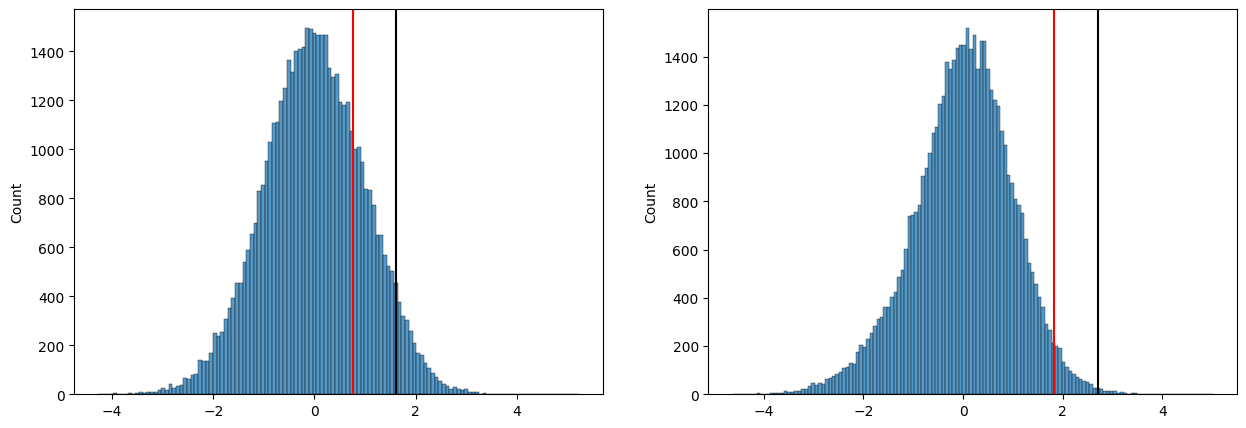

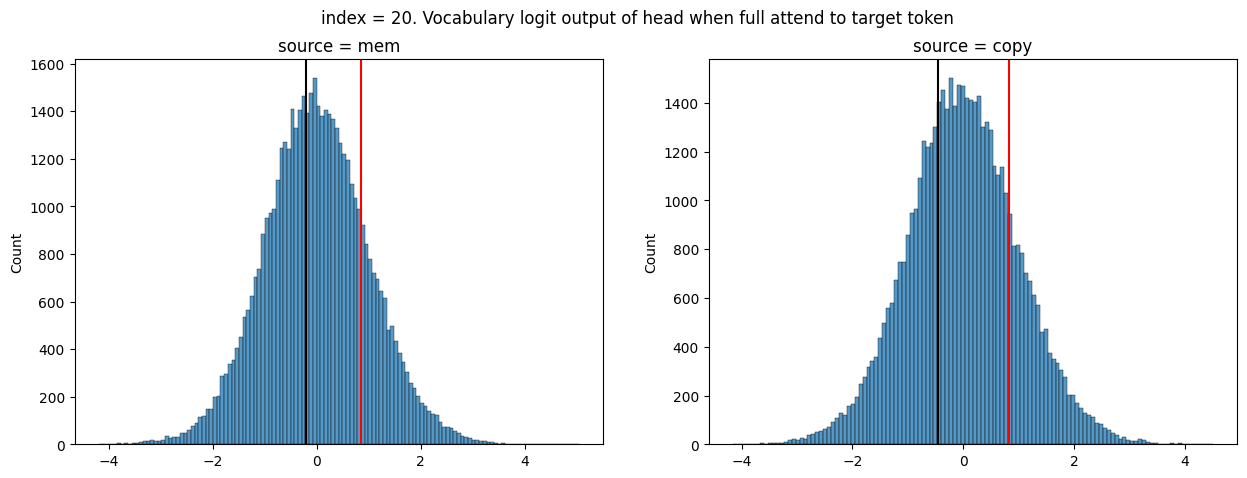

tensor(0.4140)
tensor(-0.0153)


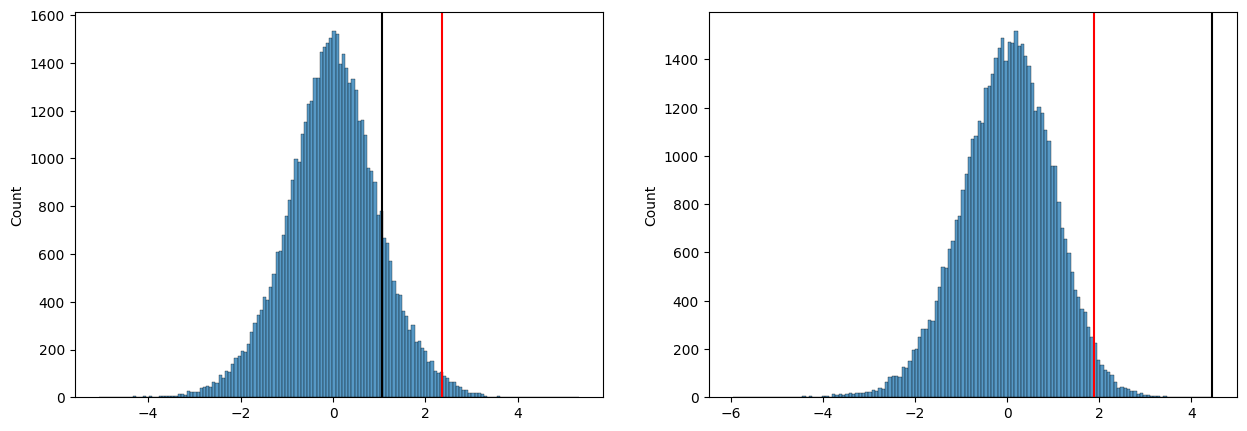

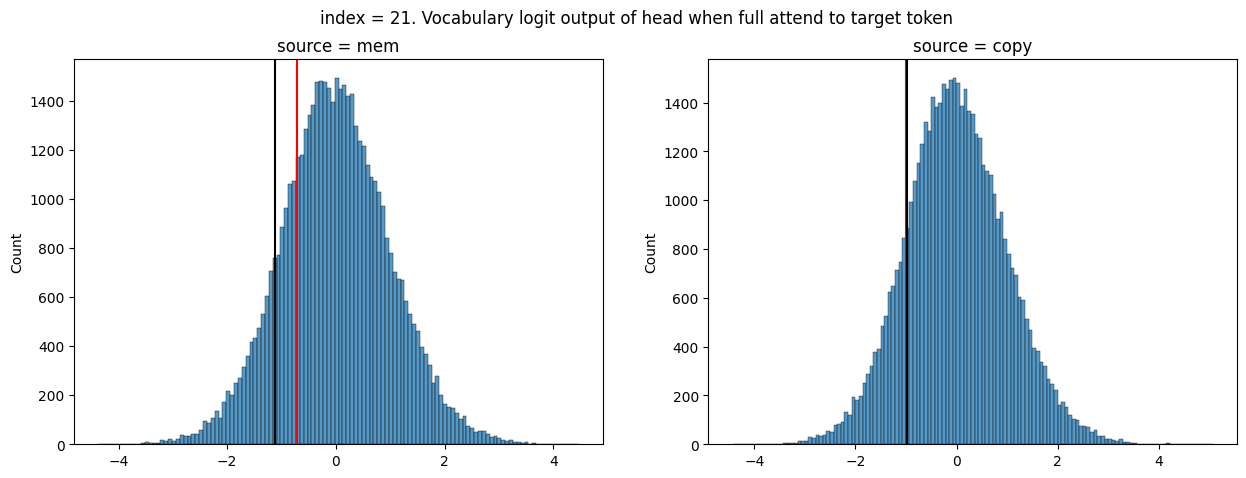

tensor(-1.5915)
tensor(-1.8930)


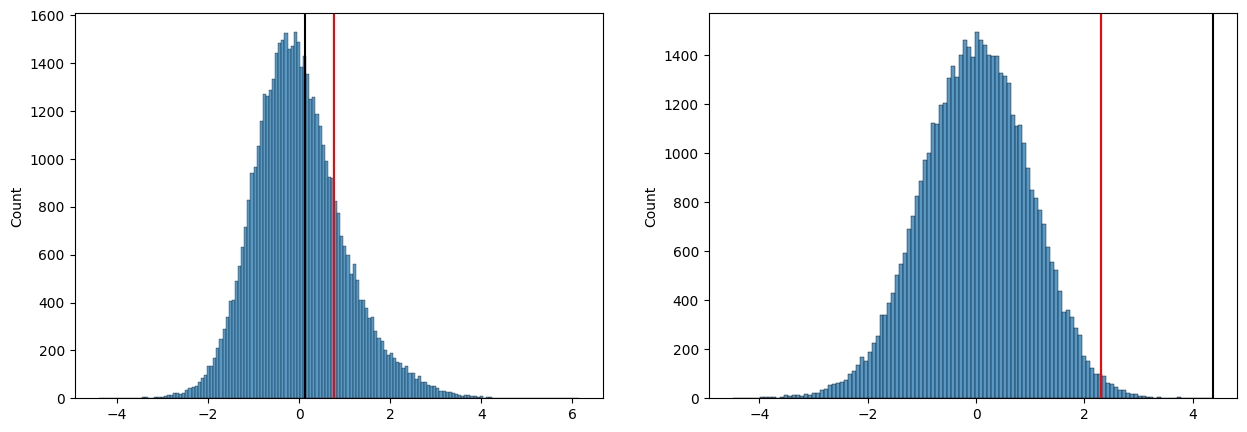

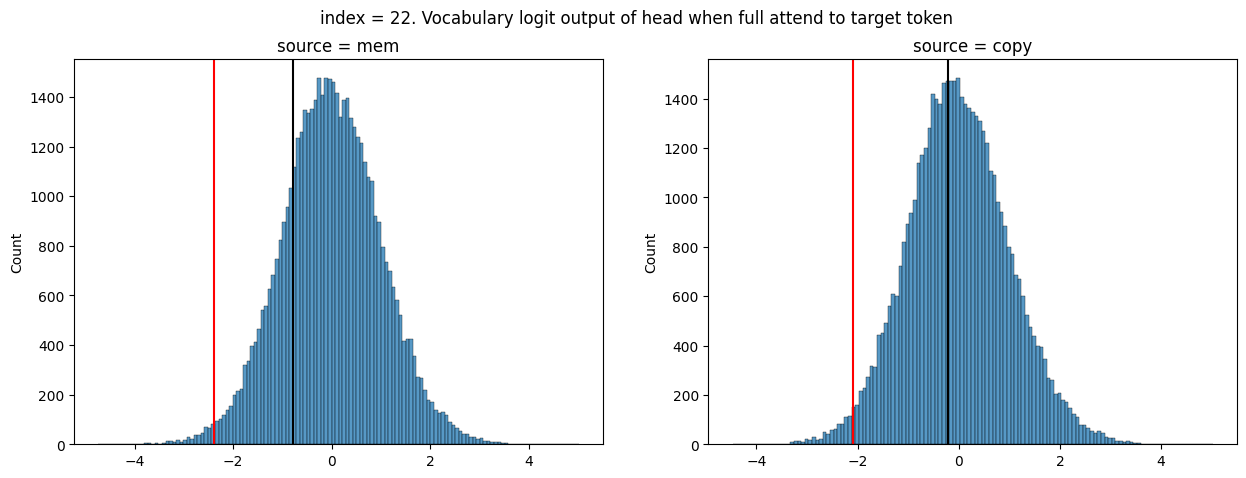

tensor(-2.0028)
tensor(-1.4924)


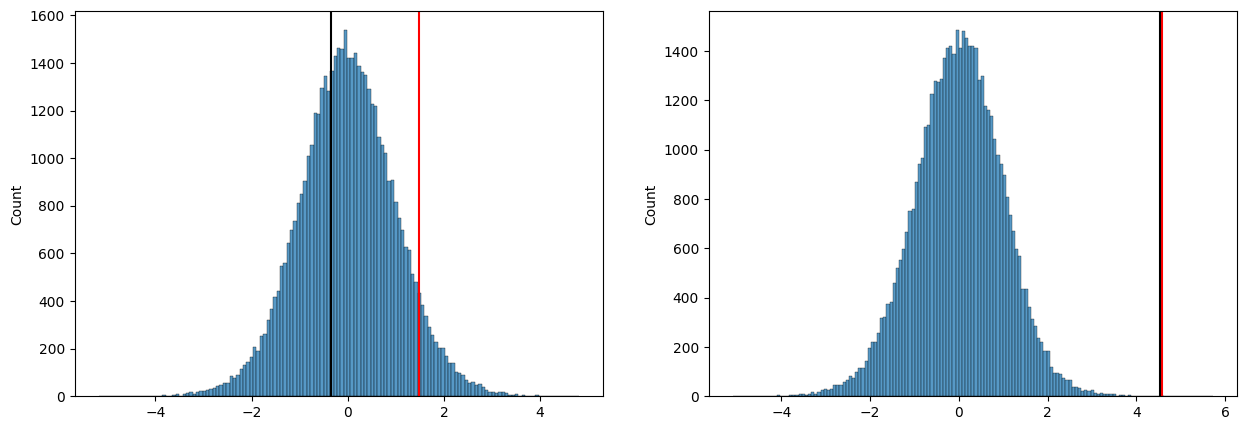

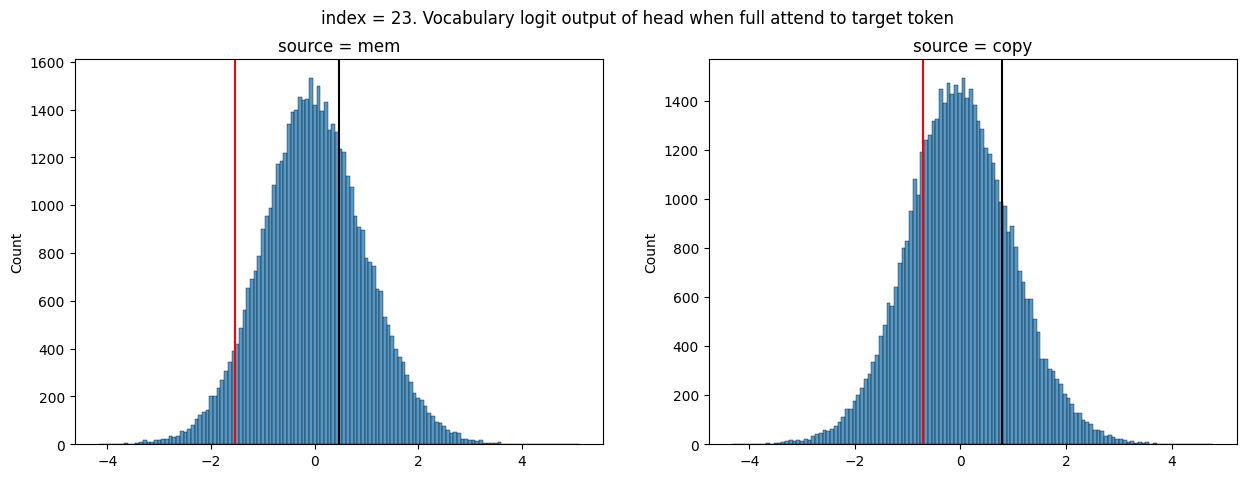

tensor(-0.1053)
tensor(0.1295)


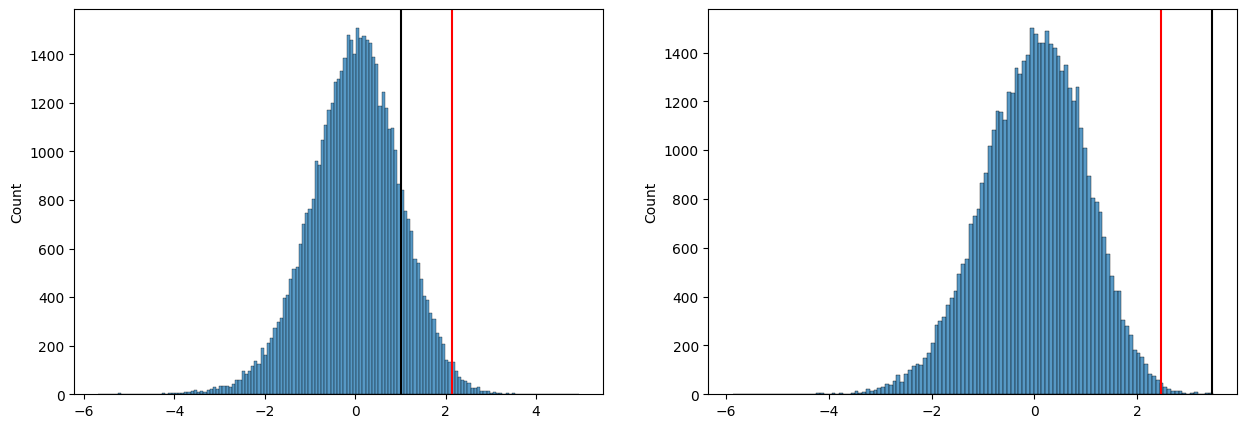

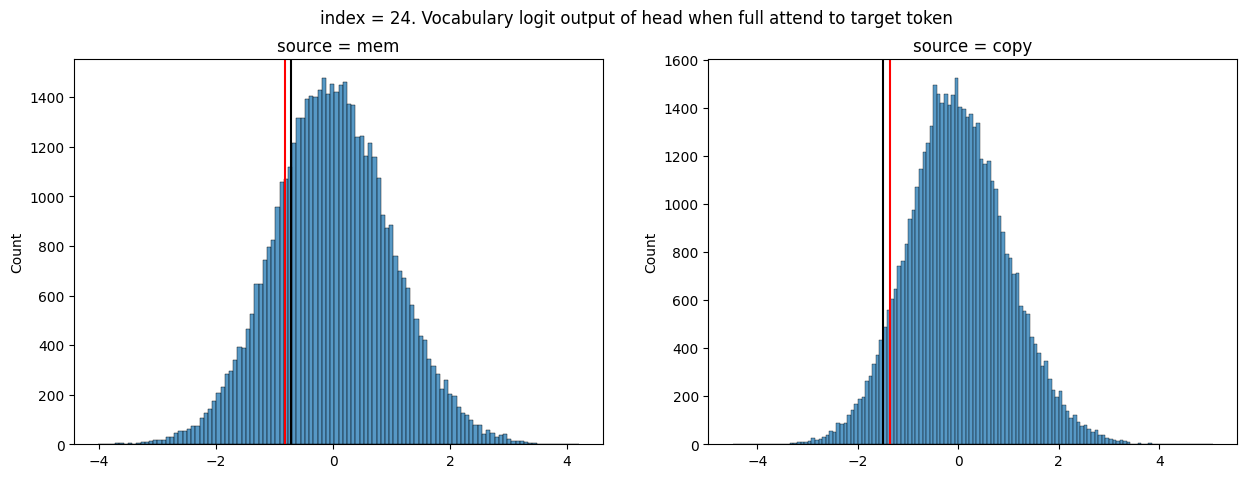

In [39]:
_, cache = model.run_with_cache(batch["corrupted_prompts"])
layer, head = 7, 5
for index in range(25):

    residual_stream = cache["resid_pre", layer] # (batch, len, d_model)
    residual_target = torch.stack([residual_stream[:,5,:], residual_stream[:,batch["obj_pos"][0],:]], dim=1)
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    distribution_mem = model.W_U.T @ residual_stream[index,5,:]
    distribution_cp = model.W_U.T @ residual_stream[index,batch["obj_pos"][0],:]
    distribution_mem = model.ln_final(distribution_mem)
    distribution_cp = model.ln_final(distribution_cp)
    sns.histplot(distribution_mem.cpu(), ax=axes[0])
    axes[0].axvline(distribution_mem[batch["target"][index][0]].cpu(), color="red")
    axes[0].axvline(distribution_mem[batch["target"][index][1]].cpu(), color="black")
    
    sns.histplot(distribution_cp.cpu(), ax=axes[1])
    axes[1].axvline(distribution_cp[batch["target"][index][0]].cpu(), color="red")
    axes[1].axvline(distribution_cp[batch["target"][index][1]].cpu(), color="black")
    
    
    out = pattern.get_ov_interaction(layer,head, batch, mlp=True, residual_stream=residual_target, return_full_output=True).cpu()
    # diff = pattern.get_ov_interaction(4,5, batch, mlp=True, residual_stream=residual_target, return_full_output=False, return_difference=True).squeeze()
    
    
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    sns.histplot(out[index,source,:], ax=axes[0])
    axes[0].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[0].axvline(out[index,source,batch["target"][index][1]], color="black")
    # axes[0].axvline(base_distribution[model.to_tokens(batch["corrupted_prompts"])[index,5]].cpu(), color="green") 
    axes[0].set_title("source = mem")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    

    source = 1
    sns.histplot(out[index,source,:], ax=axes[1])
    axes[1].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[1].axvline(out[index,source,batch["target"][index][1]], color="black")
    axes[1].set_title("source = copy")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    fig.suptitle(f"index = {index}. Vocabulary logit output of head when full attend to target token")
    plt.show()

In [30]:
model.blocks[8].attn.W_O.shape

torch.Size([12, 64, 768])

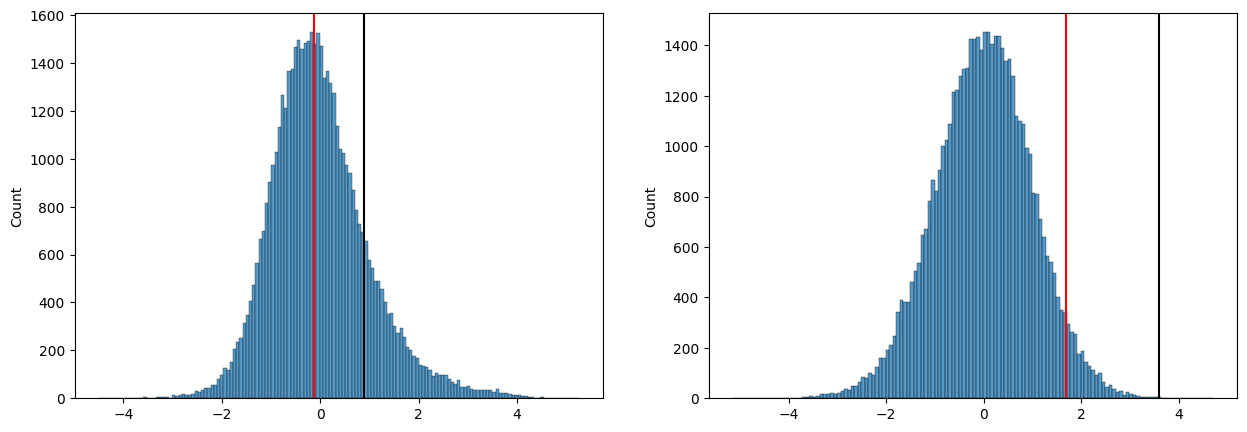

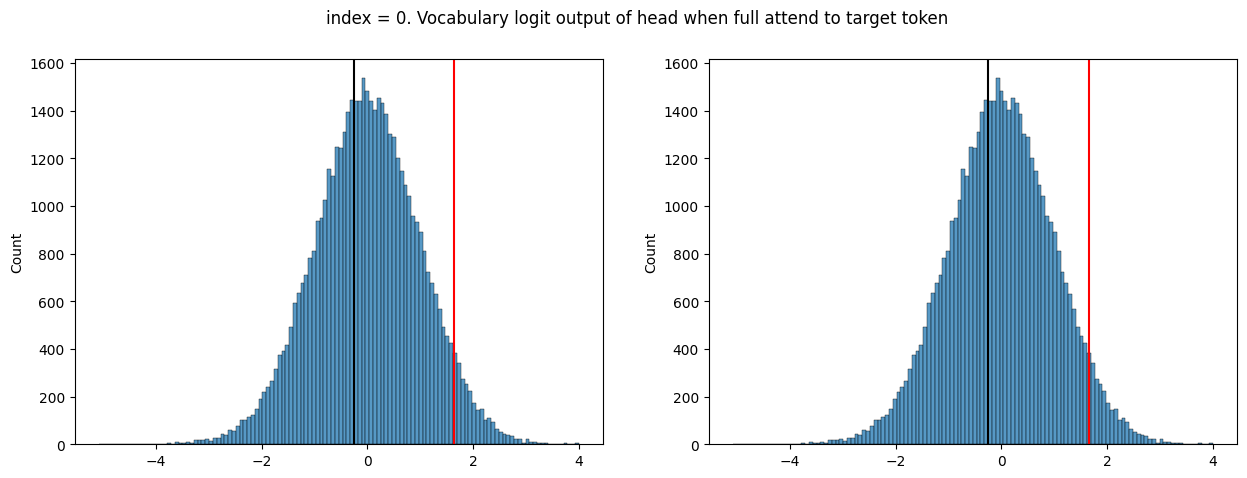

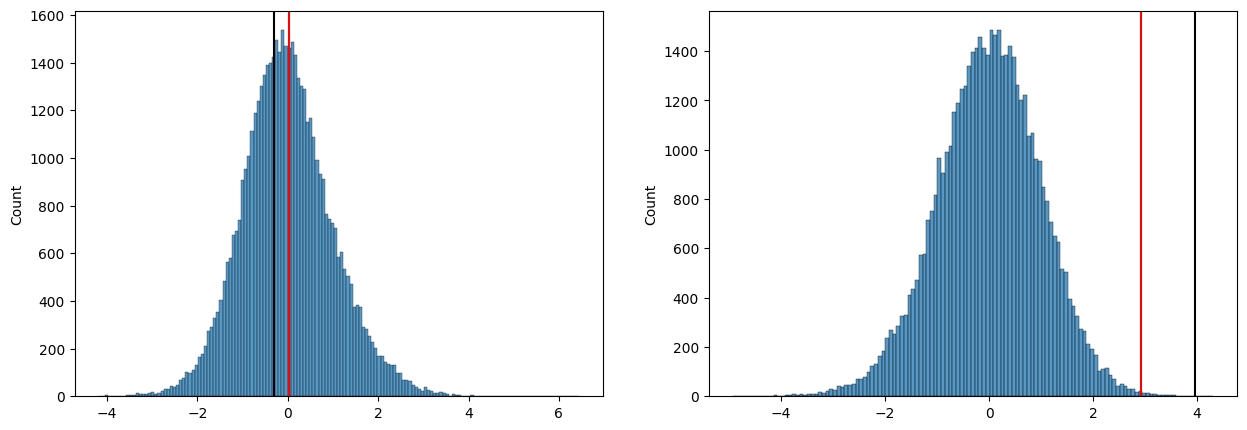

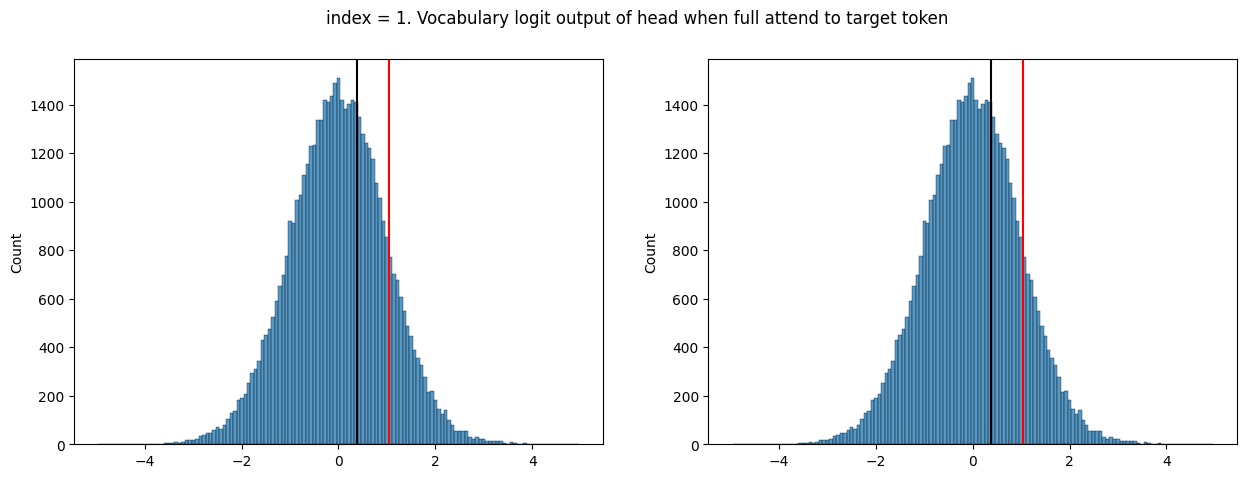

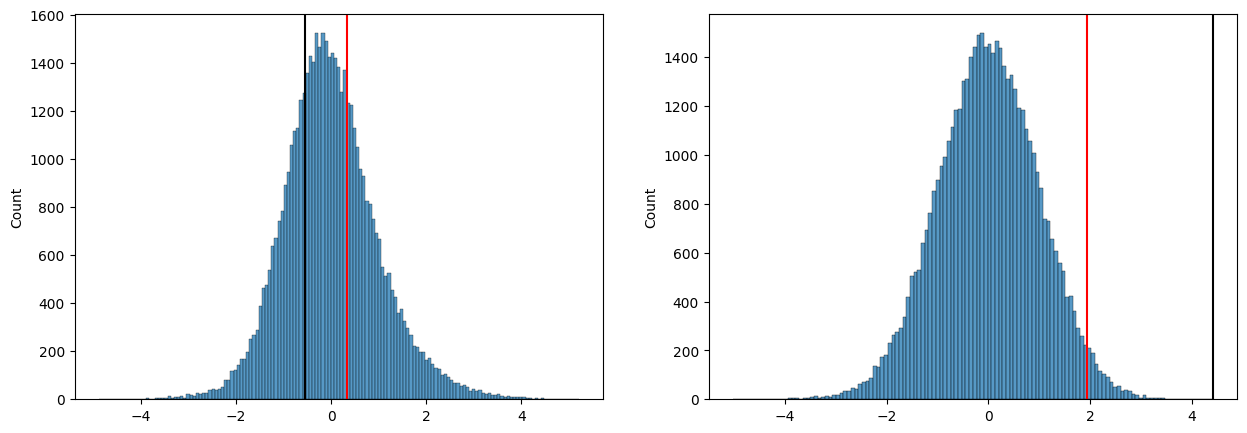

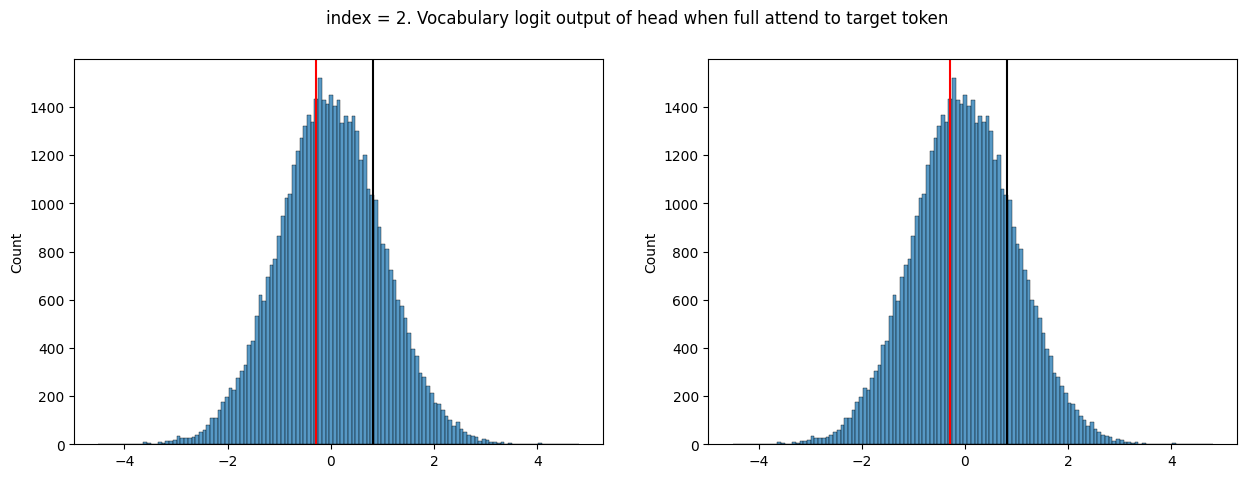

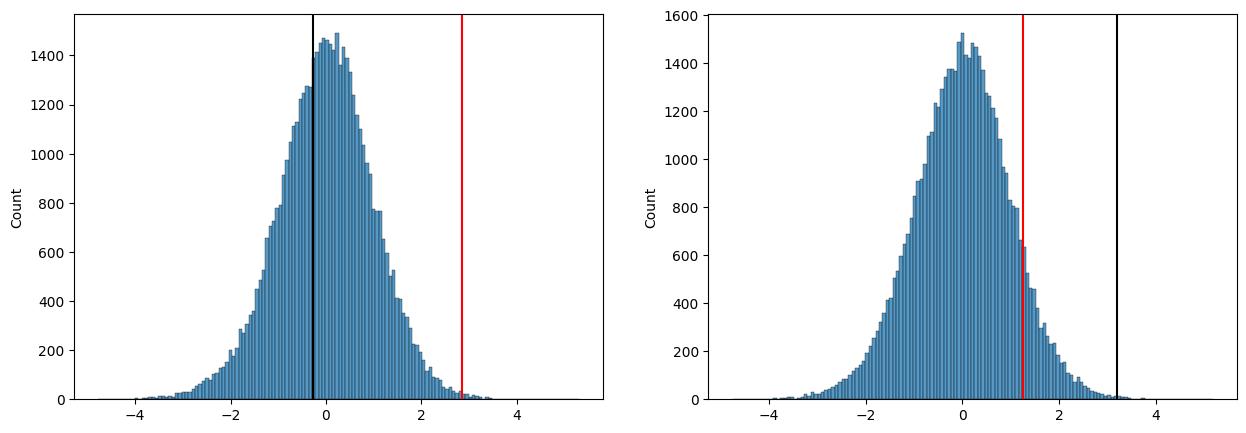

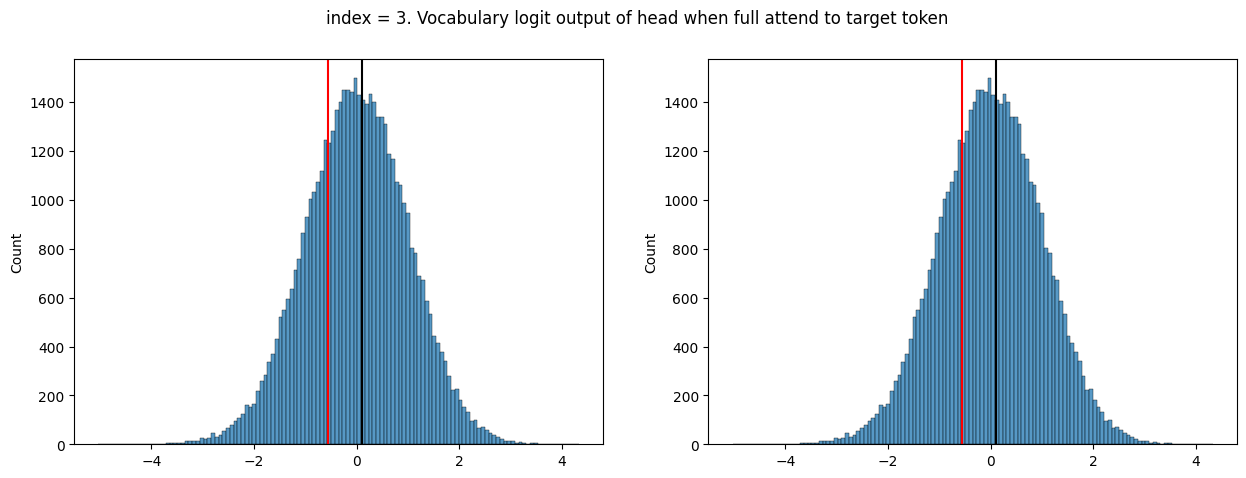

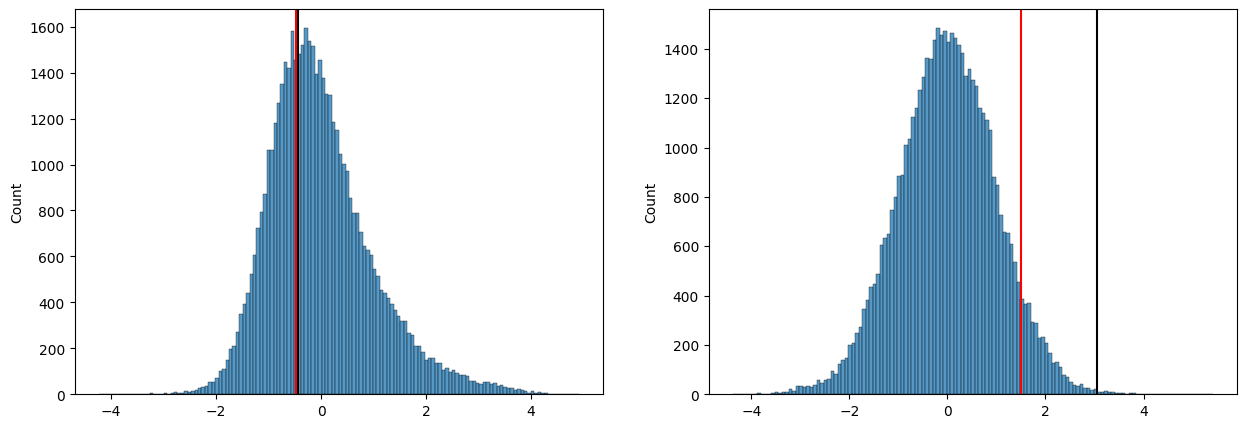

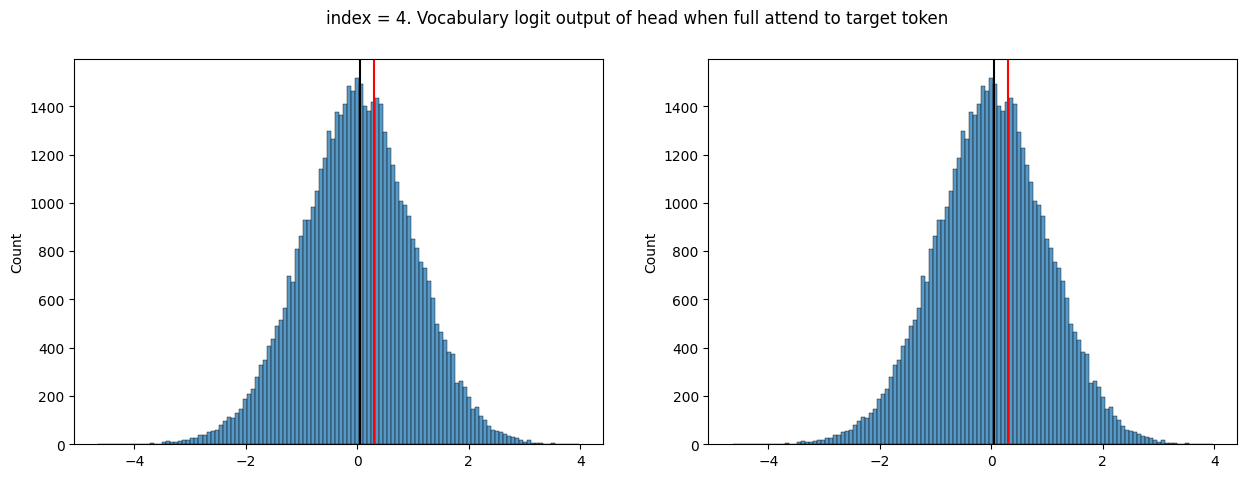

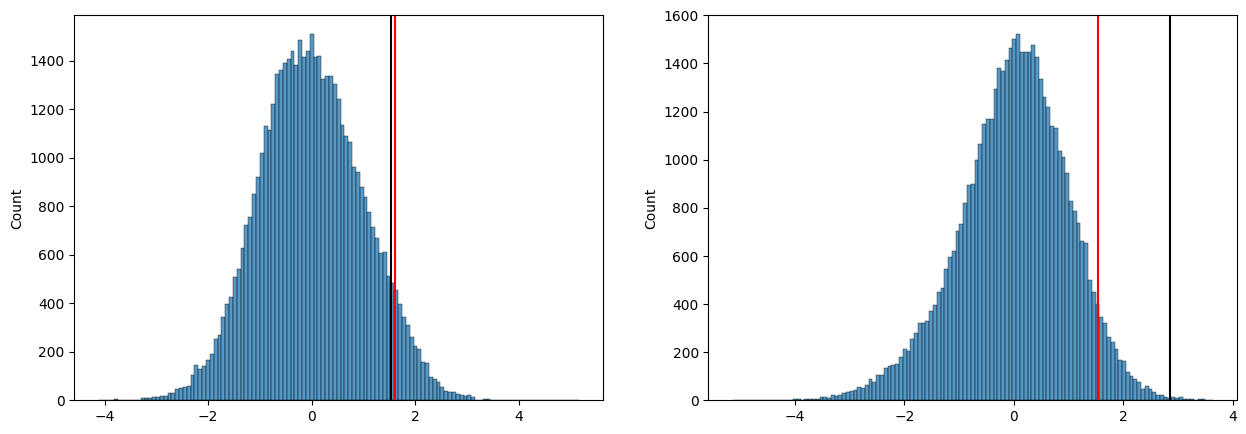

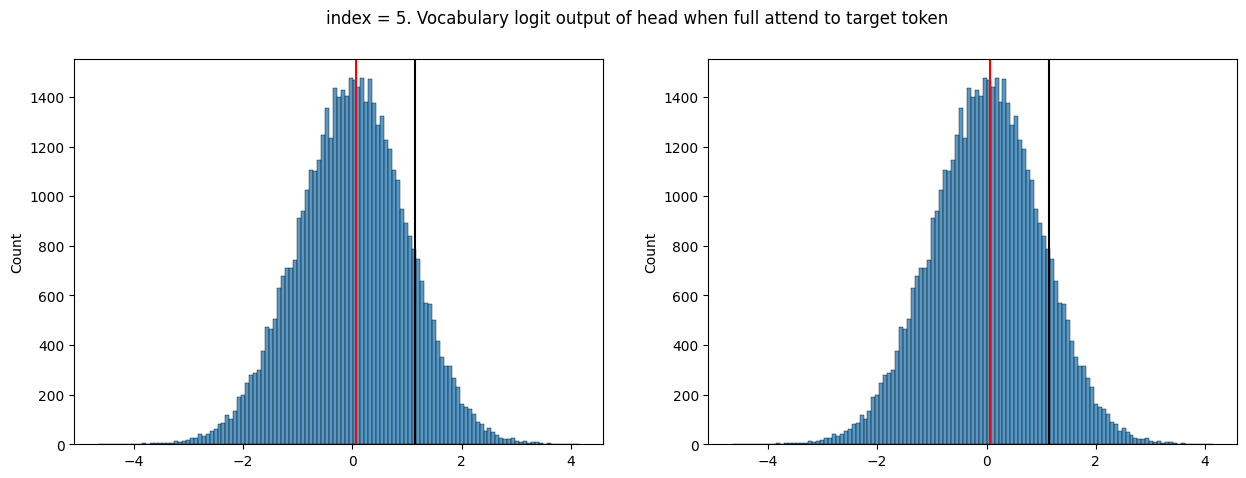

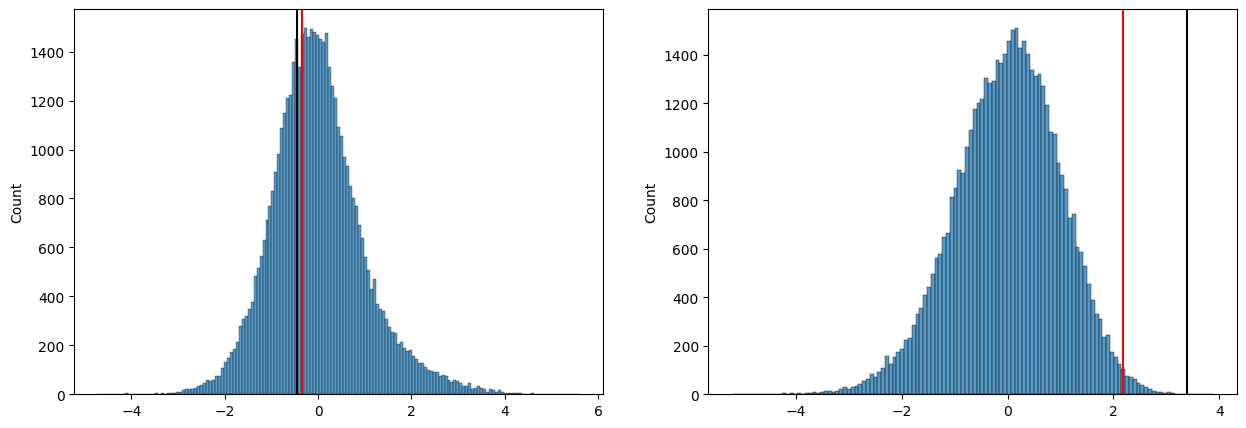

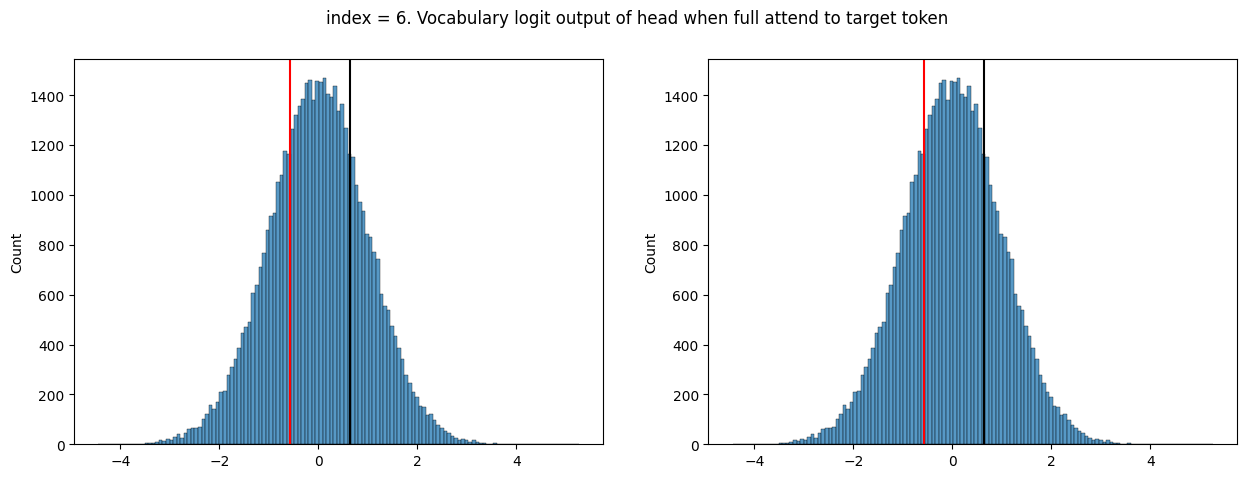

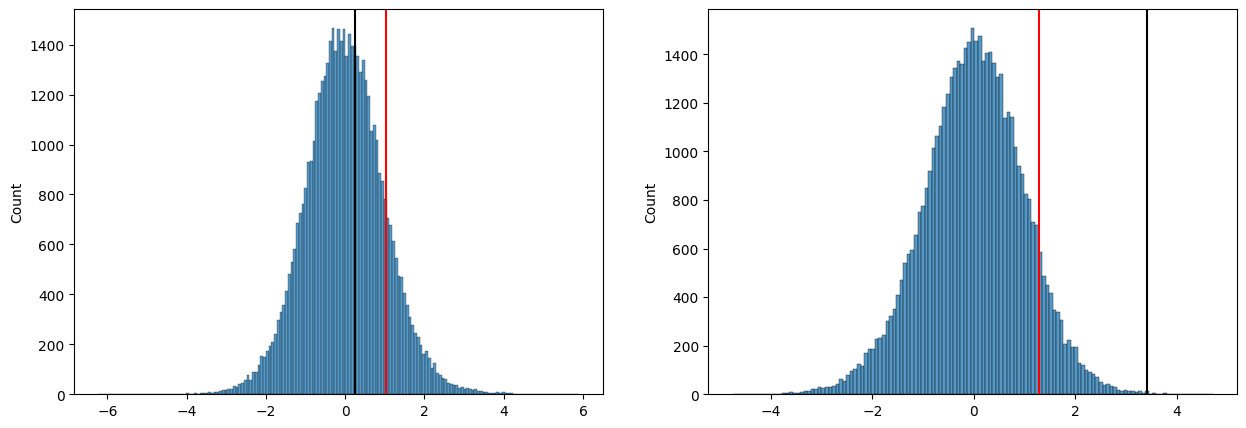

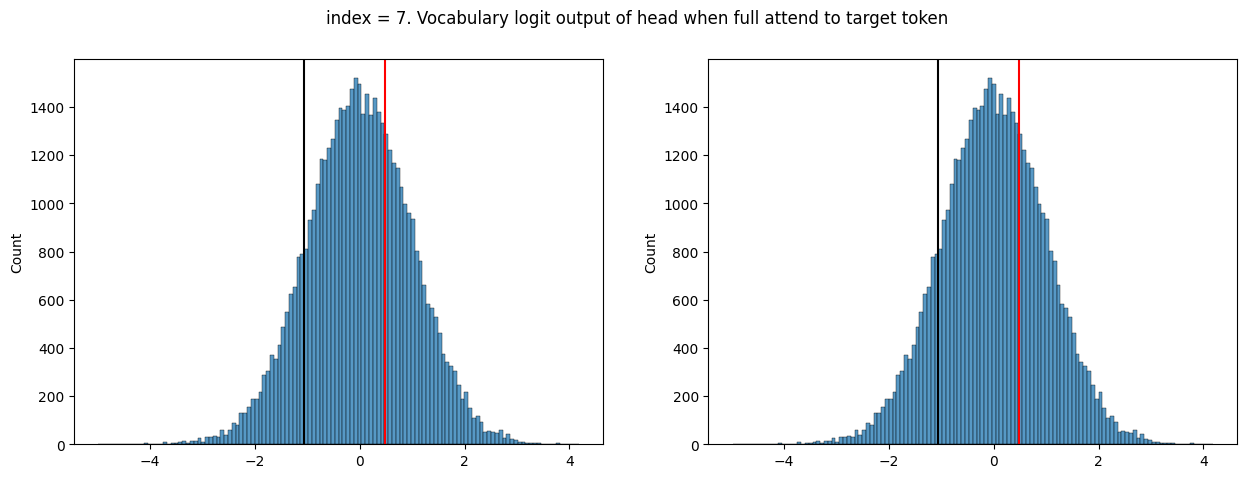

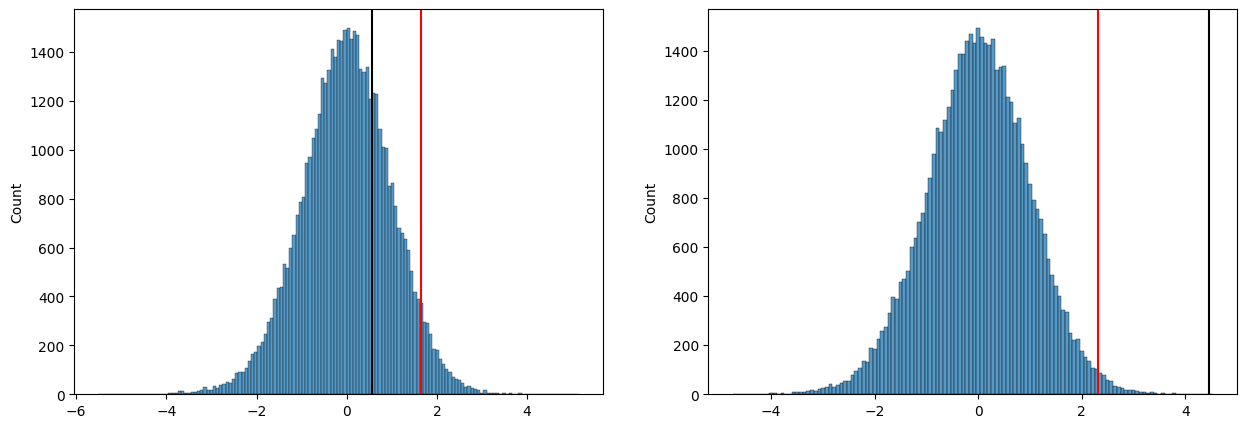

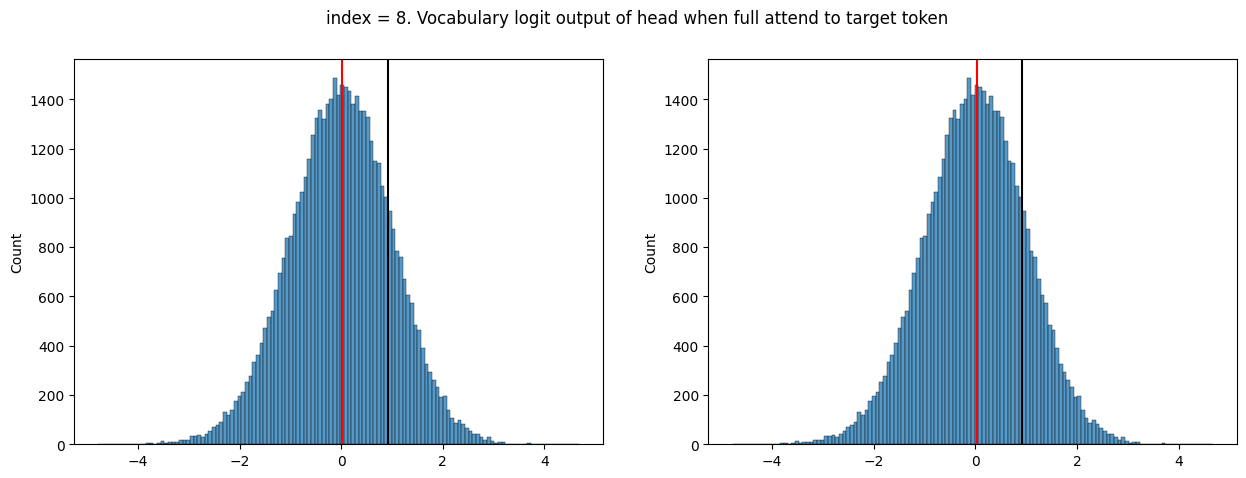

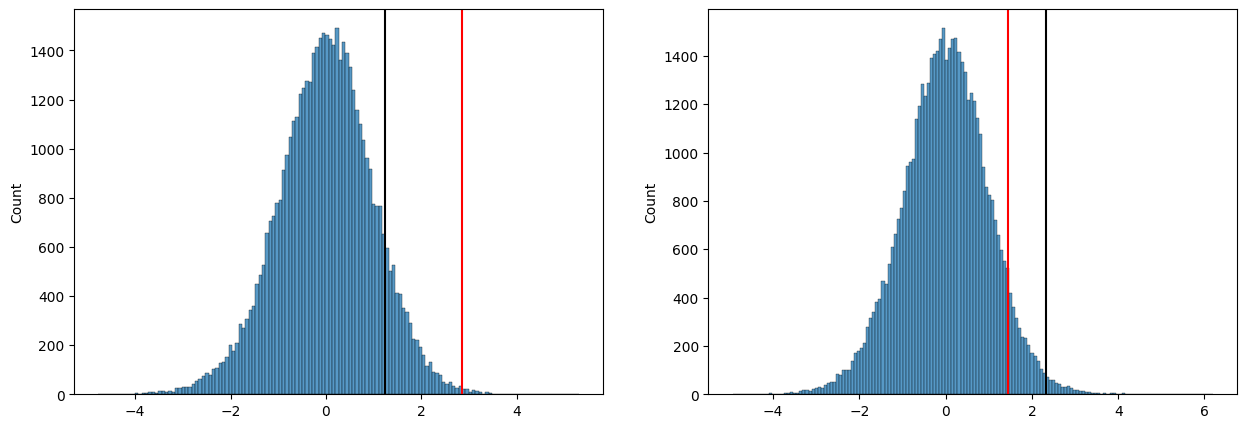

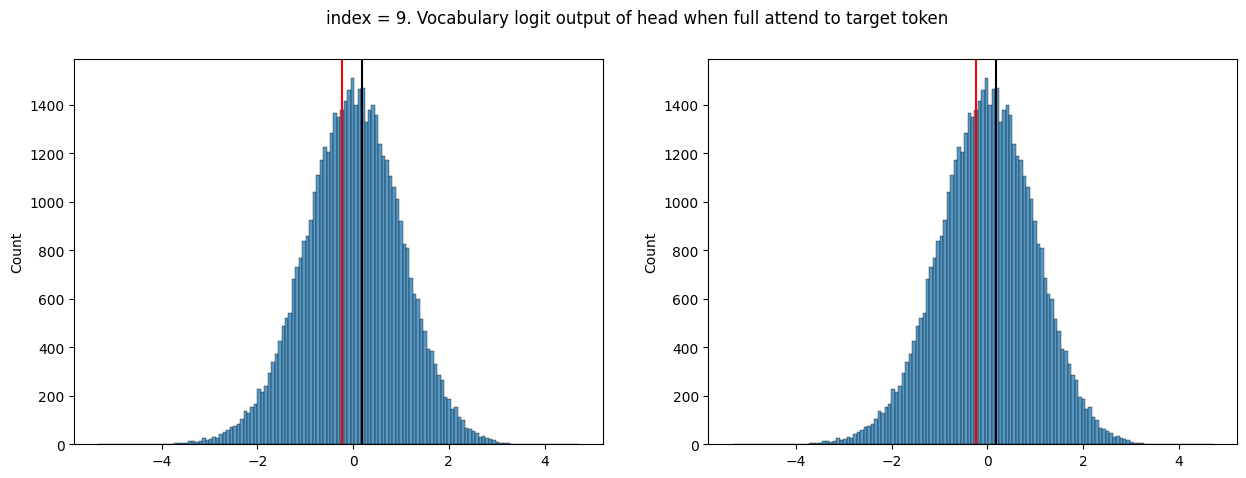

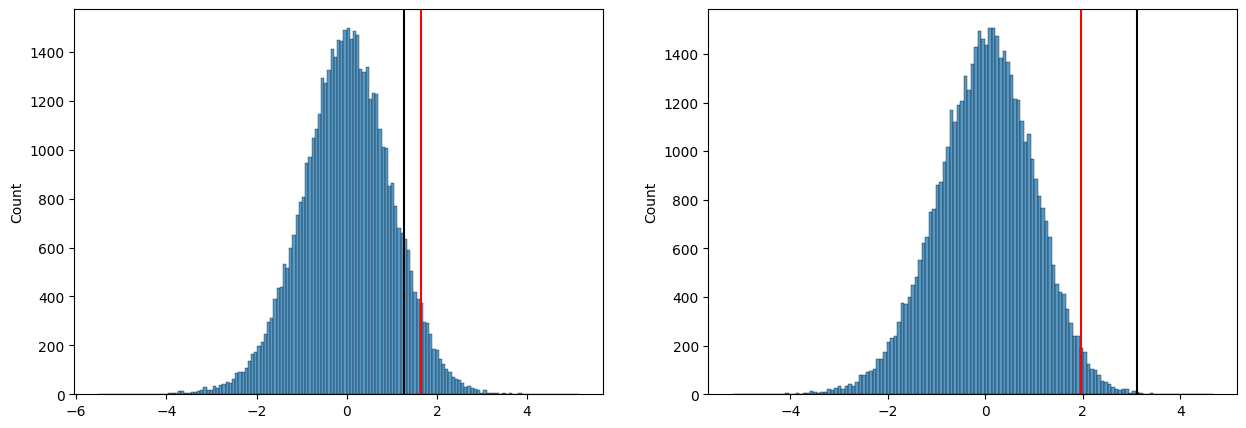

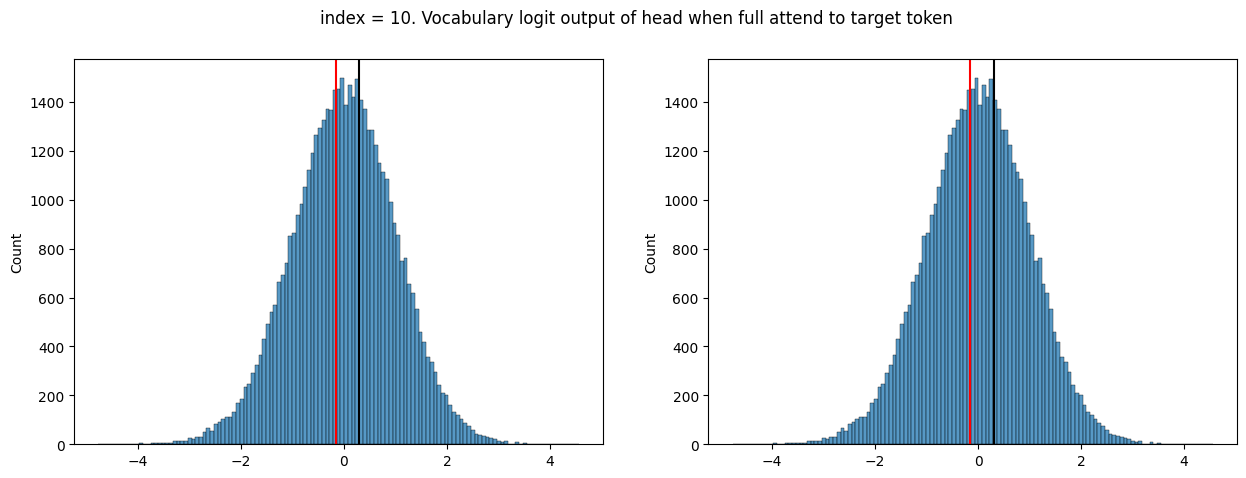

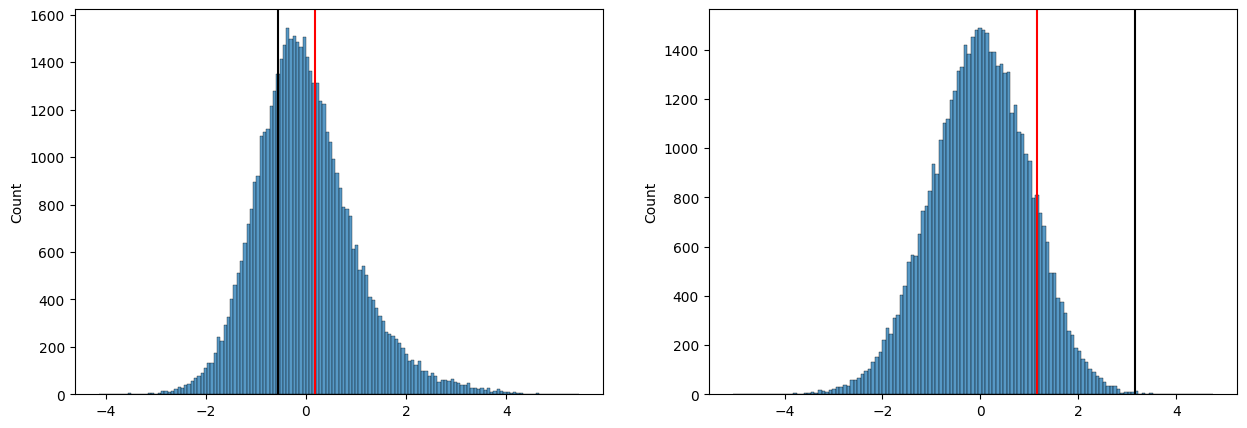

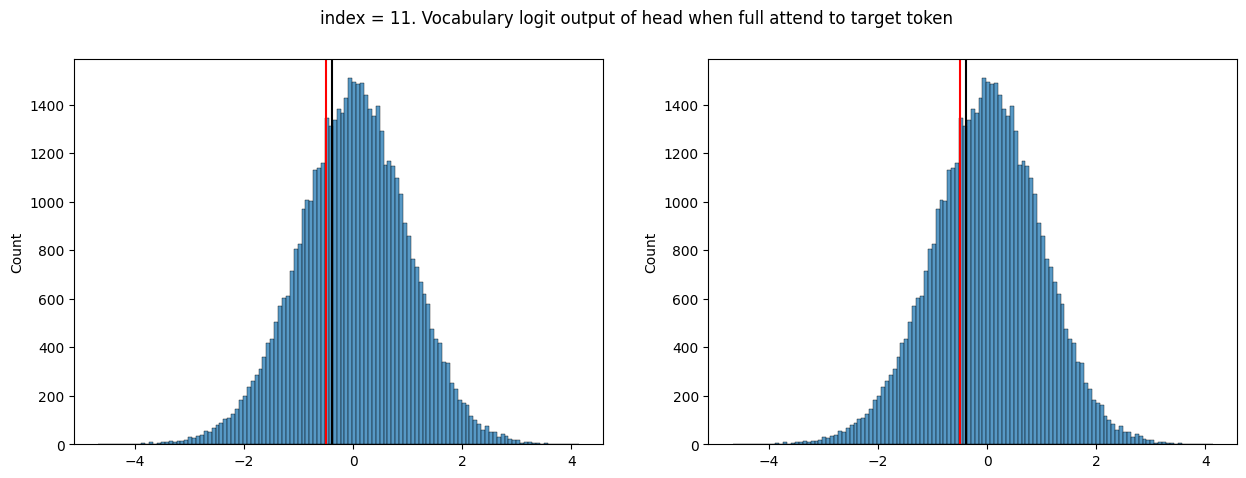

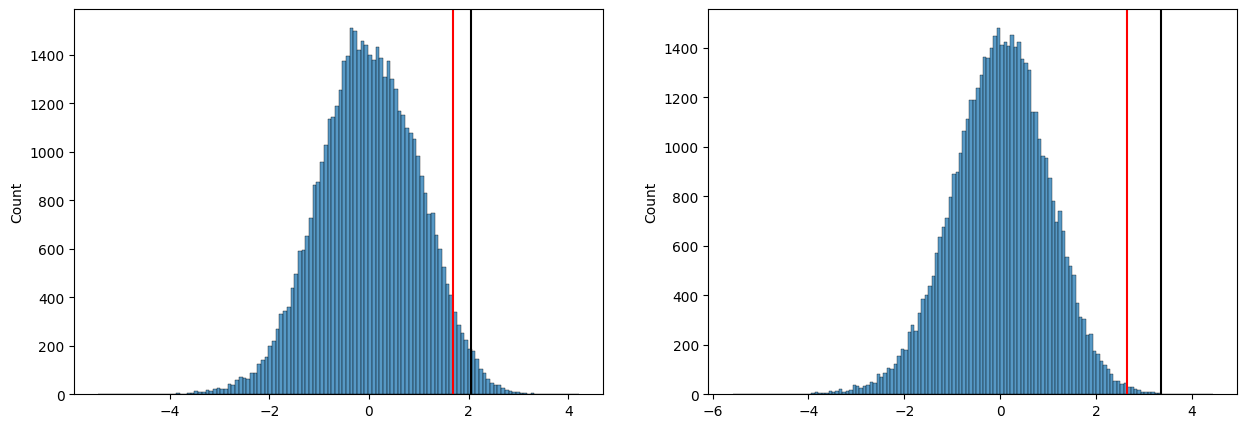

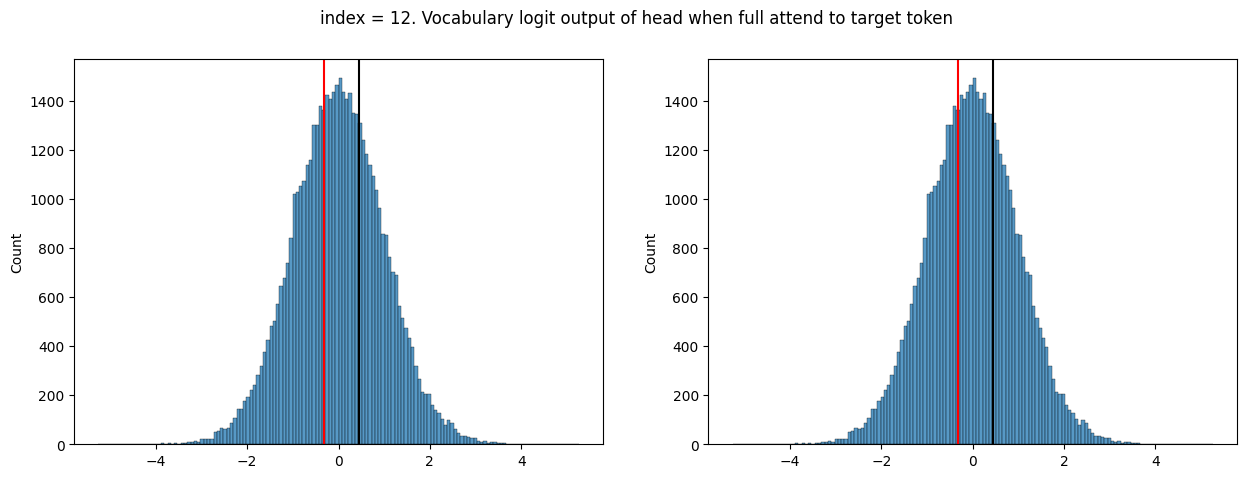

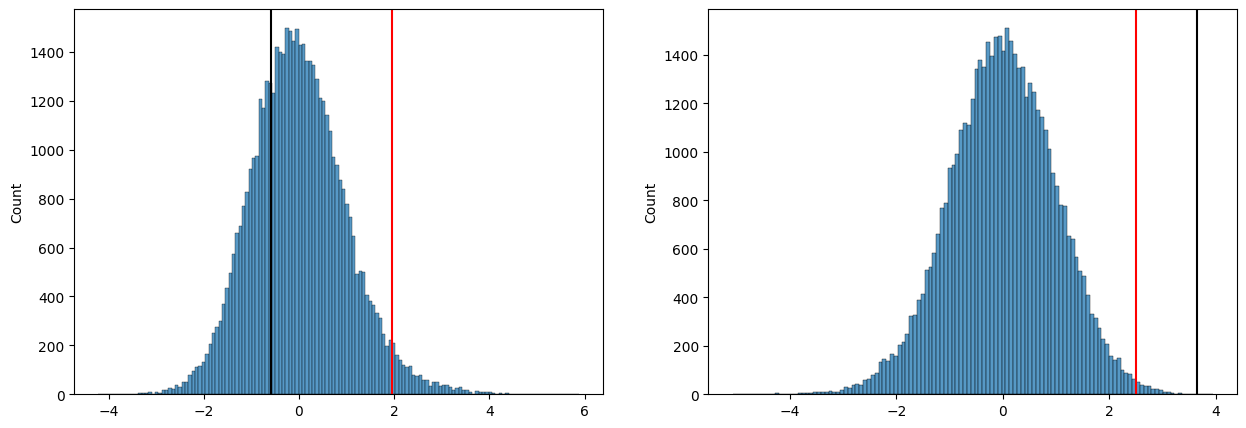

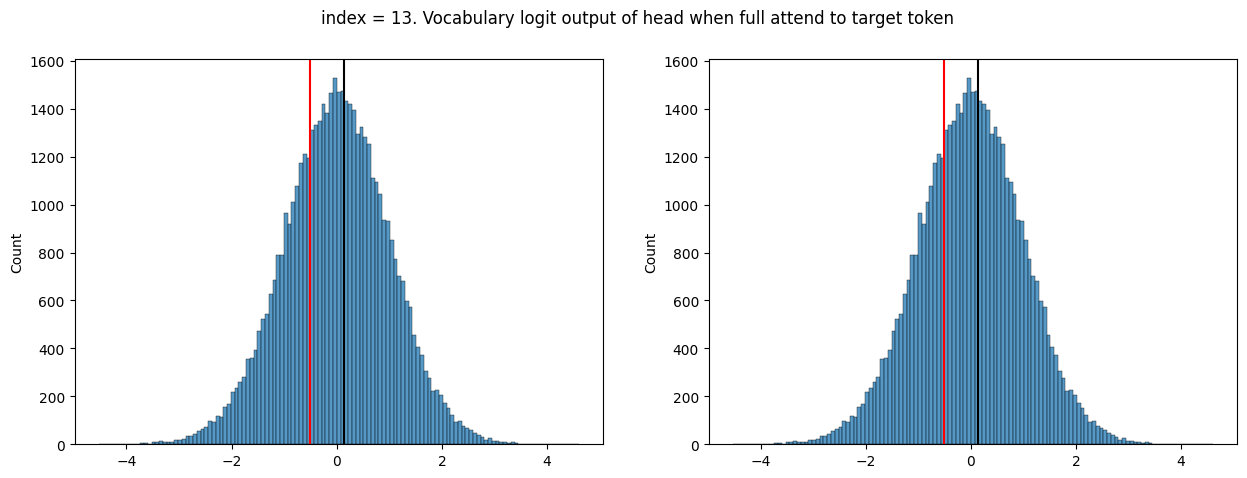

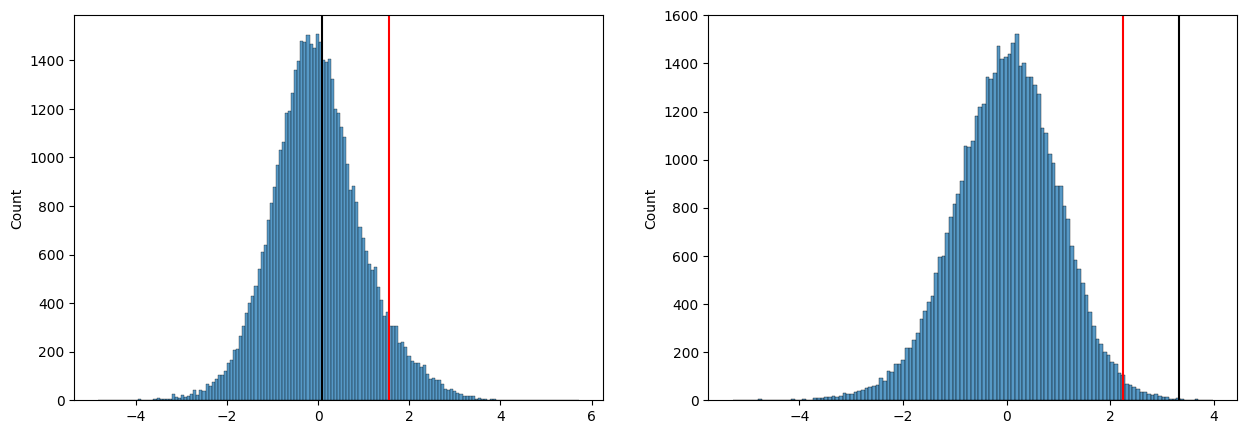

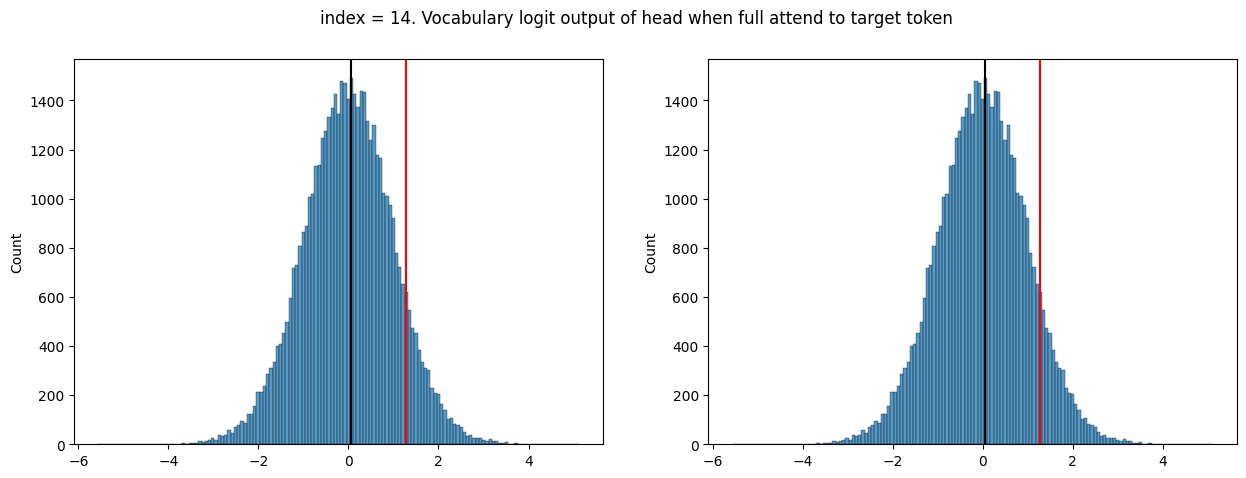

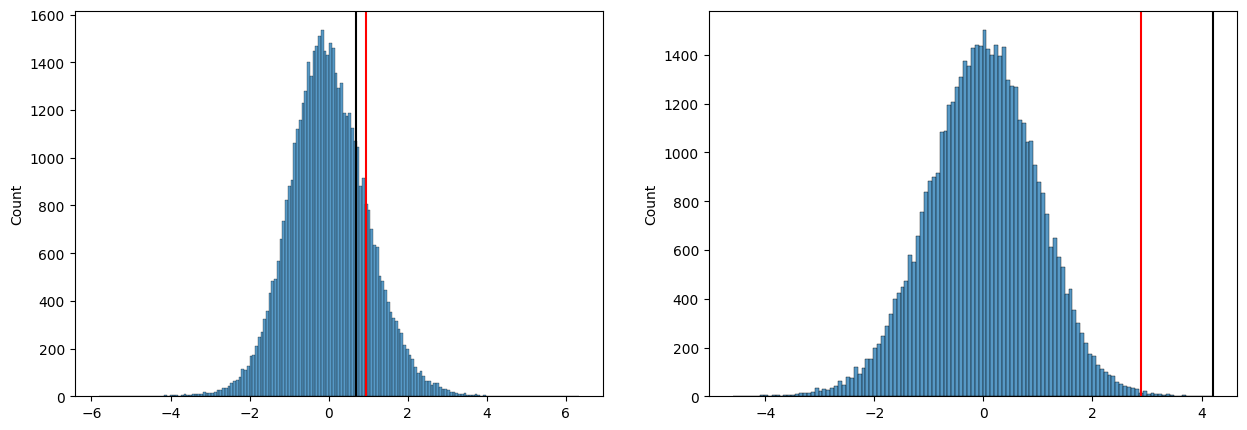

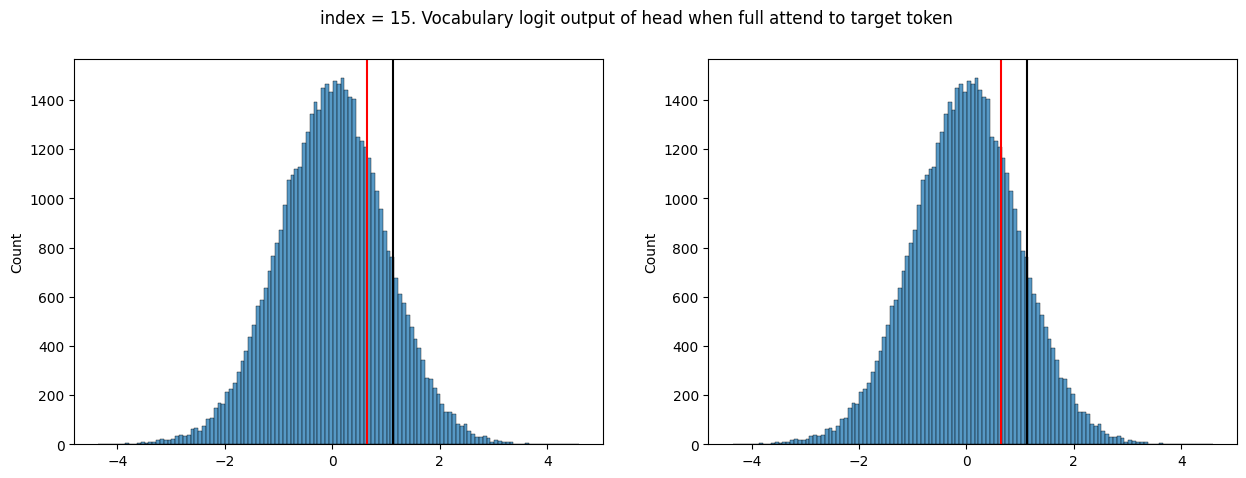

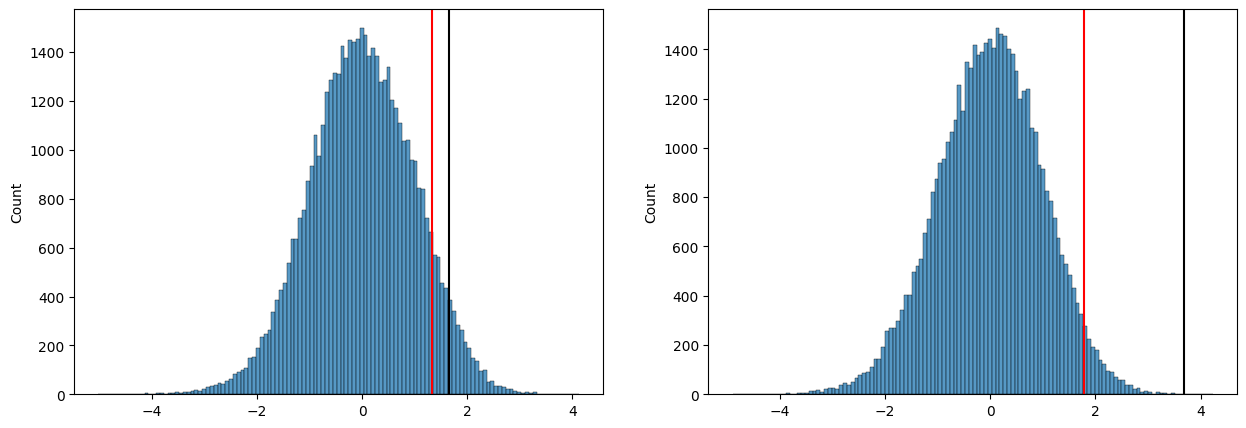

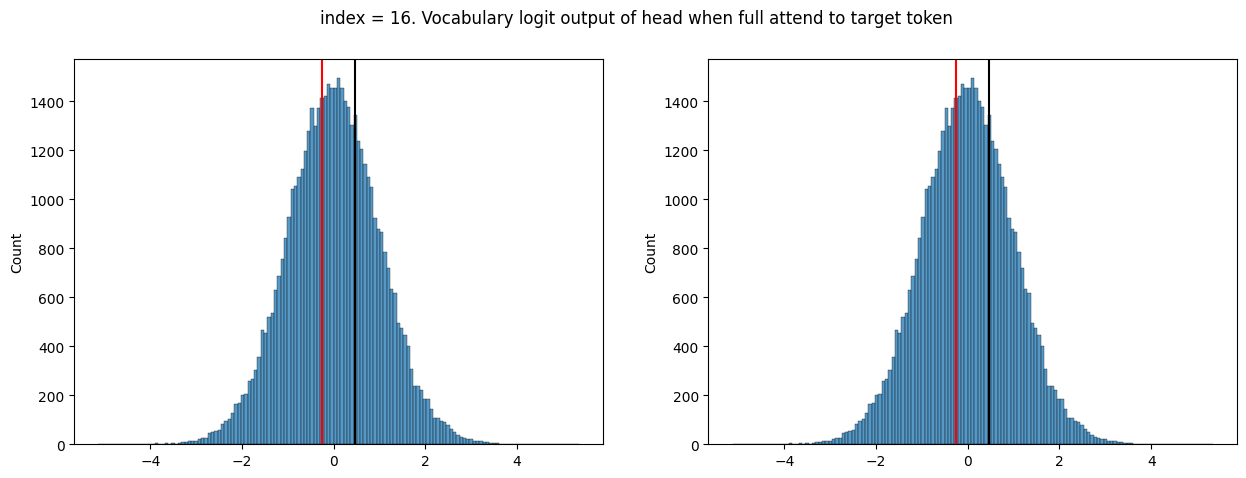

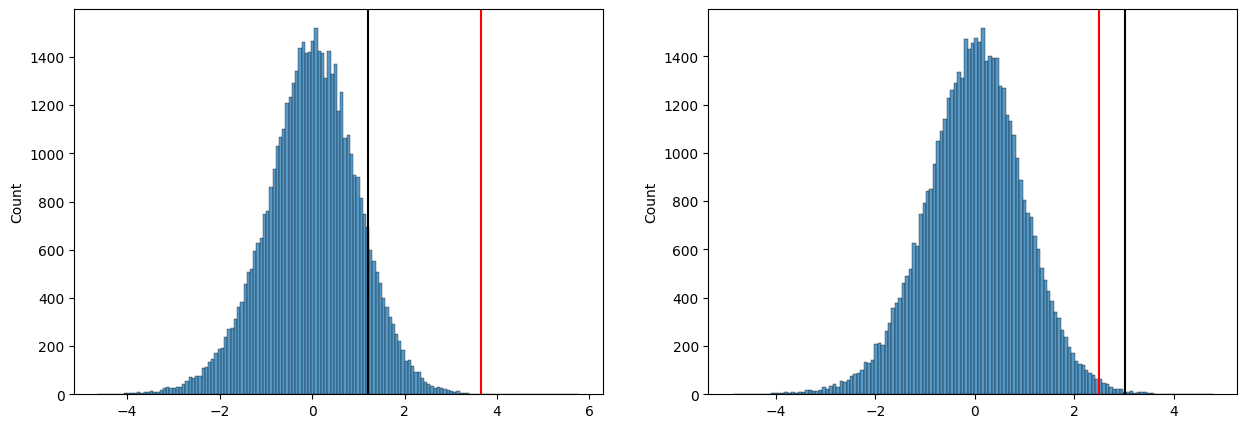

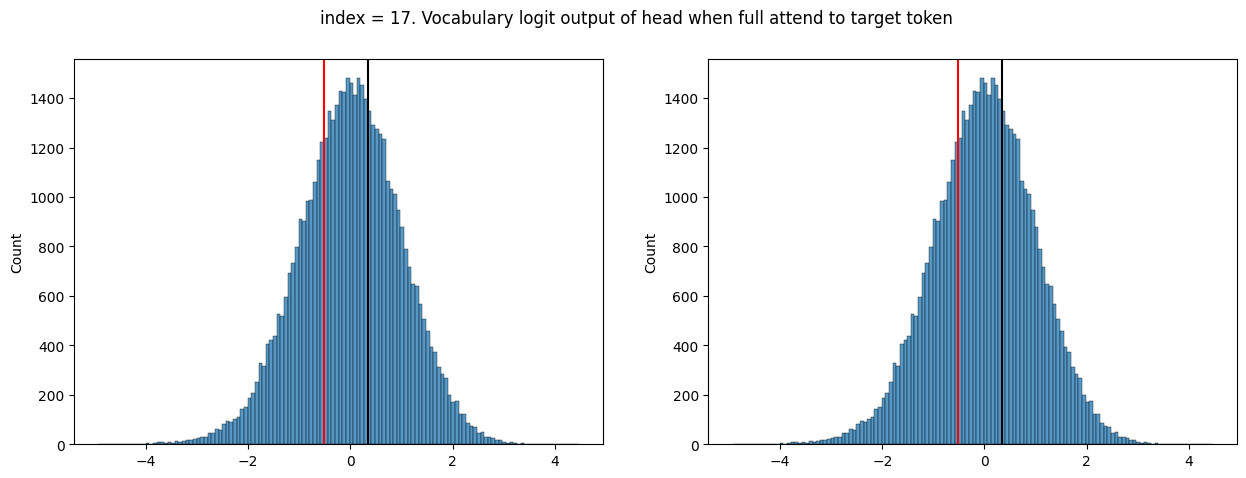

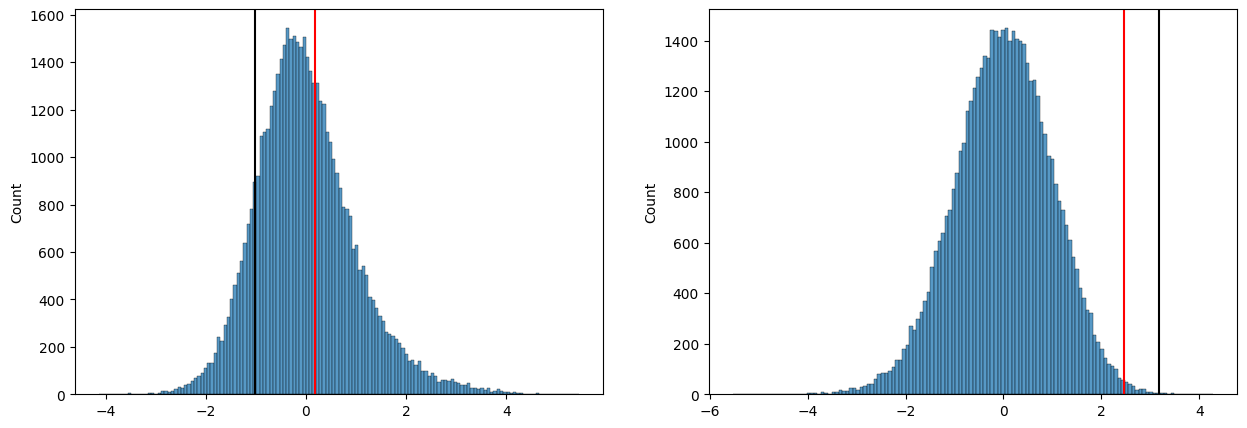

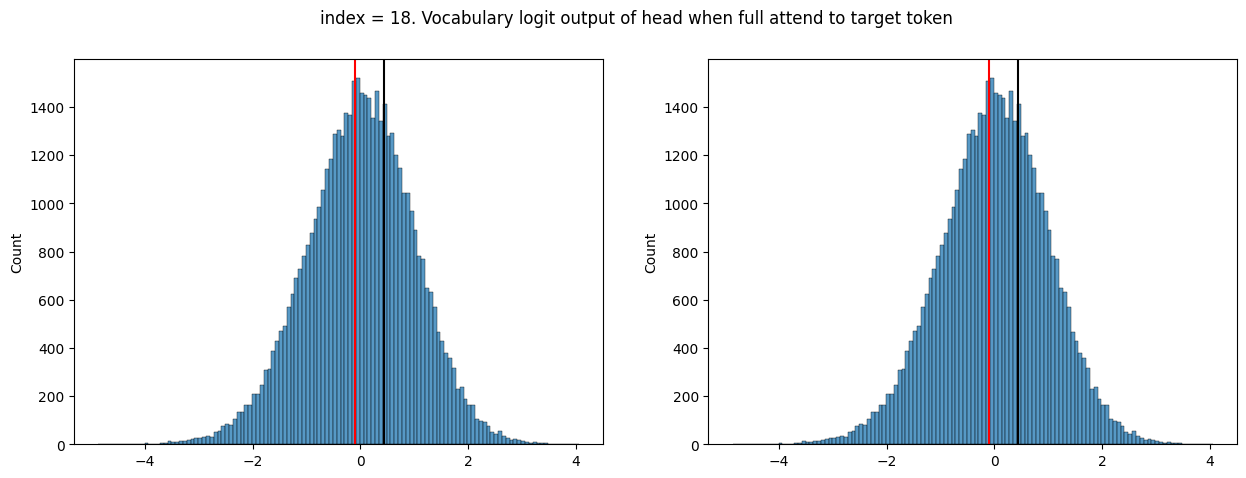

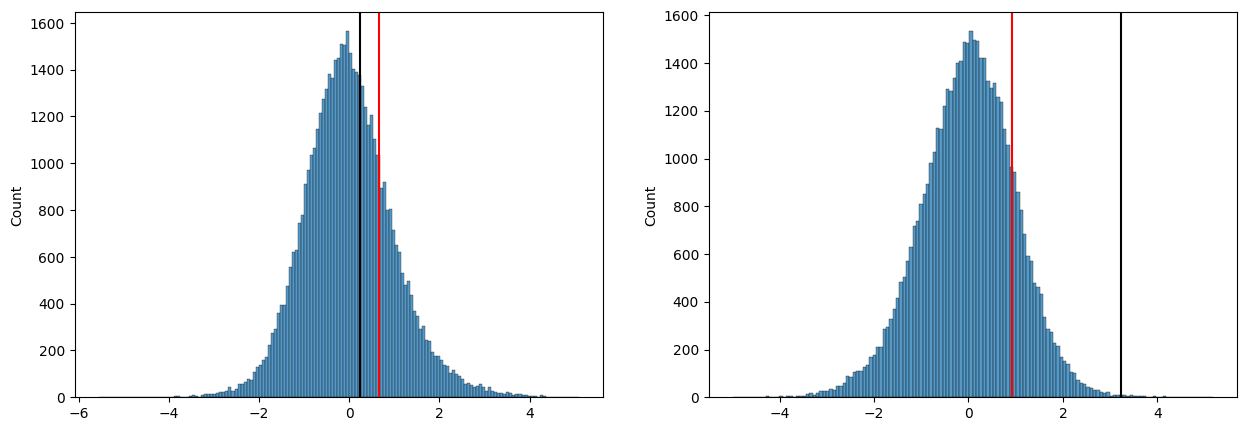

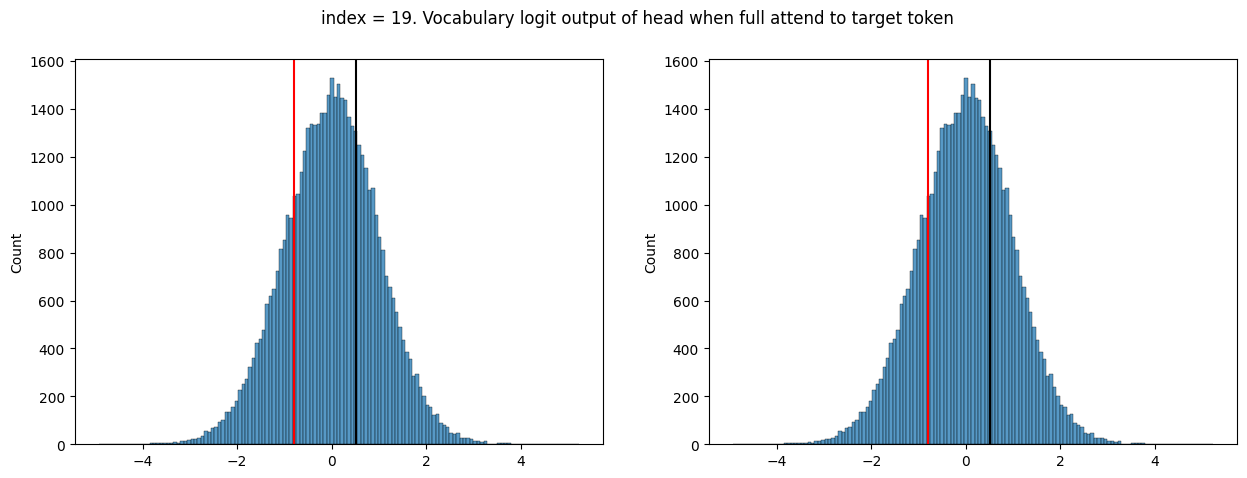

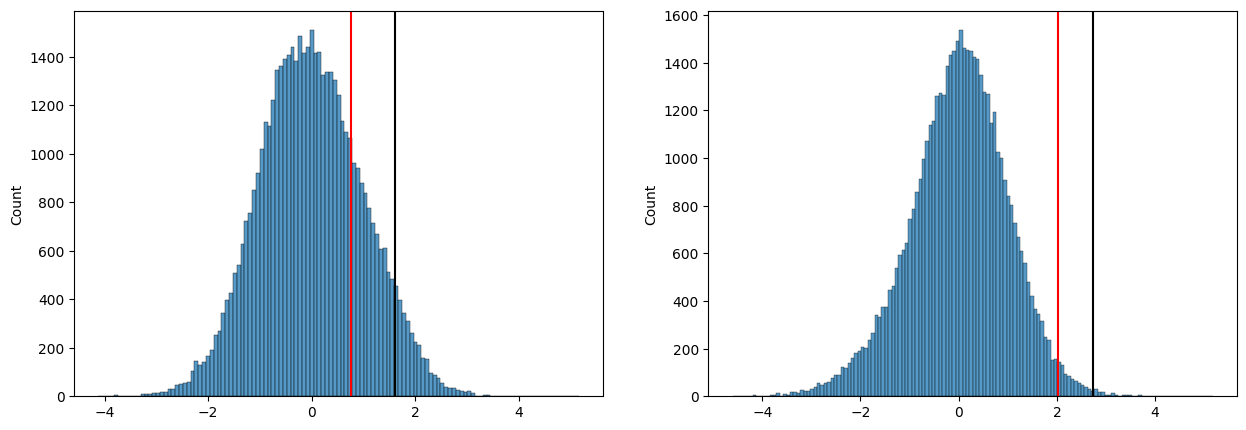

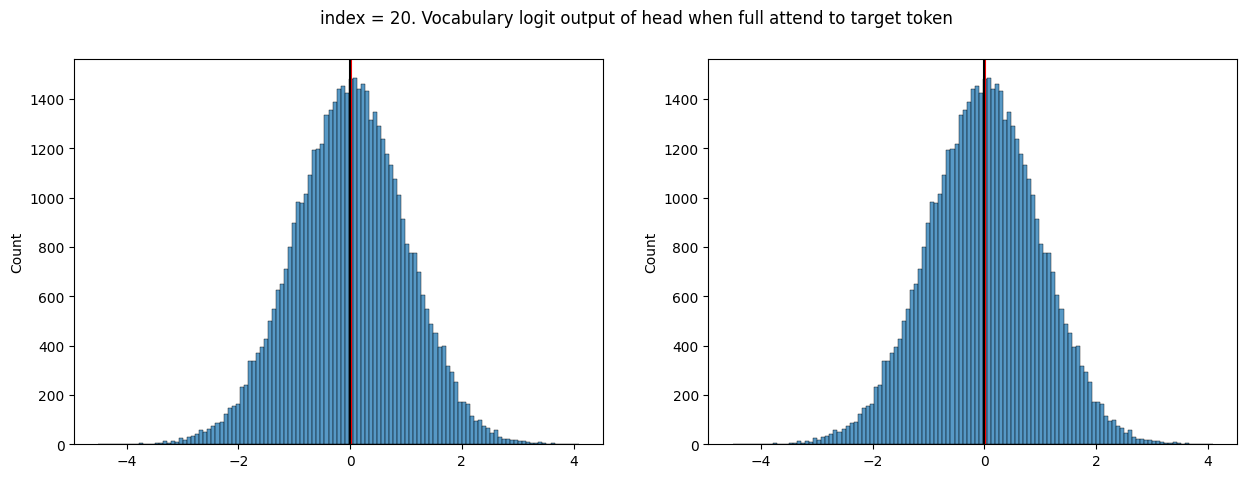

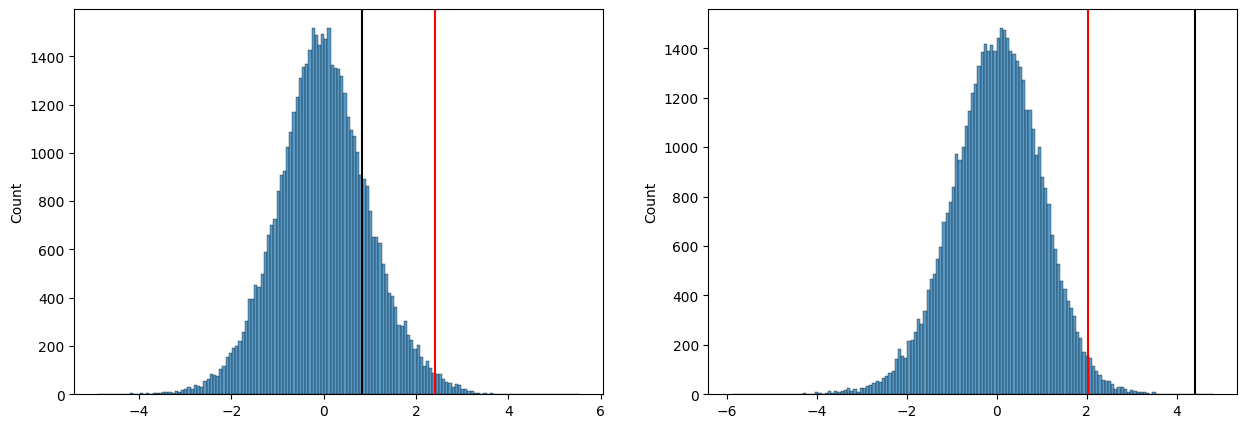

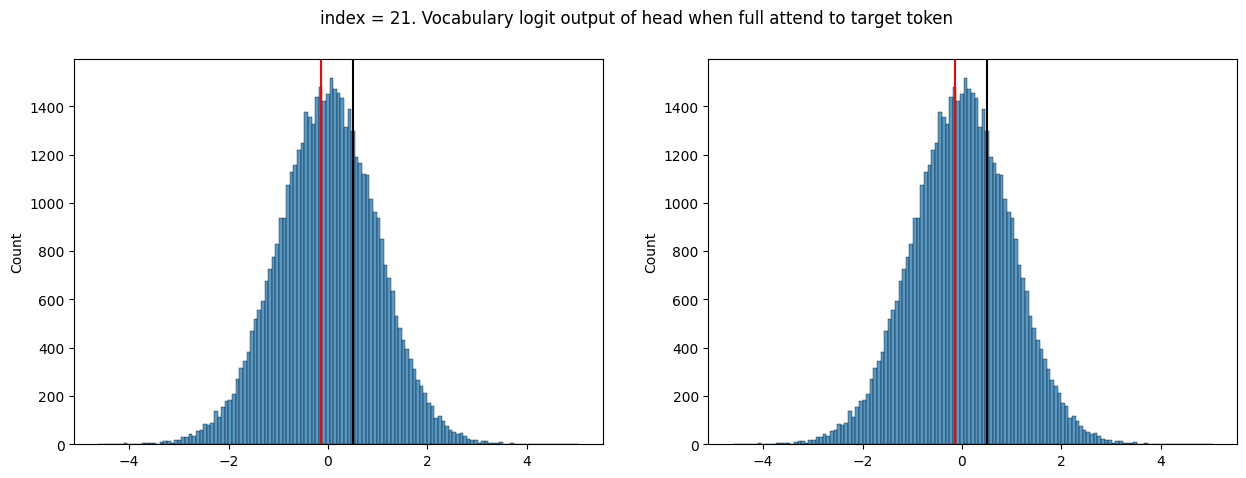

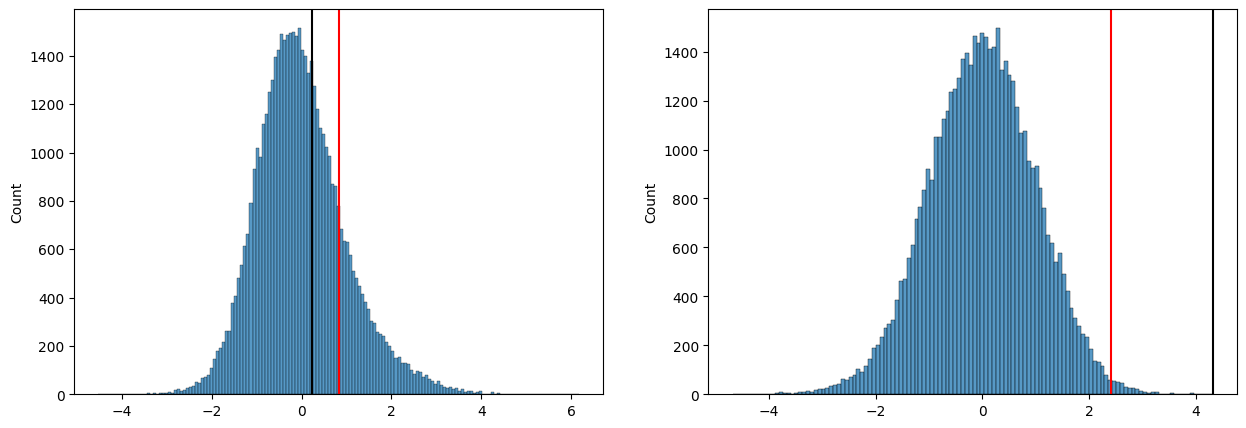

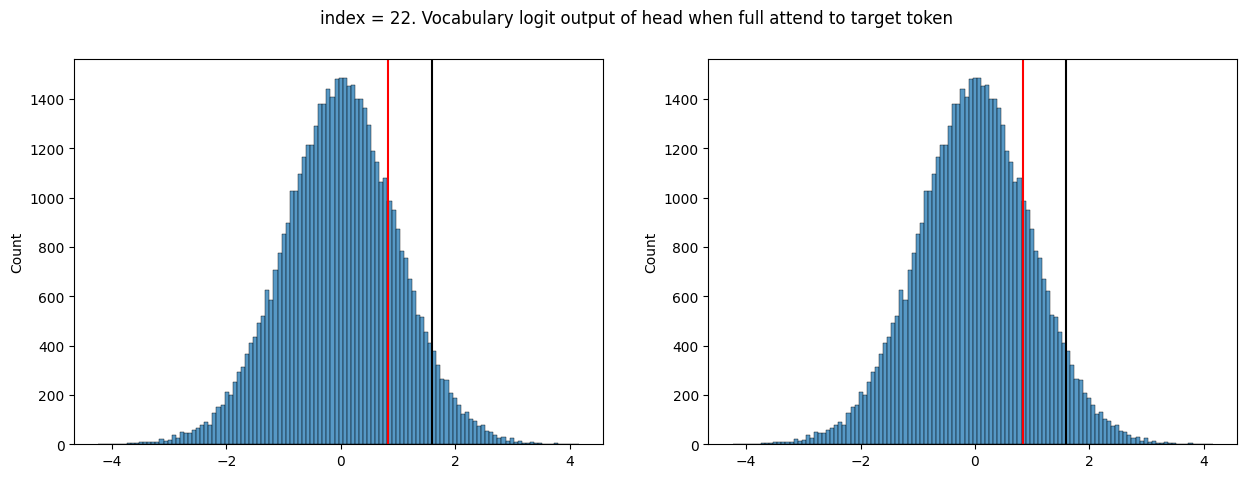

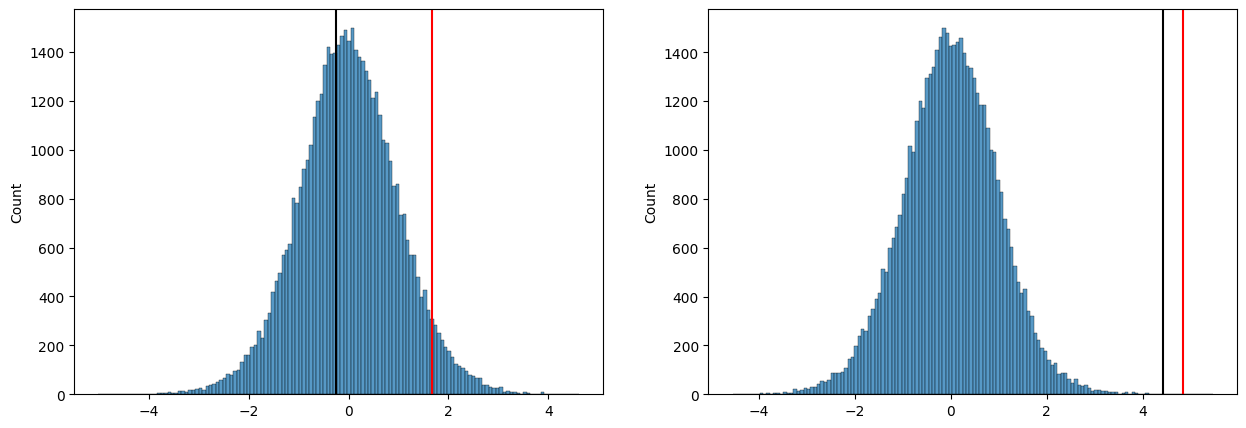

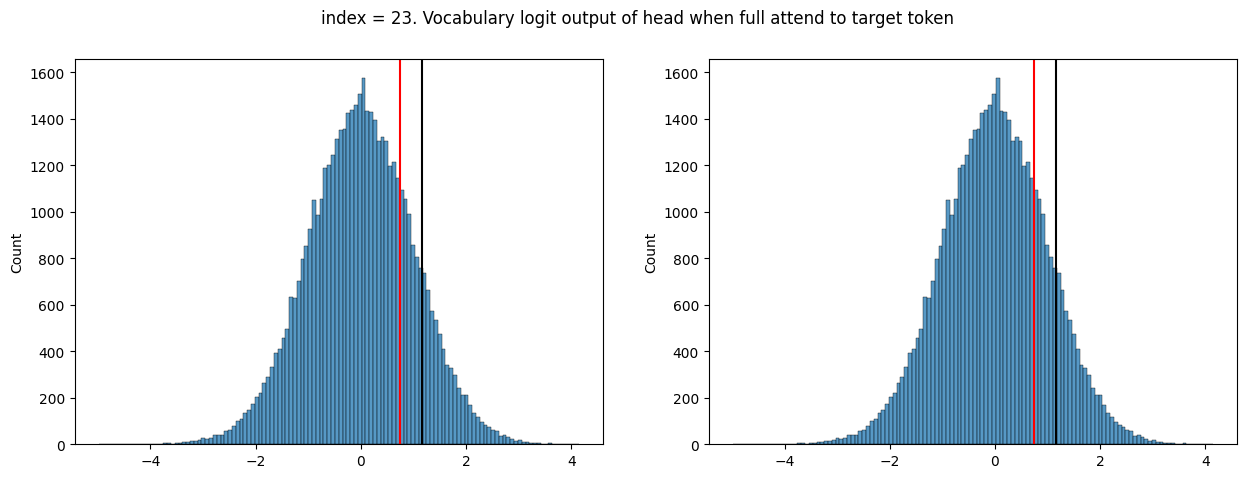

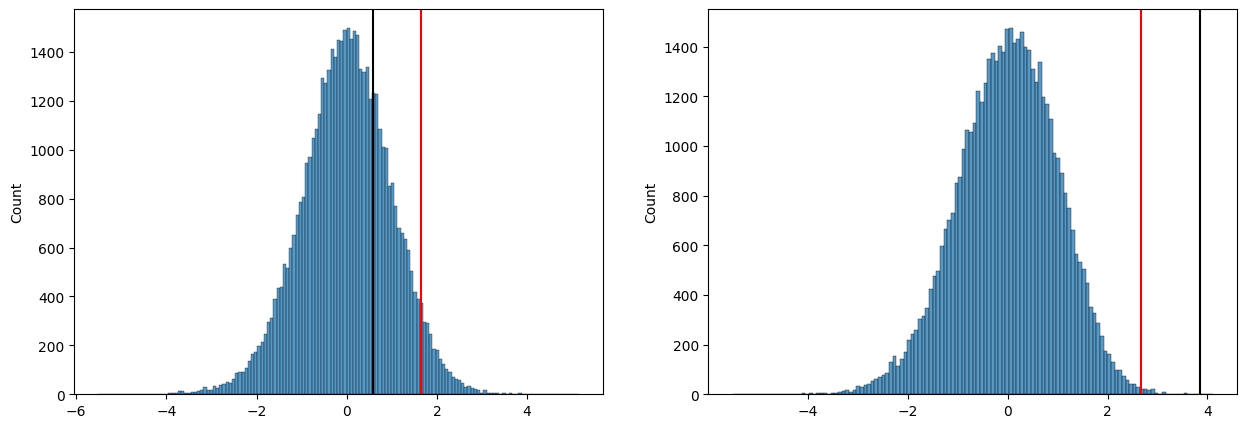

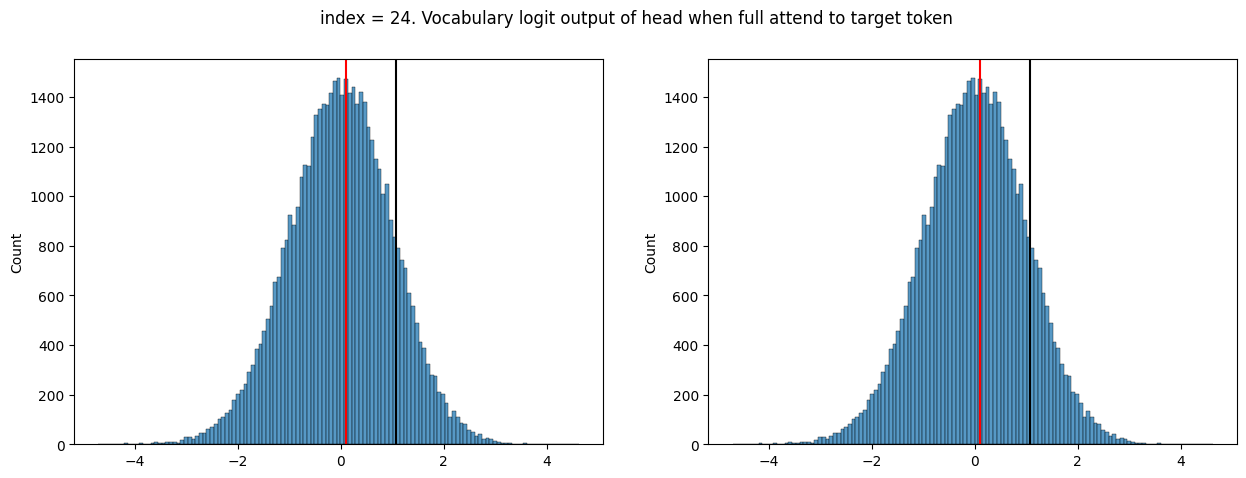

In [38]:
_, cache = model.run_with_cache(batch["corrupted_prompts"])
layer, head = 8, 5
for index in range(25):

    residual_stream = cache["resid_pre", layer] # (batch, len, d_model)
    residual_target = torch.stack([residual_stream[:,5,:], residual_stream[:,batch["obj_pos"][0],:]], dim=1)
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    distribution_mem = model.W_U.T @ residual_stream[index,5,:]
    distribution_cp = model.W_U.T @ residual_stream[index,batch["obj_pos"][0],:]
    distribution_mem = model.ln_final(distribution_mem)
    distribution_cp = model.ln_final(distribution_cp)
    sns.histplot(distribution_mem.cpu(), ax=axes[0])
    axes[0].axvline(distribution_mem[batch["target"][index][0]].cpu(), color="red")
    axes[0].axvline(distribution_mem[batch["target"][index][1]].cpu(), color="black")
    
    sns.histplot(distribution_cp.cpu(), ax=axes[1])
    axes[1].axvline(distribution_cp[batch["target"][index][0]].cpu(), color="red")
    axes[1].axvline(distribution_cp[batch["target"][index][1]].cpu(), color="black")
    
    
    attention_output = einops.einsum(model.blocks[layer].attn.W_O[head,:,:], cache[f"blocks.{layer}.attn.hook_z"][:,:,head,:], "h_dim m_dim, b pos h_dim -> b pos m_dim")
    distribution_mem = model.W_U.T @ attention_output[index, -1, :]
    distribution_cp = model.W_U.T @ attention_output[index, -1, :]
    # diff = pattern.get_ov_interaction(4,5, batch, mlp=True, residual_stream=residual_target, return_full_output=False, return_difference=True).squeeze()
    
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    distribution_mem = model.ln_final(distribution_mem)
    distribution_cp = model.ln_final(distribution_cp)
    sns.histplot(distribution_mem.cpu(), ax=axes[0])
    axes[0].axvline(distribution_mem[batch["target"][index][0]].cpu(), color="red")
    axes[0].axvline(distribution_mem[batch["target"][index][1]].cpu(), color="black")
    
    sns.histplot(distribution_cp.cpu(), ax=axes[1])
    axes[1].axvline(distribution_cp[batch["target"][index][0]].cpu(), color="red")
    axes[1].axvline(distribution_cp[batch["target"][index][1]].cpu(), color="black")
    fig.suptitle(f"index = {index}. Vocabulary logit output of head when full attend to target token")
    plt.show()